# Project - Term 3 ML Foundation: Housing Price in USA

## Table of Content

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)<br>
3. [Exploratory Data Analysis](#section3)<br>
4. [Preparing X and y using pandas](#section4)<br>
5. [Splitting X and y into training and test datasets](#section5)<br>
6. [Linear Regression](#section6)<br>
7. [Interpret the Model Coefficients](#section7)<br>
8. [Using the Model for Prediction](#section8)<br>
9. [Model evaluation](#section9)<br>
10. [Conclusion](#section10)<br>

<a id='section1'></a>
### 1.0 Problem Statement
Many of us in our lifetime encounter a process of buying or selling a house. **A House Buyer** is interested in purchasing the best house for the money he is paying to the Seller however **a House Seller** is interested in selling the house for the best-selling price. This project is focused on predicting house prices in USA based on the data available which will eventually help house buyers as well as sellers.

Typically when house value is evaluated a layman may consider features of the house such as neighborhood, vicinity to key places (such as hospitals-clinics, schools, banks, markets-malls, public transport, work location etc.), square footage of the house, house type, number of bedrooms/bathrooms, amount of space around the house, vehicle parking, number of years, utilities supply etc.

In this project We are analyzing all feature variables available in dataset and predict house prices using Machine Learning foundational models.

**Install Libraries**

In [1]:
# !pip install --upgrade pip #upgrade on azure notebook
# !pip install pandas==0.25.3 --upgrade  #upgrade on azure notebook

# !pip3 install --upgrade setuptools --user
# !pip install bottleneck --upgrade
# !pip install matplotlib
# !pip install scipy
# !pip install seaborn
# !pip install plotly
# !pip install numpy
# !pip install datascience --user

# !pip install pandas-profiling --user


# !pip uninstall -y attr
# !pip install attrs==19.2.0 --upgrade
# !pip install xlrd --upgrade
# !pip install plotly --upgrade
# !pip install chart-studio

**Importing Packages**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn import metrics
warnings.filterwarnings('ignore')
sns.set(style='white', context='notebook', palette='deep')
%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [3]:
%%html
<style> 
table td, table th, table tr {text-align:left !important;}
</style>

<a id='section2'></a>

### 2.0 Data Loading and Description
This dataset gives different sale prices of houses in USA. There are total **80 variable** in this dataset and **SalePrice** is the Target Variable. Variables are as below:

|SrNo|Variable|Description|
|:----|:------------------|:---------------------------------------------------------------------------------|
|1|1stFlrSF|First Floor square feet|
|2|2ndFlrSF|Second floor square feet|
|3|3SsnPorch|Three season porch area in square feet|
|4|Alley|Type of alley access|
|5|Bedroom|Number of bedrooms above basement level|
|6|BldgType|Type of dwelling|
|7|BsmtCond|General condition of the basement|
|8|BsmtExposure|Walkout or garden level basement walls|
|9|BsmtFinSF1|Type 1 finished square feet|
|10|BsmtFinSF2|Type 2 finished square feet|
|11|BsmtFinType1|Quality of basement finished area|
|12|BsmtFinType2|Quality of second finished area (if present)|
|13|BsmtFullBath|Basement full bathrooms|
|14|BsmtHalfBath|Basement half bathrooms|
|15|BsmtQual|Height of the basement|
|16|BsmtUnfSF|Unfinished square feet of basement area|
|17|CentralAir|Central air conditioning|
|18|Condition1|Proximity to main road or railroad|
|19|Condition2|Proximity to main road or railroad (if a second is present)|
|20|Electrical|Electrical system|
|21|EnclosedPorch|Enclosed porch area in square feet|
|22|ExterCond|Present condition of the material on the exterior|
|23|Exterior1st|Exterior covering on house|
|24|Exterior2nd|Exterior covering on house (if more than one material)|
|25|ExterQual|Exterior material quality|
|26|Fence|Fence quality|
|27|FireplaceQu|Fireplace quality|
|28|Fireplaces|Number of fireplaces|
|29|Foundation|Type of foundation|
|30|FullBath|Full bathrooms above grade|
|31|Functional|Home functionality rating|
|32|GarageArea|Size of garage in square feet|
|33|GarageCars|Size of garage in car capacity|
|34|GarageCond|Garage condition|
|35|GarageFinish|Interior finish of the garage|
|36|GarageQual|Garage quality|
|37|GarageType|Garage location|
|38|GarageYrBlt|Year garage was built|
|39|GrLivArea|Above grade (ground) living area square feet|
|40|HalfBath|Half baths above grade|
|41|Heating|Type of heating|
|42|HeatingQC|Heating quality and condition|
|43|HouseStyle|Style of dwelling|
|44|Kitchen|Number of kitchens|
|45|KitchenQual|Kitchen quality|
|46|LandContour|Flatness of the property|
|47|LandSlope|Slope of property|
|48|LotArea|Lot size in square feet|
|49|LotConfig|Lot configuration|
|50|LotFrontage|Linear feet of street connected to property|
|51|LotShape|General shape of property|
|52|LowQualFinSF|Low quality finished square feet (all floors)|
|53|MasVnrArea|Masonry veneer area in square feet|
|54|MasVnrType|Masonry veneer type|
|55|MiscFeature|Miscellaneous feature not covered in other categories|
|56|MiscVal|$Value of miscellaneous feature|
|57|MoSold|Month Sold|
|58|MSSubClass|The building class|
|59|MSZoning|The general zoning classification|
|60|Neighborhood|Physical locations within Ames city limits|
|61|OpenPorchSF|Open porch area in square feet|
|62|OverallCond|Overall condition rating|
|63|OverallQual|Overall material and finish quality|
|64|PavedDrive|Paved driveway|
|65|PoolArea|Pool area in square feet|
|66|PoolQC|Pool quality|
|67|RoofMatl|Roof material|
|68|RoofStyle|Type of roof|
|69|SaleCondition|Condition of sale|
|70|SalePrice|The property's sale price in dollars|
|71|SaleType|Type of sale|
|72|ScreenPorch|Screen porch area in square feet|
|73|Street|Type of road access|
|74|TotalBsmtSF|Total square feet of basement area|
|75|TotRmsAbvGrd|Total rooms above grade (does not include bathrooms)|
|76|Utilities|Type of utilities available|
|77|WoodDeckSF|Wood deck area in square feet|
|78|YearBuilt|Original construction date|
|79|YearRemodAdd|Remodel date|
|80|YrSold|Year Sold|

**Importing Dataset**

In [4]:
#house_data.csv
house=pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/house_data.csv')

<a id='section3'></a>
### 3.0 Exploratory Data Analysis

**Shape of the dataset**

In [5]:
house.shape

(1460, 81)

**Columns in the dataset**

In [6]:
house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

**Information of the datatype**

In [7]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

**Descriptive stats of the dataset**

In [8]:
# house.describe(include='all')
house.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

           ...         WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count      ...        1460.000000  1460.000000    1460.000000  1460.000000   
mean       ...          94.244521    46.660274      21.954110     3.409589   
std        ...         125.338794    66.256028      61.119149    29.317331   
min        ...           0.000000     0.000000       0.000000     0.000000   
25%        ...           0.000000     0.000000       0.000000     0.000000   
50%        ...           0.000000    25.000000       0.000000     0.000000   
75%        ...         168.000000    68.000000       0.000000     0.000000   
max        ...         857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean     15.060959     2.758904     43.489041     6.321918  2007.815753   
std      55.757415    40.177307    496.123024     2.703626     1.328095   
min       0.000000     0.000000      0.000000     1.000000  2006.000000   
25%       0.000000     0.000000      0.000000     5.000000  2007.000000   
50%       0.000000     0.000000      0.000000     6.000000  2008.000000   
75%       0.000000     0.000000      0.000000     8.000000  2009.000000   
max     480.000000   738.000000  15500.000000    12.000000  2010.000000   

           SalePrice  
count    1460.000000  
mean   180921.195890  
std     79442.502883  
min     34900.000000  
25%    129975.000000  
50%    163000.000000  
75%    214000.000000  
max    755000.000000  

[8 rows x 38 columns]

**Target Variable Analysis**

In [9]:
house['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

SalePrice distribution
Skewness: 1.882876
Kurtosis: 6.536282


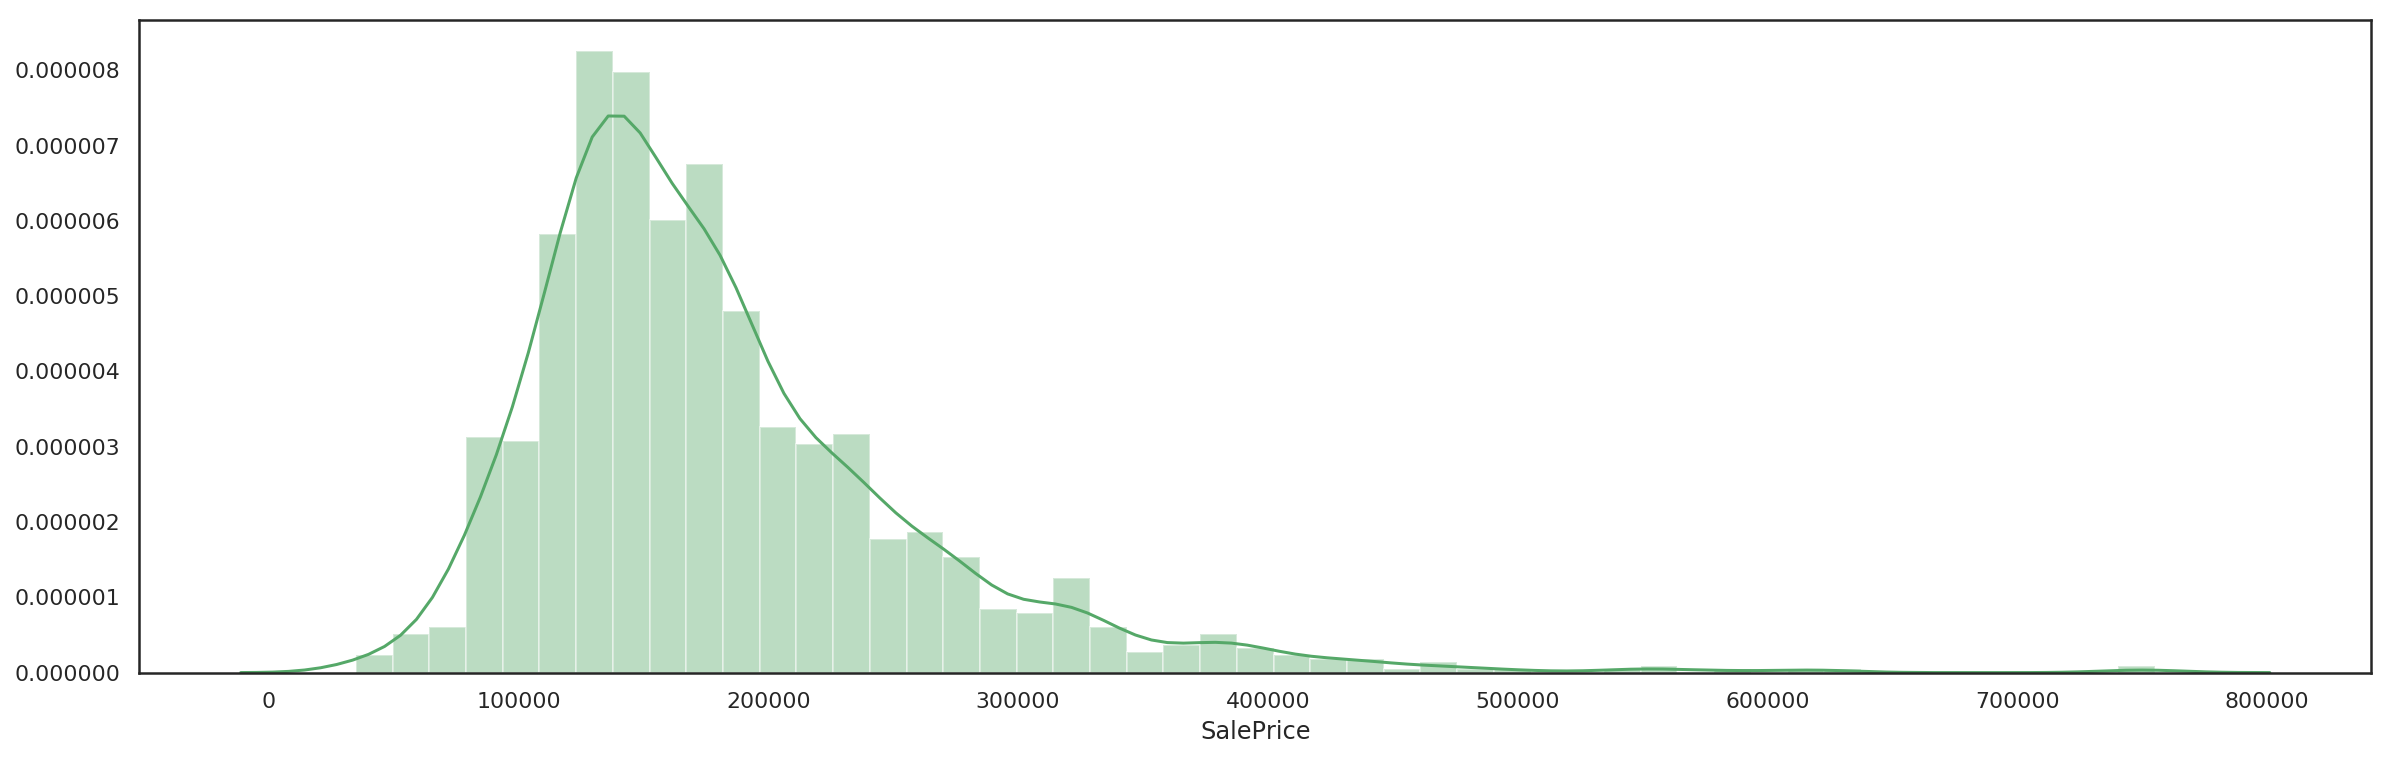

In [10]:
def lr():
    print('SalePrice distribution')
    f, ax = plt.subplots(figsize=(20, 6))
    fig = sns.distplot(house.SalePrice, color="g")
    print("Skewness: %f" % house['SalePrice'].skew())
    print("Kurtosis: %f" % house['SalePrice'].kurt())
lr()

**Observations:**<br>
The SalePrice target variable appears to be skewed to right and indicates alot of outliers.

** Fixing Skewness in Target variable**

In [11]:
# We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
house["SalePrice"] = np.log1p(house["SalePrice"])

SalePrice distribution
Skewness: 0.121347
Kurtosis: 0.809519


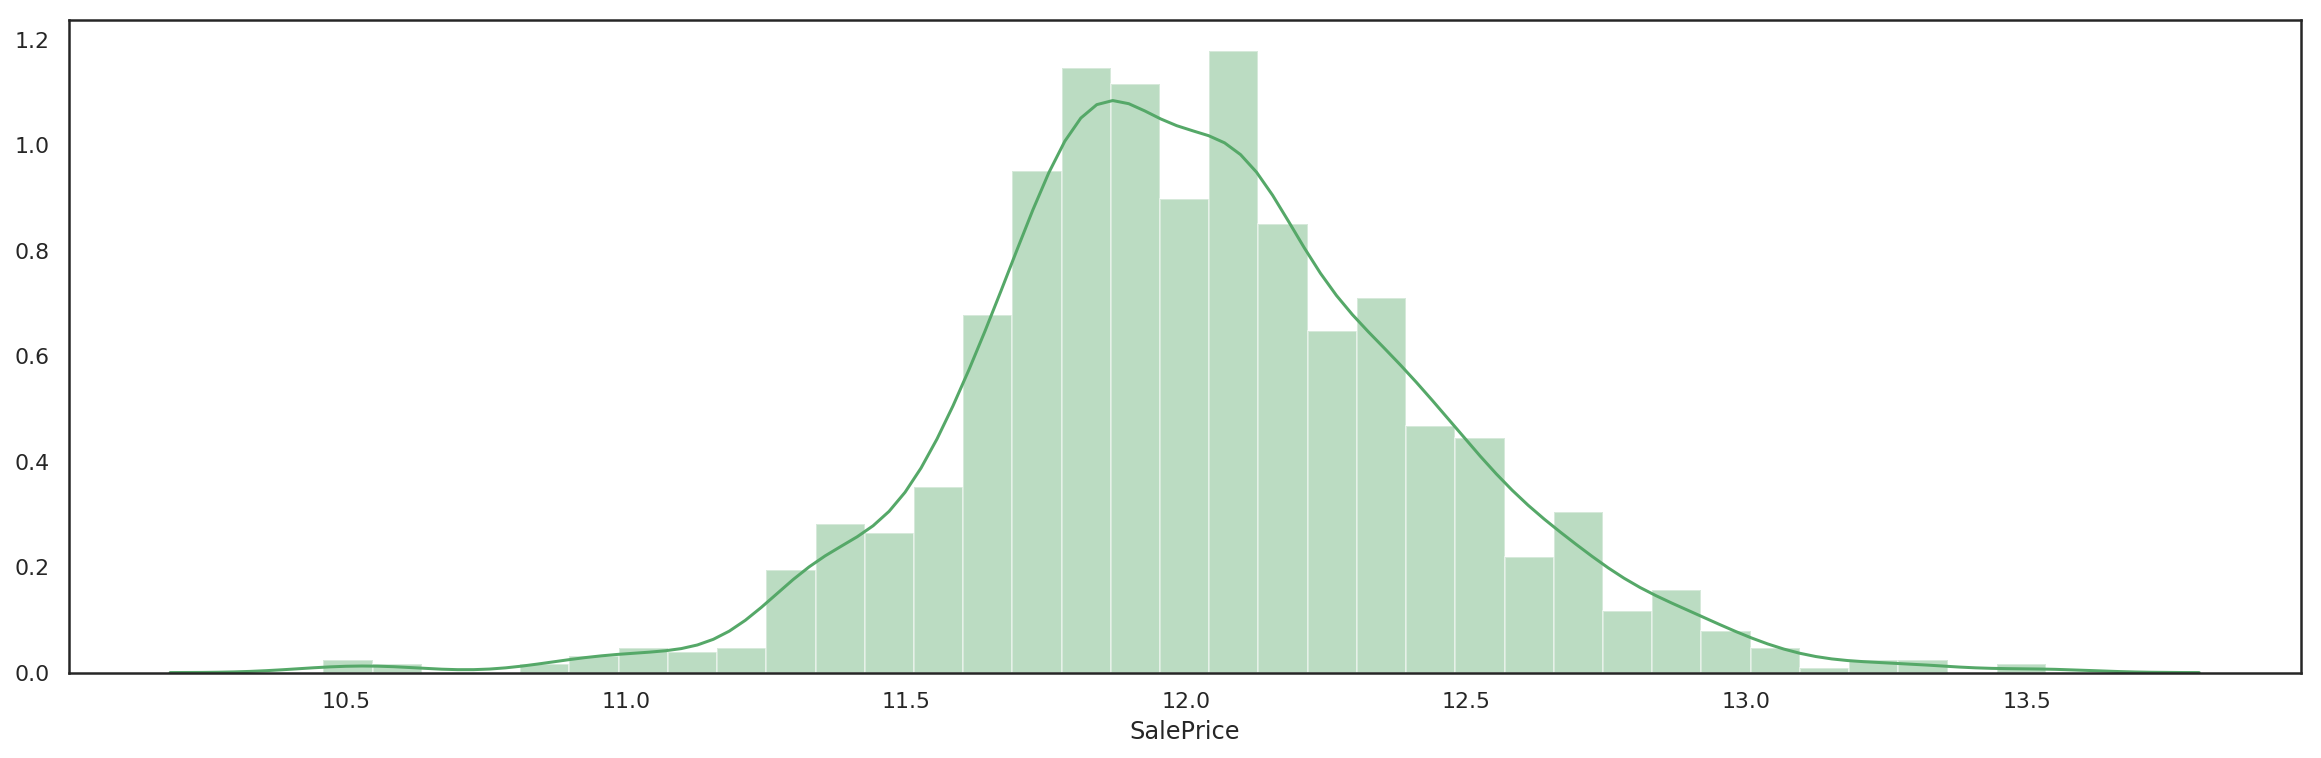

In [12]:
def lr():
    print('SalePrice distribution')
    f, ax = plt.subplots(figsize=(20, 6))
    fig = sns.distplot(house.SalePrice, color="g")
    print("Skewness: %f" % house['SalePrice'].skew())
    print("Kurtosis: %f" % house['SalePrice'].kurt())
lr()

**Pandas Pre-profilling**

In [13]:
# import pandas_profiling
# from pandas_profiling import ProfileReport

# profile = house.profile_report(title='House Cost Pandas Profiling before Data Preprocessing')
# profile.to_file(output_file="house_cost_profiling_before_preprocessing.html")

**Drop variables which will not help in prediction of house selling price**

In [14]:
house_drop = house.drop(house[["Id","3SsnPorch","Alley","BsmtCond","BsmtExposure","BsmtFinSF1","BsmtFinSF2",
                               "BsmtFinType1","BsmtFinType2","BsmtFullBath","BsmtHalfBath","CentralAir",
                               "Condition1","Condition2","Electrical","EnclosedPorch","ExterCond",
                               "ExterQual","Fence","FireplaceQu","Fireplaces","Functional","GarageCond",
                               "GarageQual","HalfBath","Heating","KitchenAbvGr","LandContour","LandSlope","LotFrontage",
                               "LowQualFinSF","MasVnrArea","MasVnrType","MiscFeature","MiscVal","OpenPorchSF","PavedDrive",
                               "PoolArea","PoolQC","RoofMatl","SaleCondition","SaleType","ScreenPorch",
                               "Street","Utilities","WoodDeckSF","YearRemodAdd"]], axis=1)

following variables are dropped from the dataset:

|Column Name|Description|Type|Action: Drop|Reason|
|:-----------|:-------------------------------------|:------|:--------|:------------------------------------------|
|Id|ID|int64|Yes|No information gain|
|3SsnPorch| Three season porch area in square feet|int64|Yes|98.4% of values are 0|
|Alley| Type of alley access|object|Yes|93.76% missing data|
|BsmtCond| General condition of the basement|object|Yes|89.79% LandContour values are with value 'TA'|
|BsmtExposure| Walkout or garden level basement walls|Object|Yes|65.27% values are 'No' with 2.6% Missing Values|
|BsmtFinSF1| Type 1 finished square feet|int64|Yes|32% Values are Zeros|
|BsmtFinSF2| Type 2 finished square feet|int64|Yes|88.6% Values are Zeros|
|BsmtFinType1| Quality of basement finished area|object|Yes|2.5% values are missing and 59.59% values are of Unf or GLQ|
|BsmtFinType2| Quality of second finished area (if present)|object|Yes|86% of values are of 'Unf'|
|BsmtFullBath| Basement full bathrooms|int64|Yes|58.6% of values are of 0|
|BsmtHalfBath| Basement half bathrooms|int64|Yes|94.4% of values are of 0|
|CentralAir| Central air conditioning|object|Yes|93.5% of values are of 'Yes'|
|Condition1| Proximity to main road or railroad|object|Yes|86.3% of Condition1 values are of 'Norm'|
|Condition2| Proximity to main road or railroad (if a second is present)|object|Yes|99.0% of Condition2 values are of 'Norm'|
|Electrical| Electrical system|object|Yes|91.4% of values are of 'SBrkr'|
|EnclosedPorch| Enclosed porch area in square feet|int64|Yes|85.8% of values are 0|
|ExterCond| Present condition of the material on the exterior|object|Yes|87.7% of values are of 'TA'|
|ExterQual| Exterior material quality|object|Yes|dependent value on ExterCondition|
|Fence| Fence quality|object|Yes|80.75% missing data|
|FireplaceQu| Fireplace quality|object|Yes|47.26% missing data|
|Fireplaces| Number of fireplaces|int64|Yes|47.3% of values are of zeros|
|Functional| Home functionality rating|object|Yes|93.2% of values are of 'Typ'|
|GarageCond| Garage condition|object|Yes|96.36 % of values are of  'TA' and 'missing'|
|GarageQual| Garage quality|object|Yes|95.34 % of values are of  'TA' and 'missing'|
|HalfBath| Half baths above grade|int64|Yes|62.5% of values are of 0|
|Heating| Type of heating|object|Yes|97.8% of values are of 'GasA'|
|KitchenAbvGr|Number of kitchens|object|Yes|95.34% of values are of 1 kitchen per house|
|LandContour| Flatness of the property|object|Yes|89.79% LandContour values are with value 'Lvl'|
|LandSlope| Slope of property|object|Yes|94.65% LandSlope values are with value|
|LotFrontage| Linear feet of street connected to property|float|Yes|17.73% of missing data|
|LowQualFinSF| Low quality finished square feet (all floors)|int64|Yes|98.2% of values are of 0|
|MasVnrArea| Masonry veneer area in square feet|float64|Yes|59.5% values are either 'none' or 'missing', median value is 0|
|MasVnrType| Masonry veneer type|object|Yes|59.7% values are either 'none' or 'missing'|
|MiscFeature| Miscellaneous feature not covered in other categories|object|Yes|96.30% Missing Data|
|MiscVal| $Value of miscellaneous feature|int64|Yes|Value of column 'MiscFeature' which has 96.30% missing data|
|OpenPorchSF| Open porch area in square feet|int64|Yes|44.9% of values are o|
|PavedDrive| Paved driveway|object|Yes|91.8% of values are 'Yes'|
|PoolArea| Pool area in square feet|int64|Yes|99.5% of value are 0|
|PoolQC| Pool quality|object|Yes|99.52% missing Data|
|RoofMatl| Roof material|object|Yes|98.2% of values are of 'CompShg'|
|SaleCondition| Condition of sale|object|Yes|82.05% of values are 'Normal'|
|SaleType| Type of sale|object|Yes|86.78% of values are 'WD'|
|ScreenPorch| Screen porch area in square feet|int64|Yes|92.1% of values are 0|
|Street| Type of road access|object|Yes|99.5% of houses are with street type 'Pave'|
|Utilities| Type of utilities available|object|Yes|99.93% of Utilities values are of 'AllPub'|
|WoodDeckSF| Wood deck area in square feet|int64|Yes|52.1% of values are 0|
|YearRemodAdd|  Remodel date|int64|Yes|Year built takes priority over year remodeled|

In [15]:
house_drop.head()

MSSubClass MSZoning  LotArea LotShape LotConfig Neighborhood BldgType  \
0          60       RL     8450      Reg    Inside      CollgCr     1Fam   
1          20       RL     9600      Reg       FR2      Veenker     1Fam   
2          60       RL    11250      IR1    Inside      CollgCr     1Fam   
3          70       RL     9550      IR1    Corner      Crawfor     1Fam   
4          60       RL    14260      IR1       FR2      NoRidge     1Fam   

  HouseStyle  OverallQual  OverallCond    ...      KitchenQual TotRmsAbvGrd  \
0     2Story            7            5    ...               Gd            8   
1     1Story            6            8    ...               TA            6   
2     2Story            7            5    ...               Gd            6   
3     2Story            7            5    ...               Gd            7   
4     2Story            8            5    ...               Gd            9   

  GarageType GarageYrBlt GarageFinish GarageCars  GarageArea  MoSold YrSold  \
0     Attchd      2003.0          RFn          2         548       2   2008   
1     Attchd      1976.0          RFn          2         460       5   2007   
2     Attchd      2001.0          RFn          2         608       9   2008   
3     Detchd      1998.0          Unf          3         642       2   2006   
4     Attchd      2000.0          RFn          3         836      12   2008   

   SalePrice  
0  12.247699  
1  12.109016  
2  12.317171  
3  11.849405  
4  12.429220  

[5 rows x 34 columns]

**Identify missing values**

In [16]:
def lr():
    total = house_drop.isnull().sum().sort_values(ascending=False)
    percent = (house_drop.isnull().sum()/house_drop.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    missing_data.head(20)
    miss = print(missing_data)
    return miss
lr()

              Total   Percent
GarageFinish     81  0.055479
GarageYrBlt      81  0.055479
GarageType       81  0.055479
BsmtQual         37  0.025342
HouseStyle        0  0.000000
Exterior2nd       0  0.000000
Exterior1st       0  0.000000
RoofStyle         0  0.000000
YearBuilt         0  0.000000
OverallCond       0  0.000000
OverallQual       0  0.000000
SalePrice         0  0.000000
BldgType          0  0.000000
Foundation        0  0.000000
LotConfig         0  0.000000
LotShape          0  0.000000
LotArea           0  0.000000
MSZoning          0  0.000000
Neighborhood      0  0.000000
BsmtUnfSF         0  0.000000
YrSold            0  0.000000
TotalBsmtSF       0  0.000000
HeatingQC         0  0.000000
1stFlrSF          0  0.000000
2ndFlrSF          0  0.000000
GrLivArea         0  0.000000
FullBath          0  0.000000
BedroomAbvGr      0  0.000000
KitchenQual       0  0.000000
TotRmsAbvGrd      0  0.000000
GarageCars        0  0.000000
GarageArea        0  0.000000
MoSold    

**Impute the missing values and feature engineering**

Following variable are int/float types but these needs to be categorical variables: <br>MoSold- Month Sold, MSSubClass -  The building class

In [17]:
house_drop['MSSubClass'] = house_drop['MSSubClass'].astype(str)

Combining total area of the house as an engineered feature

In [18]:
house_drop['TotalSF']=house_drop['1stFlrSF']+house_drop['2ndFlrSF']+house_drop['TotalBsmtSF']
house_drop = house_drop.drop(house_drop[['1stFlrSF','2ndFlrSF','TotalBsmtSF']], axis=1)

Fixing Missing Values:

In [19]:
house_drop['BsmtQual'] = house_drop['BsmtQual'].fillna(house_drop['BsmtQual'].mode()[0])
house_drop['GarageType'] = house_drop['GarageType'].fillna(house_drop['GarageType'].mode()[0])
house_drop['GarageFinish'] = house_drop['GarageFinish'].fillna(house_drop['GarageFinish'].mode()[0])


High Cardinality Check:

Are house prices increasing or decreasing with Built Year?


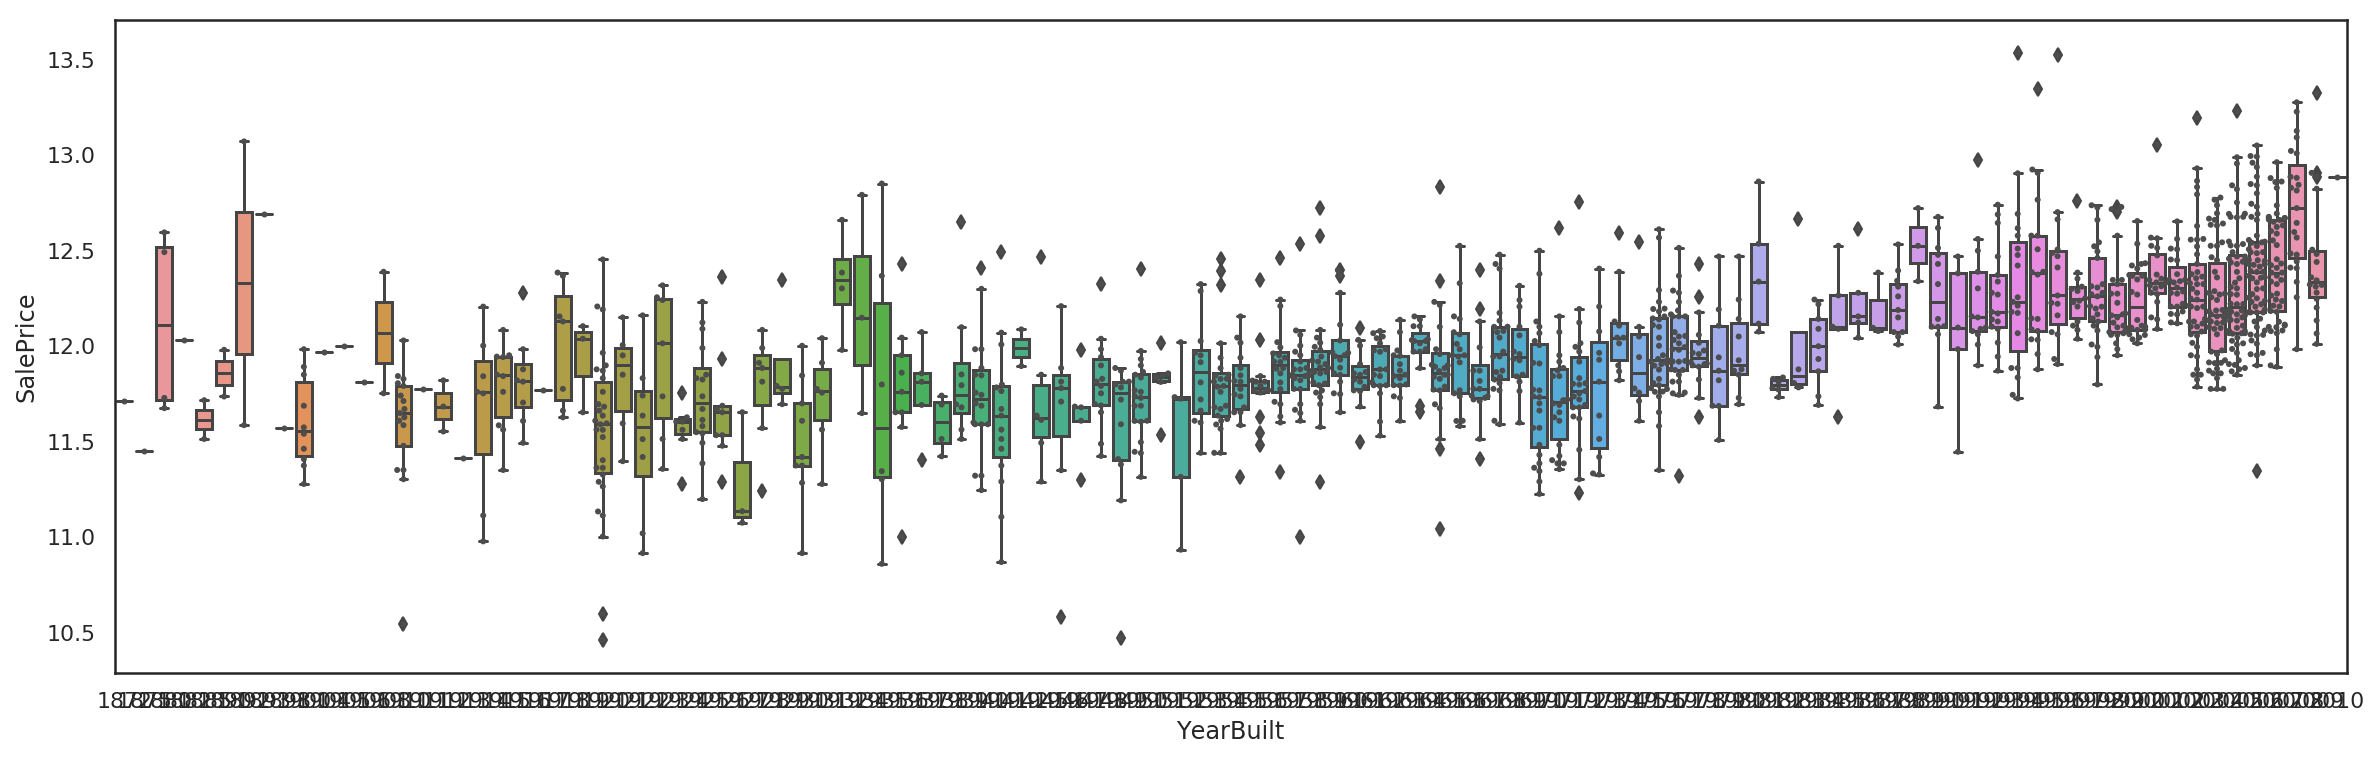

In [20]:
def lr():
    print('Are house prices increasing or decreasing with Built Year?')
    var = 'YearBuilt'
    data = pd.concat([house_drop['SalePrice'], house_drop[var]], axis=1)
    f, ax = plt.subplots(figsize=(20, 6))
    fig = sns.boxplot(x=var, y="SalePrice", data=data)
    fig = sns.swarmplot(x=var, y="SalePrice", data=data, color='0.3', size = 3)
lr()

Are house prices increasing or decreasing with Garage built Year?


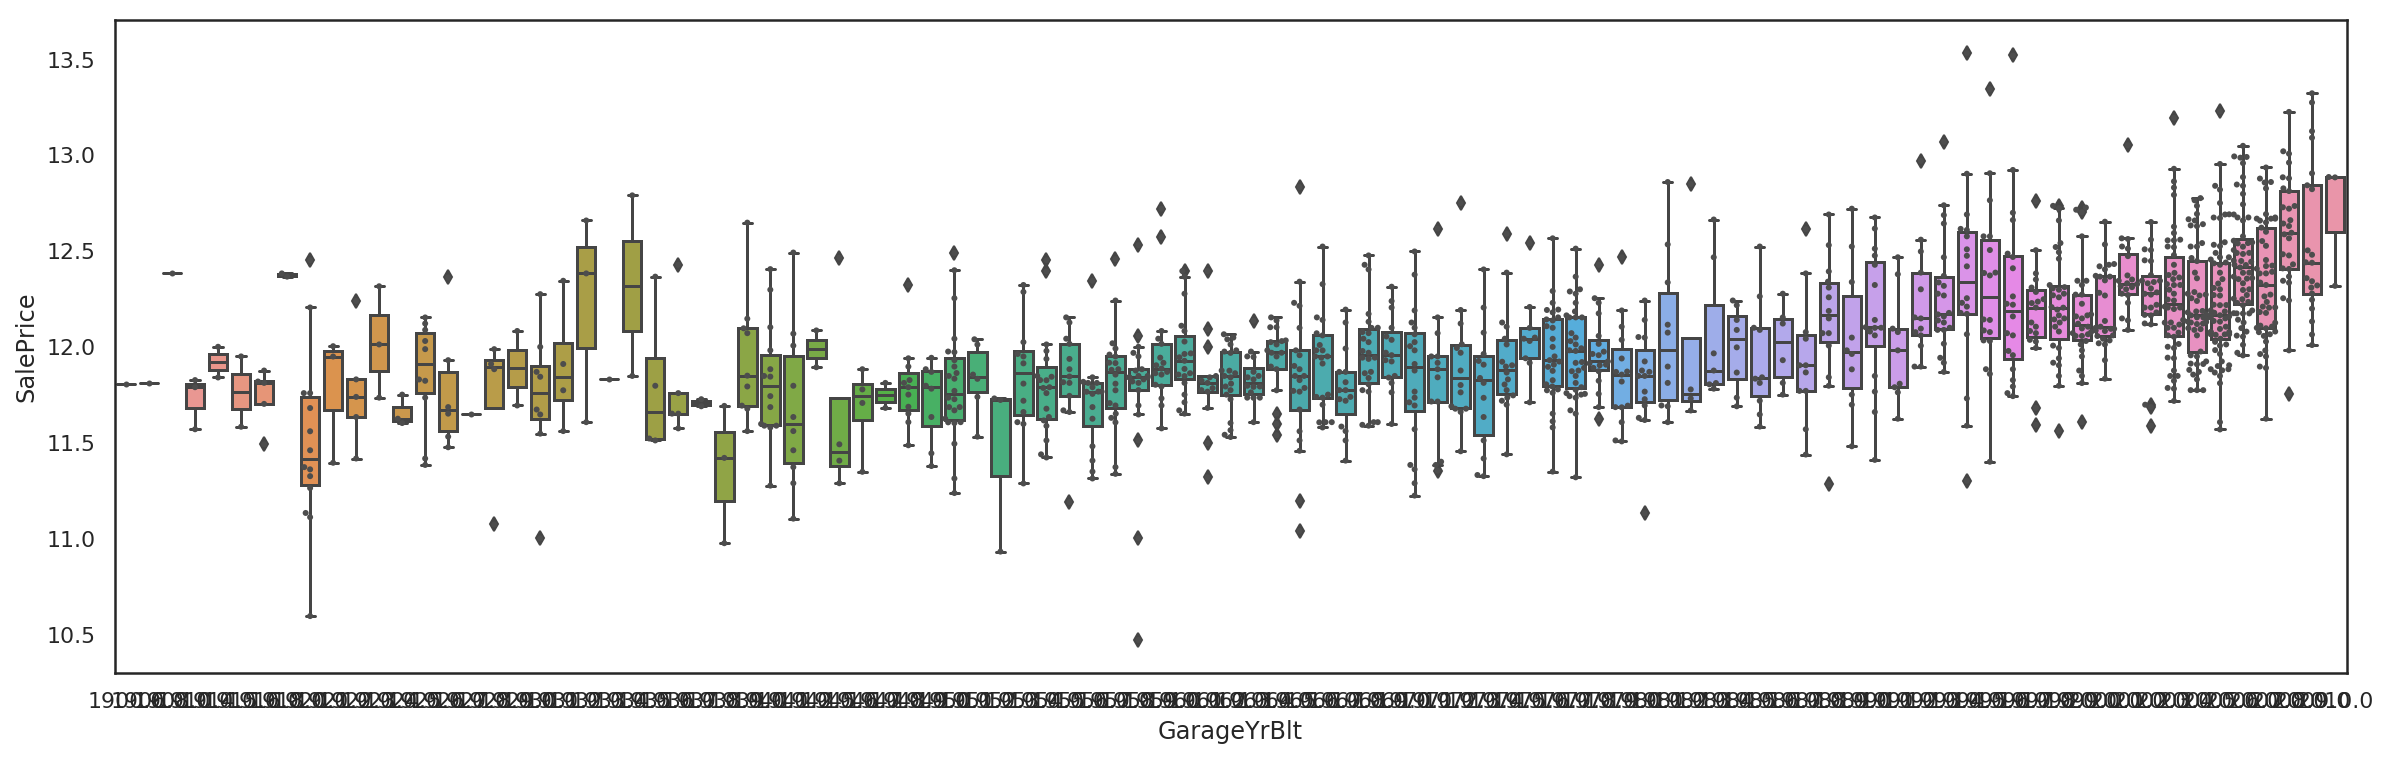

In [21]:
def lr():
    print('Are house prices increasing or decreasing with Garage built Year?')
    var = 'GarageYrBlt'
    data = pd.concat([house_drop['SalePrice'], house_drop[var]], axis=1)
    f, ax = plt.subplots(figsize=(20, 6))
    fig = sns.boxplot(x=var, y="SalePrice", data=data)
    fig = sns.swarmplot(x=var, y="SalePrice", data=data, color='0.3', size = 3)
lr()


Not much information is available with variables YearRemodAdd and GarageYrBlt and hence dropping these variables from dataset

In [22]:
house_drop = house_drop.drop(house_drop[['YearBuilt','GarageYrBlt']], axis=1)

**Pandas Post-profilling**

In [23]:
# import pandas_profiling
# from pandas_profiling import ProfileReport

# profile = house_drop.profile_report(title='House Cost Pandas Profiling After Data Preprocessing')
# profile.to_file(output_file="house_cost_profiling_after_preprocessing.html")

Find Multicollinearity instances in the dataset

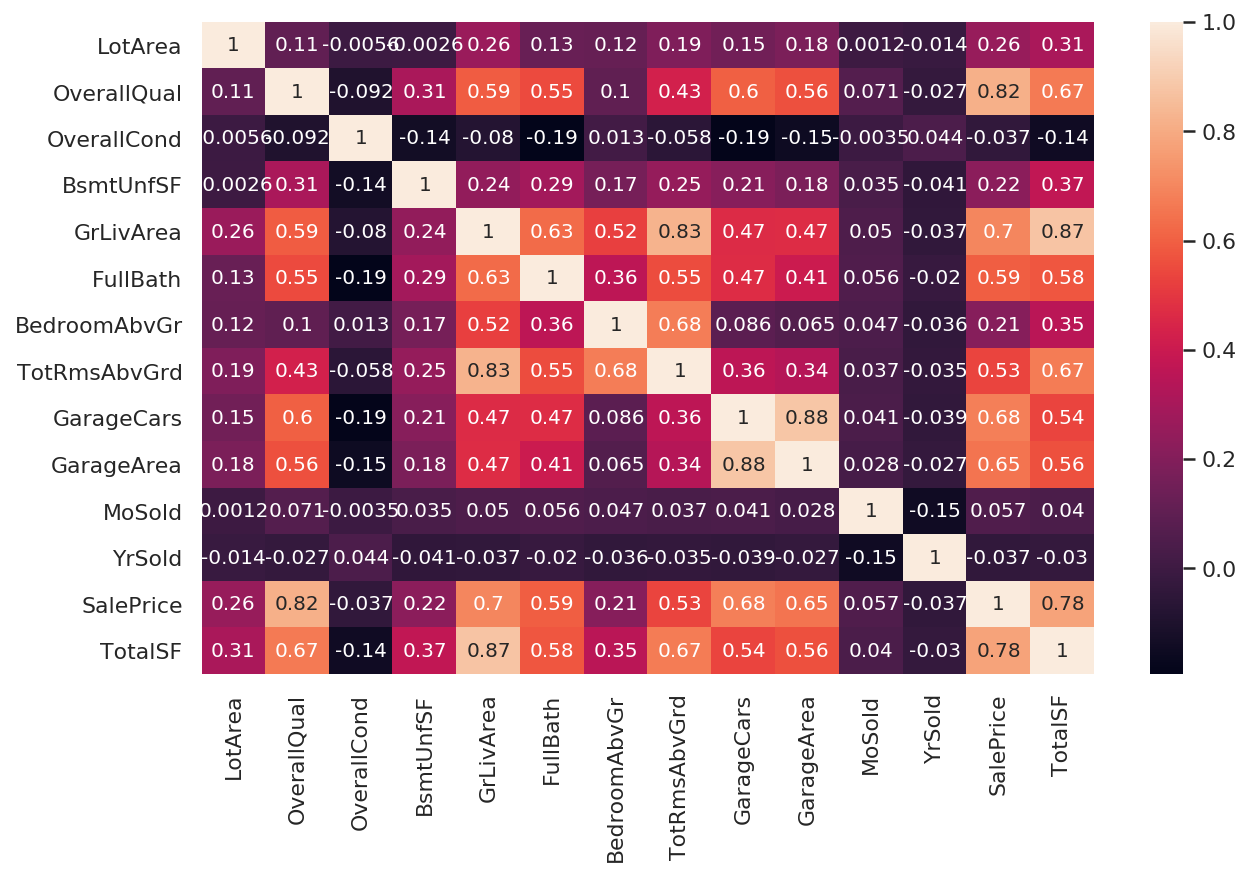

In [24]:
corrmat = house_drop.corr()
f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(corrmat, annot=True);

**Remove Multicollinear variables**<br>
removing 'TotRmsAbvGrd' multicollinear variable which are correlated with 'GrLivArea' Variables with values as -0.8>corr()<0.8<br>
removing 'GrLivArea' multicollinear variable which are correlated with 'TotalSF' Variables with values as -0.8>corr()<0.8 <br>
removing 'GarageArea' multicollinear variable which are correlated with 'GarageCars' Variables with values as -0.8>corr()<0.8<br>


In [25]:
house_final = house_drop.drop(['GarageArea','GrLivArea','TotRmsAbvGrd'], axis=1)

In [26]:
house_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 27 columns):
MSSubClass      1460 non-null object
MSZoning        1460 non-null object
LotArea         1460 non-null int64
LotShape        1460 non-null object
LotConfig       1460 non-null object
Neighborhood    1460 non-null object
BldgType        1460 non-null object
HouseStyle      1460 non-null object
OverallQual     1460 non-null int64
OverallCond     1460 non-null int64
RoofStyle       1460 non-null object
Exterior1st     1460 non-null object
Exterior2nd     1460 non-null object
Foundation      1460 non-null object
BsmtQual        1460 non-null object
BsmtUnfSF       1460 non-null int64
HeatingQC       1460 non-null object
FullBath        1460 non-null int64
BedroomAbvGr    1460 non-null int64
KitchenQual     1460 non-null object
GarageType      1460 non-null object
GarageFinish    1460 non-null object
GarageCars      1460 non-null int64
MoSold          1460 non-null int64
YrSold       

**Dealing with outliers**

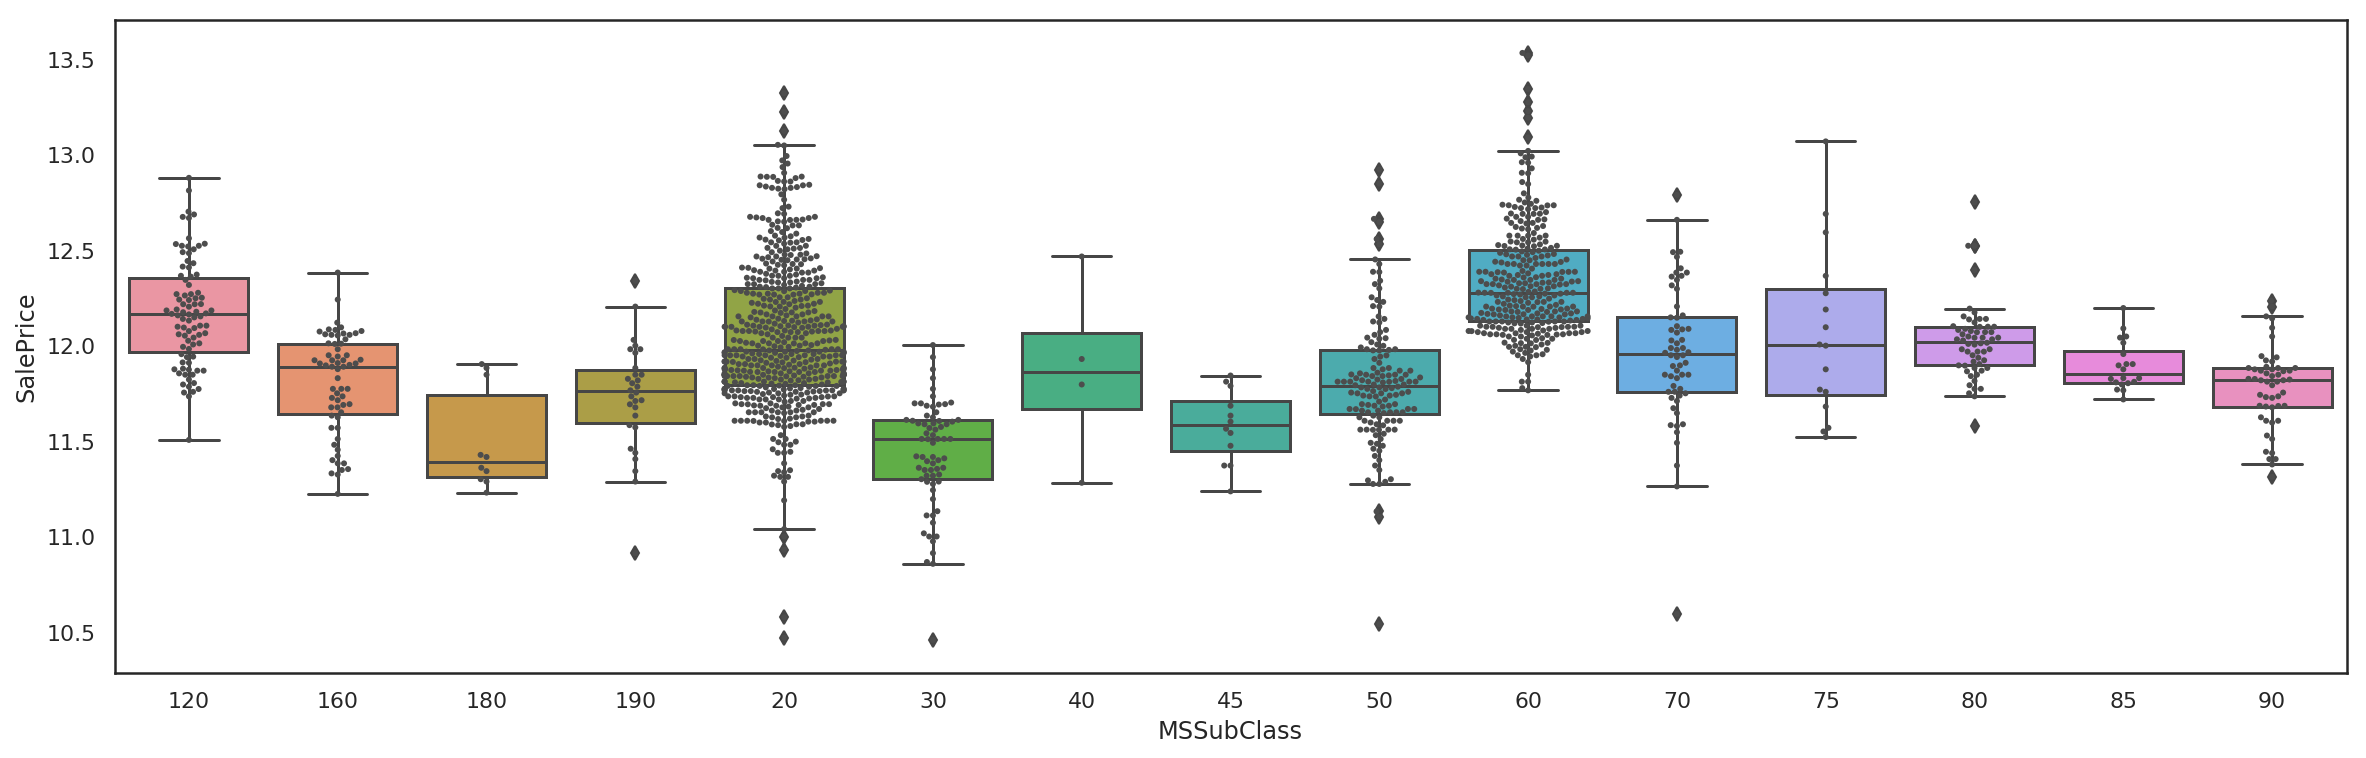

In [27]:
# MSSubClass vs Sale Price
def lr():
    var = 'MSSubClass'
    data = pd.concat([house_final['SalePrice'], house_final[var]], axis=1)
    data = data.iloc[(-data.groupby(var)['SalePrice'].transform('median')).argsort()]
    f, ax = plt.subplots(figsize=(20, 6))
    fig = sns.boxplot(x=var, y="SalePrice", data=data)
    fig = sns.swarmplot(x=var, y="SalePrice", data=data, color='0.3', size = 3)
lr()

**Observation**<Br> 'MSSubClass' variable is a nominal categorical type variable and it does not describe clear relationship with 'SalePrice' variable.

In [28]:
#Droping 'MSSubClass' varibale from the dataset
house_final = house_final.drop(['MSSubClass'], axis=1)

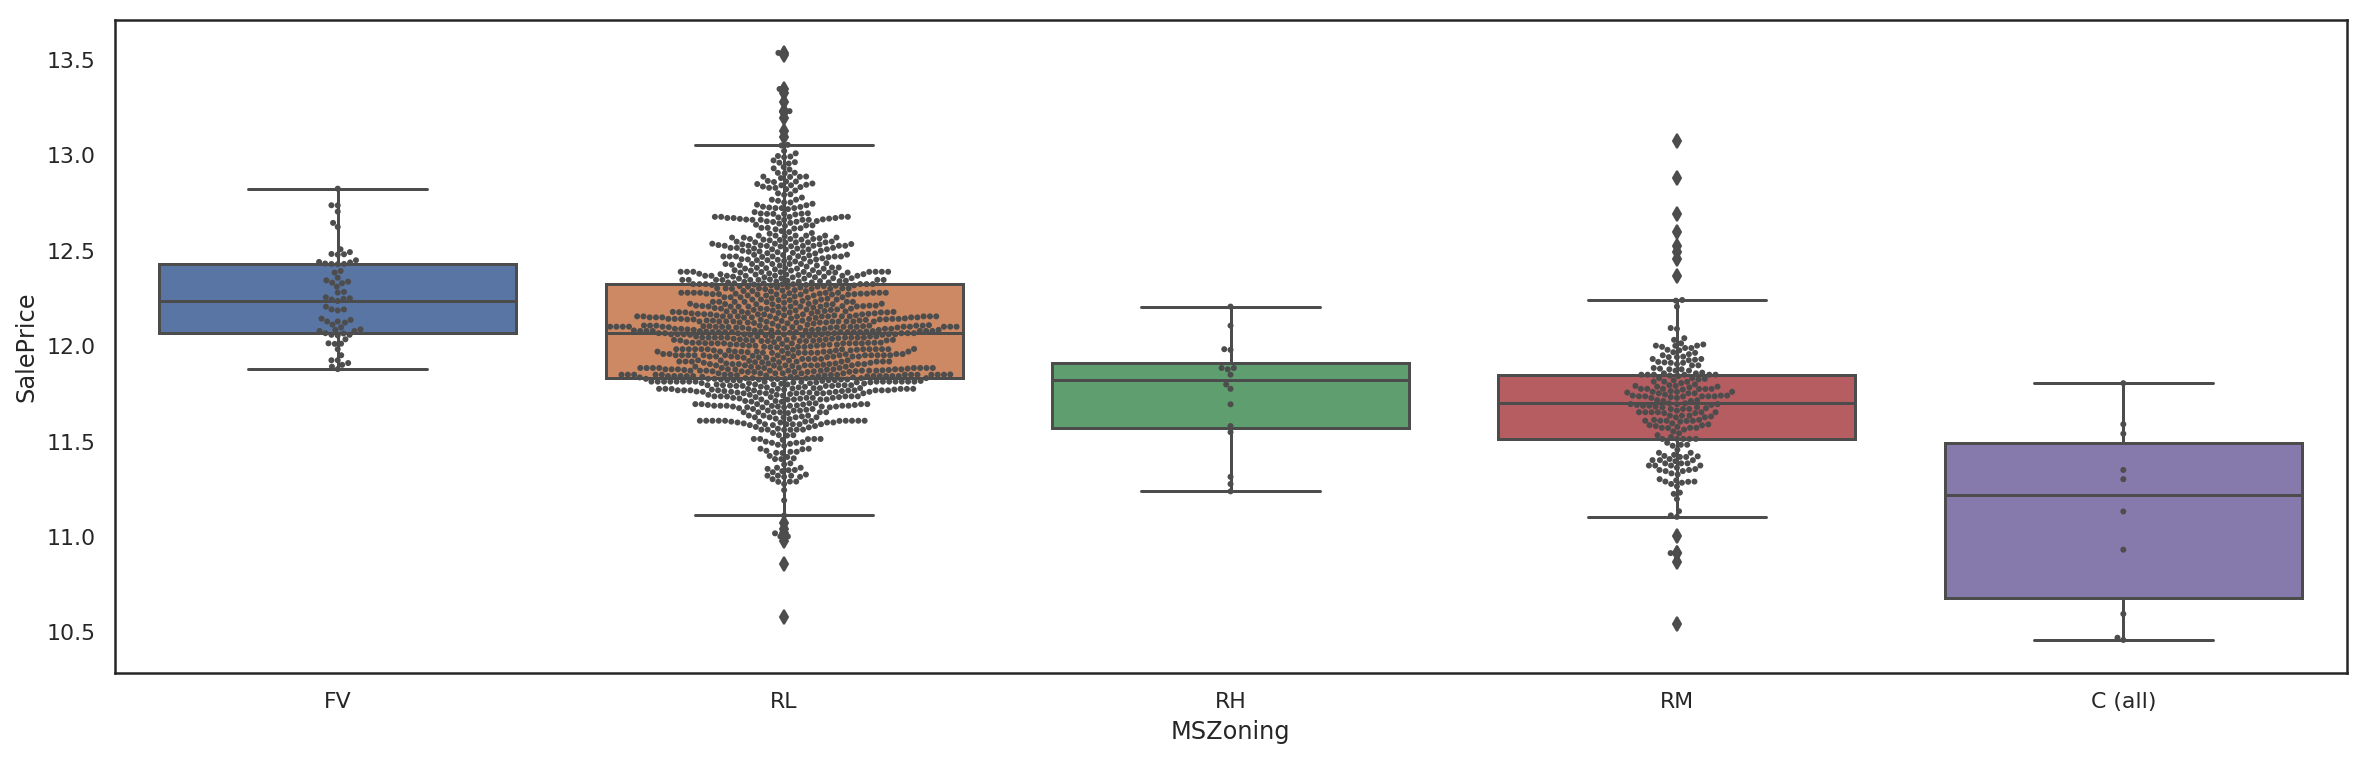

In [29]:
# MSZoning vs Sale Price
def lr():    
    var = 'MSZoning'
    data = pd.concat([house_final['SalePrice'], house_final[var]], axis=1)
    data = data.iloc[(-data.groupby(var)['SalePrice'].transform('median')).argsort()]
    f, ax = plt.subplots(figsize=(20, 6))
    fig = sns.boxplot(x=var, y="SalePrice", data=data)
    fig = sns.swarmplot(x=var, y="SalePrice", data=data, color='0.3', size = 3)
lr()

**Observation**<Br> 'MSZoning' variable is an ordinal categorical type variable and it describes relationship with 'SalePrice' variable. we can retain this variable

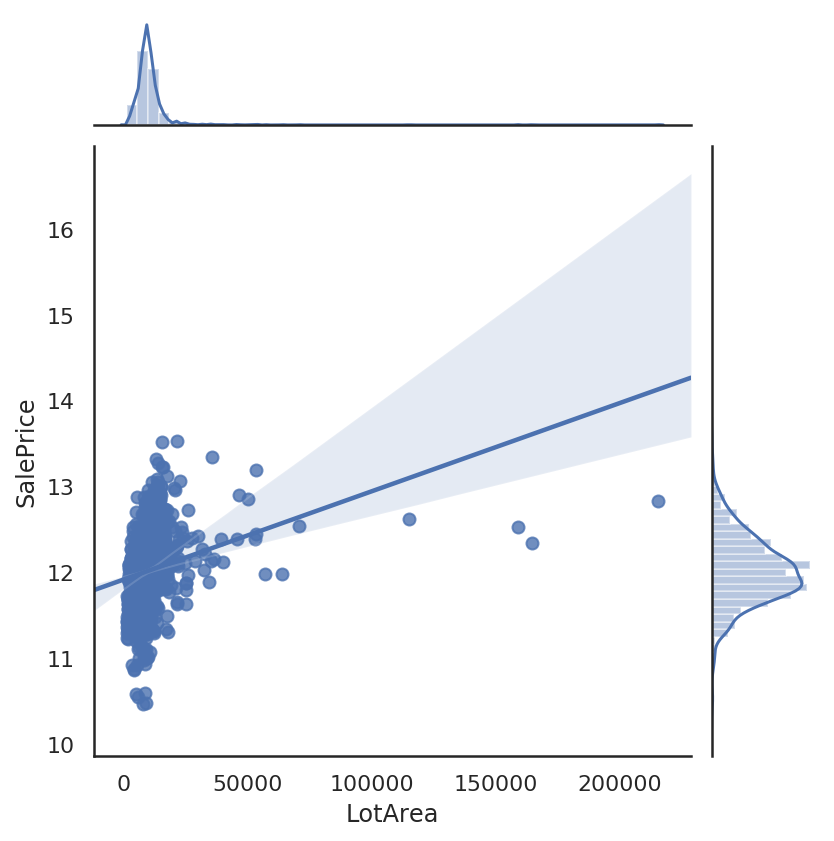

In [30]:
# LotArea vs Sale Price
def lr():    
    var = 'LotArea'
    data = pd.concat([house_final['SalePrice'], house_final[var]], axis=1)
    sns.jointplot(x=var, y="SalePrice", data=data,kind='reg')
lr()

**Observation**<Br> 'LotArea' variable is a numerical type variable and it describes relationship with 'SalePrice' variable. However correlation between 'LotArea and 'SalePrice' is very weak 0.26.

In [31]:
#Droping 'LotArea' varibale from the dataset
house_final = house_final.drop(['LotArea'], axis=1)

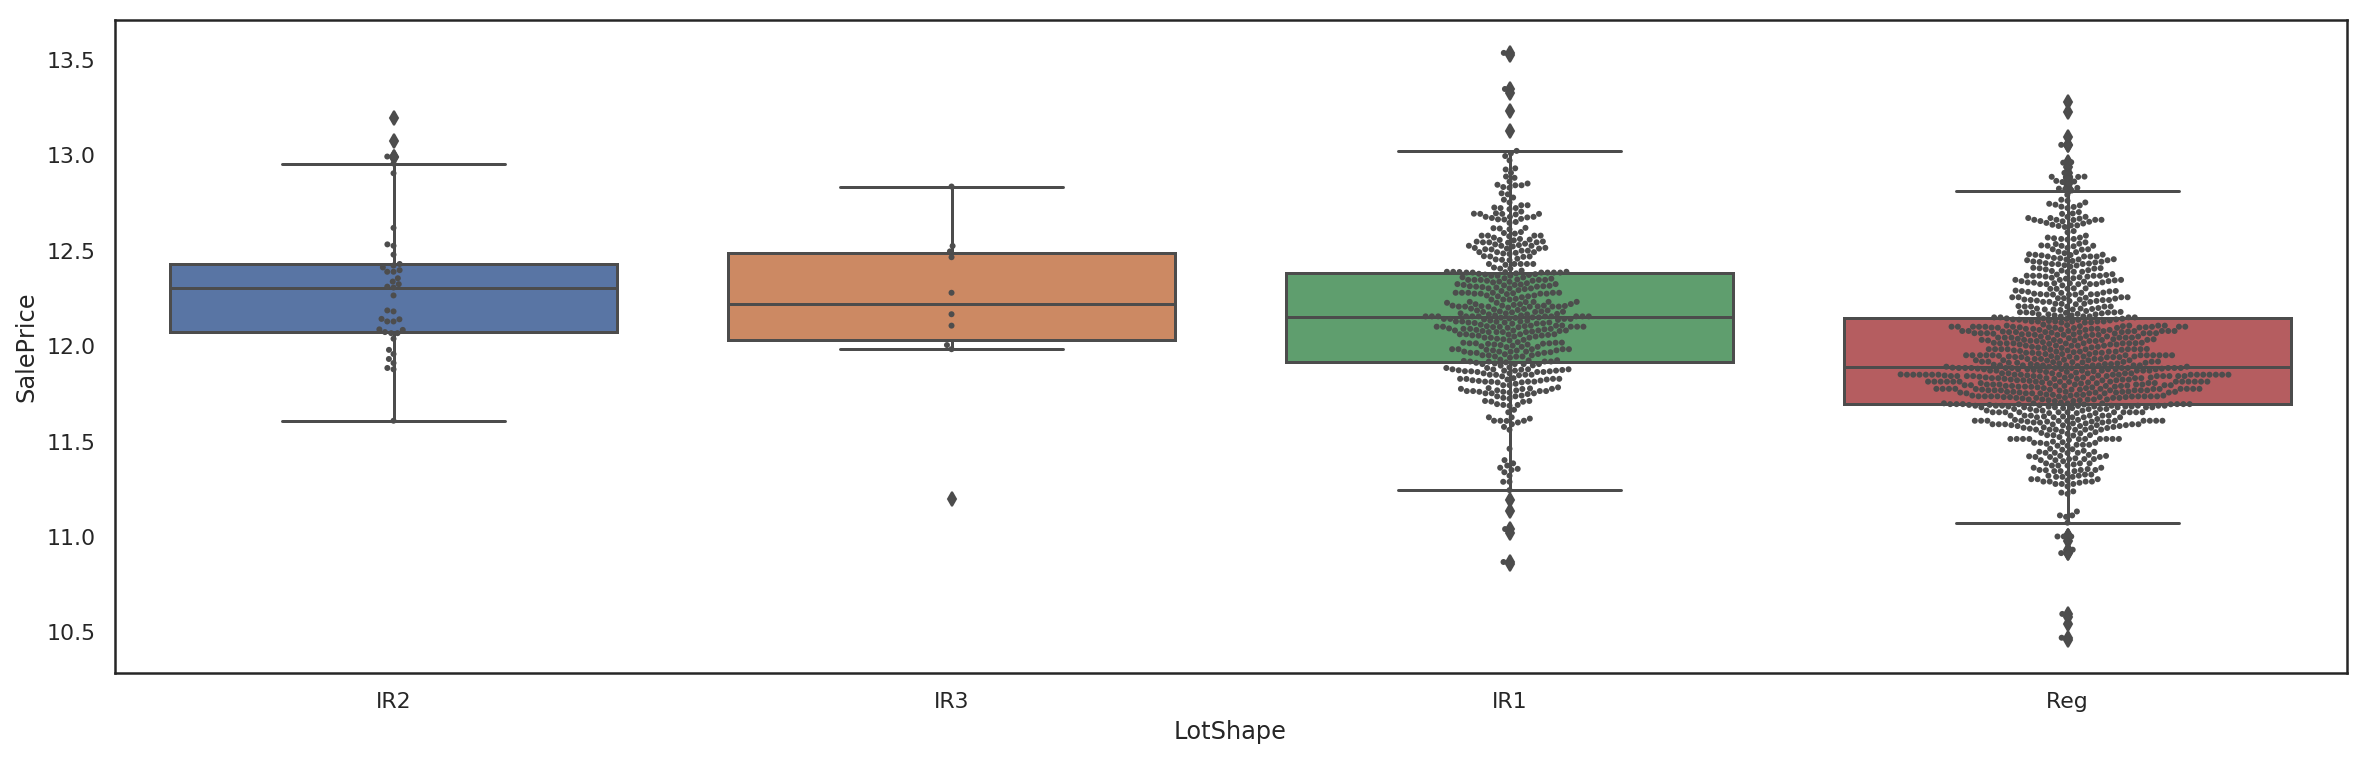

In [32]:
# LotShape vs Sale Price
def lr():    
    var = 'LotShape'
    data = pd.concat([house_final['SalePrice'], house_final[var]], axis=1)
    data = data.iloc[(-data.groupby(var)['SalePrice'].transform('median')).argsort()]
    f, ax = plt.subplots(figsize=(20, 6))
    fig = sns.boxplot(x=var, y="SalePrice", data=data)
    fig = sns.swarmplot(x=var, y="SalePrice", data=data, color='0.3', size = 3)
lr()

**Observation**<Br> 'LotShape variable is an nominal categorical type variable and it describes relationship with 'SalePrice' variable. Median house prices for Lotshape values are between the range of 11.9-12.3 with many outliers in IR1 and Reg type lot shapes.

In [33]:
#Droping 'LotShape' varibale from the dataset
house_final = house_final.drop(['LotShape'], axis=1)

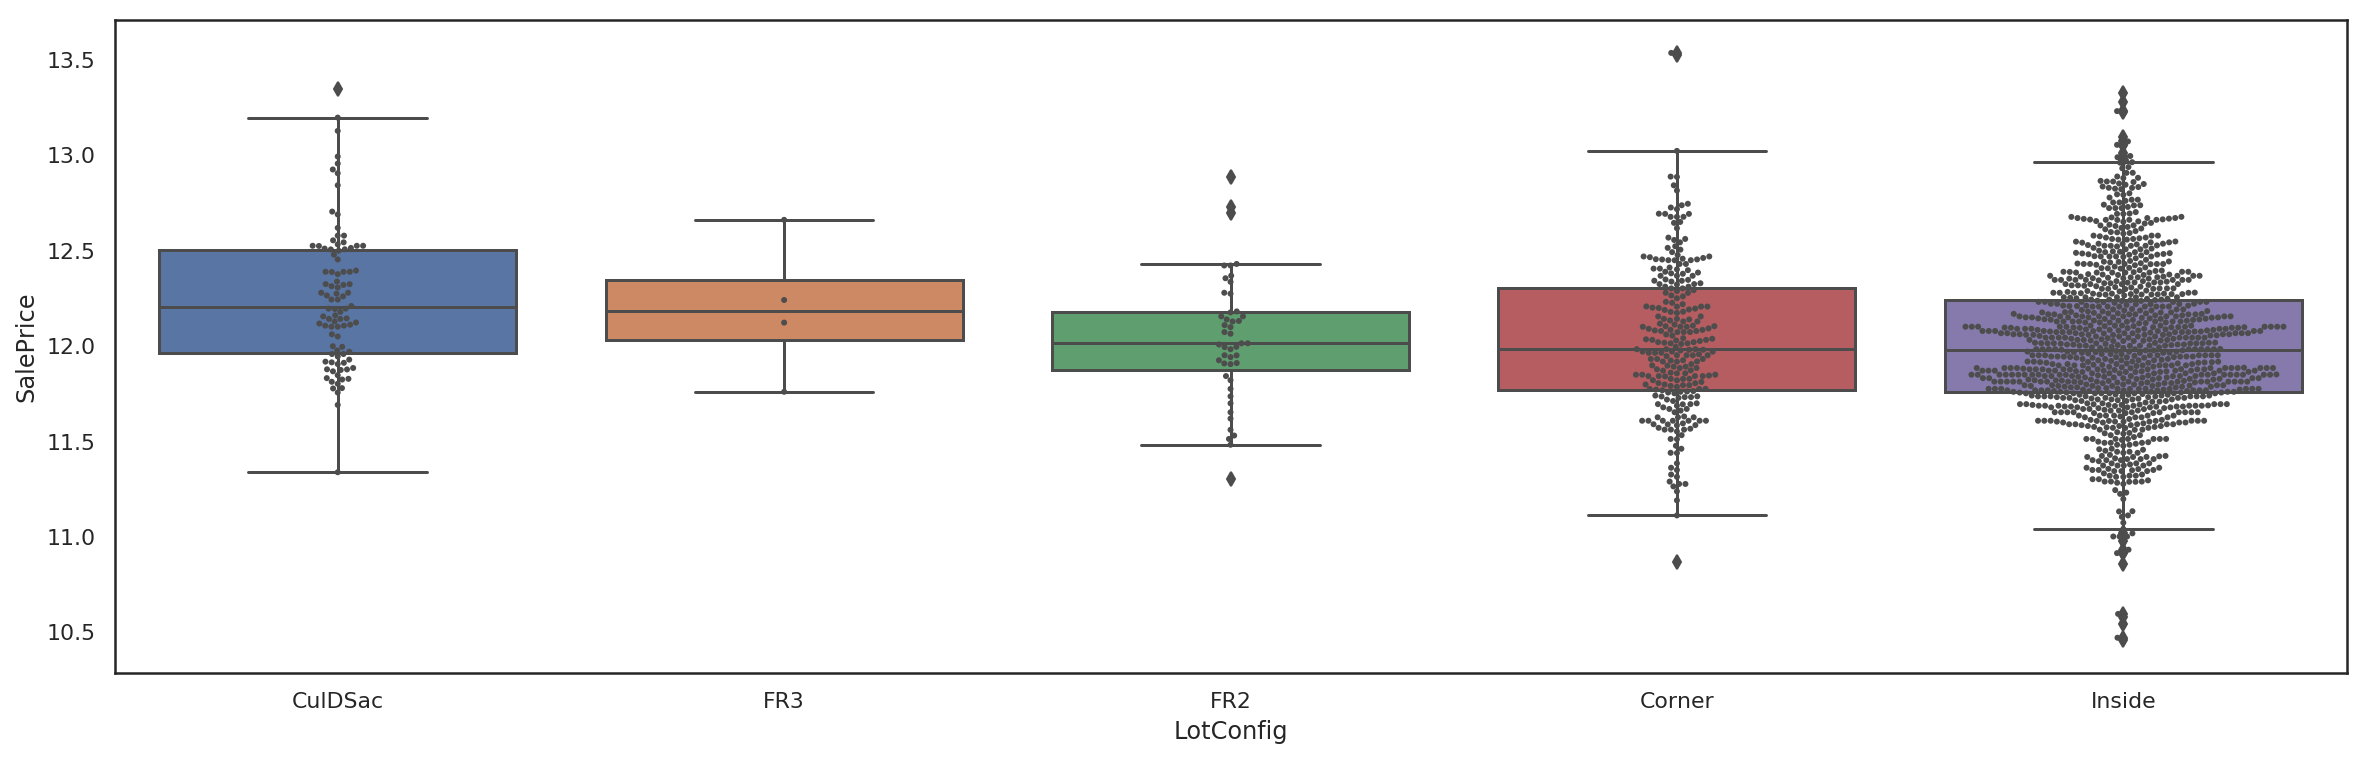

In [34]:
# LotConfig vs Sale Price
def lr():    
    var = 'LotConfig'
    data = pd.concat([house_final['SalePrice'], house_final[var]], axis=1)
    data = data.iloc[(-data.groupby(var)['SalePrice'].transform('median')).argsort()]
    f, ax = plt.subplots(figsize=(20, 6))
    fig = sns.boxplot(x=var, y="SalePrice", data=data)
    fig = sns.swarmplot(x=var, y="SalePrice", data=data, color='0.3', size = 3)
lr()

**Observation**<Br> 'LotConfig' variable is an nominal categorical type variable and it describes relationship with 'SalePrice' variable. Median house prices for LotConfig values are between the range of 12-12.25 with many outliers in Inside type lot config.

In [35]:
#Droping 'LotConfig' varibale from the dataset
house_final = house_final.drop(['LotConfig'], axis=1)

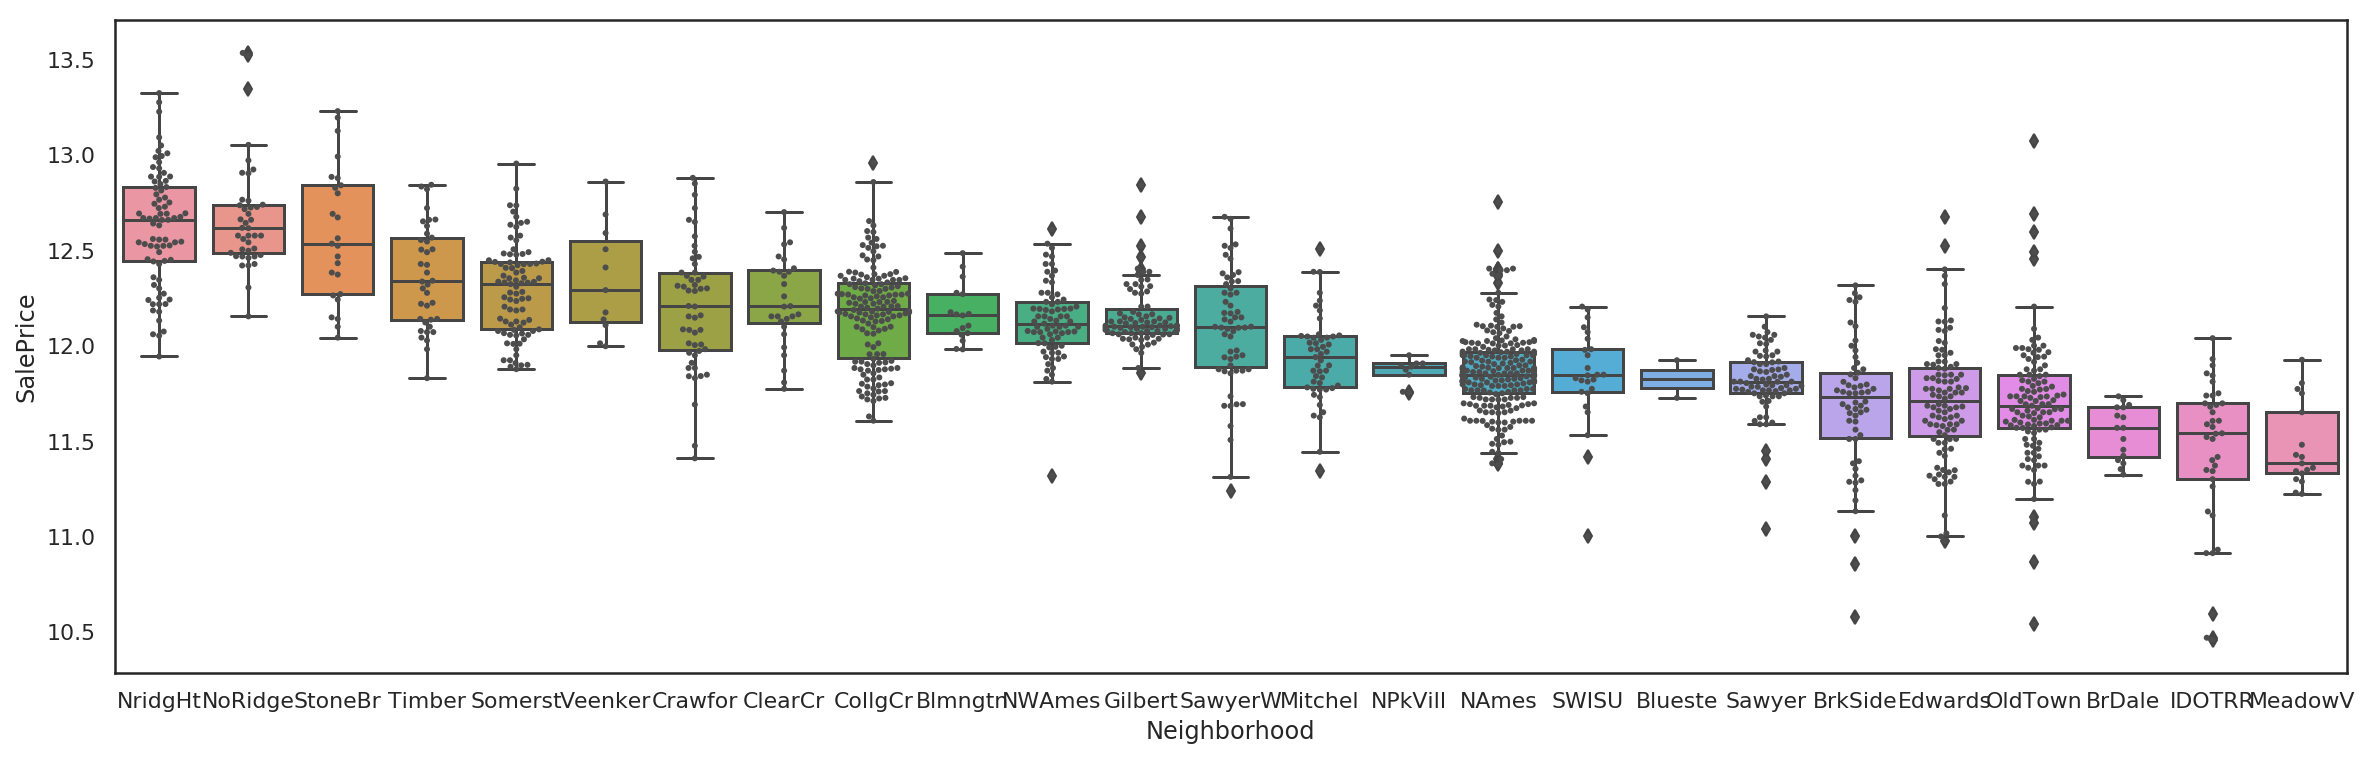

In [36]:
# Neighborhood vs Sale Price
def lr():    
    var = 'Neighborhood'
    data = pd.concat([house_final['SalePrice'], house_final[var]], axis=1)
    data = data.iloc[(-data.groupby(var)['SalePrice'].transform('median')).argsort()]
    f, ax = plt.subplots(figsize=(20, 6))
    fig = sns.boxplot(x=var, y="SalePrice", data=data)
    fig = sns.swarmplot(x=var, y="SalePrice", data=data, color='0.3', size = 3)
lr()

**Observation**<Br> 'Neighborhood' variable is an nominal categorical type variable and it describes relationship with 'SalePrice' variable.

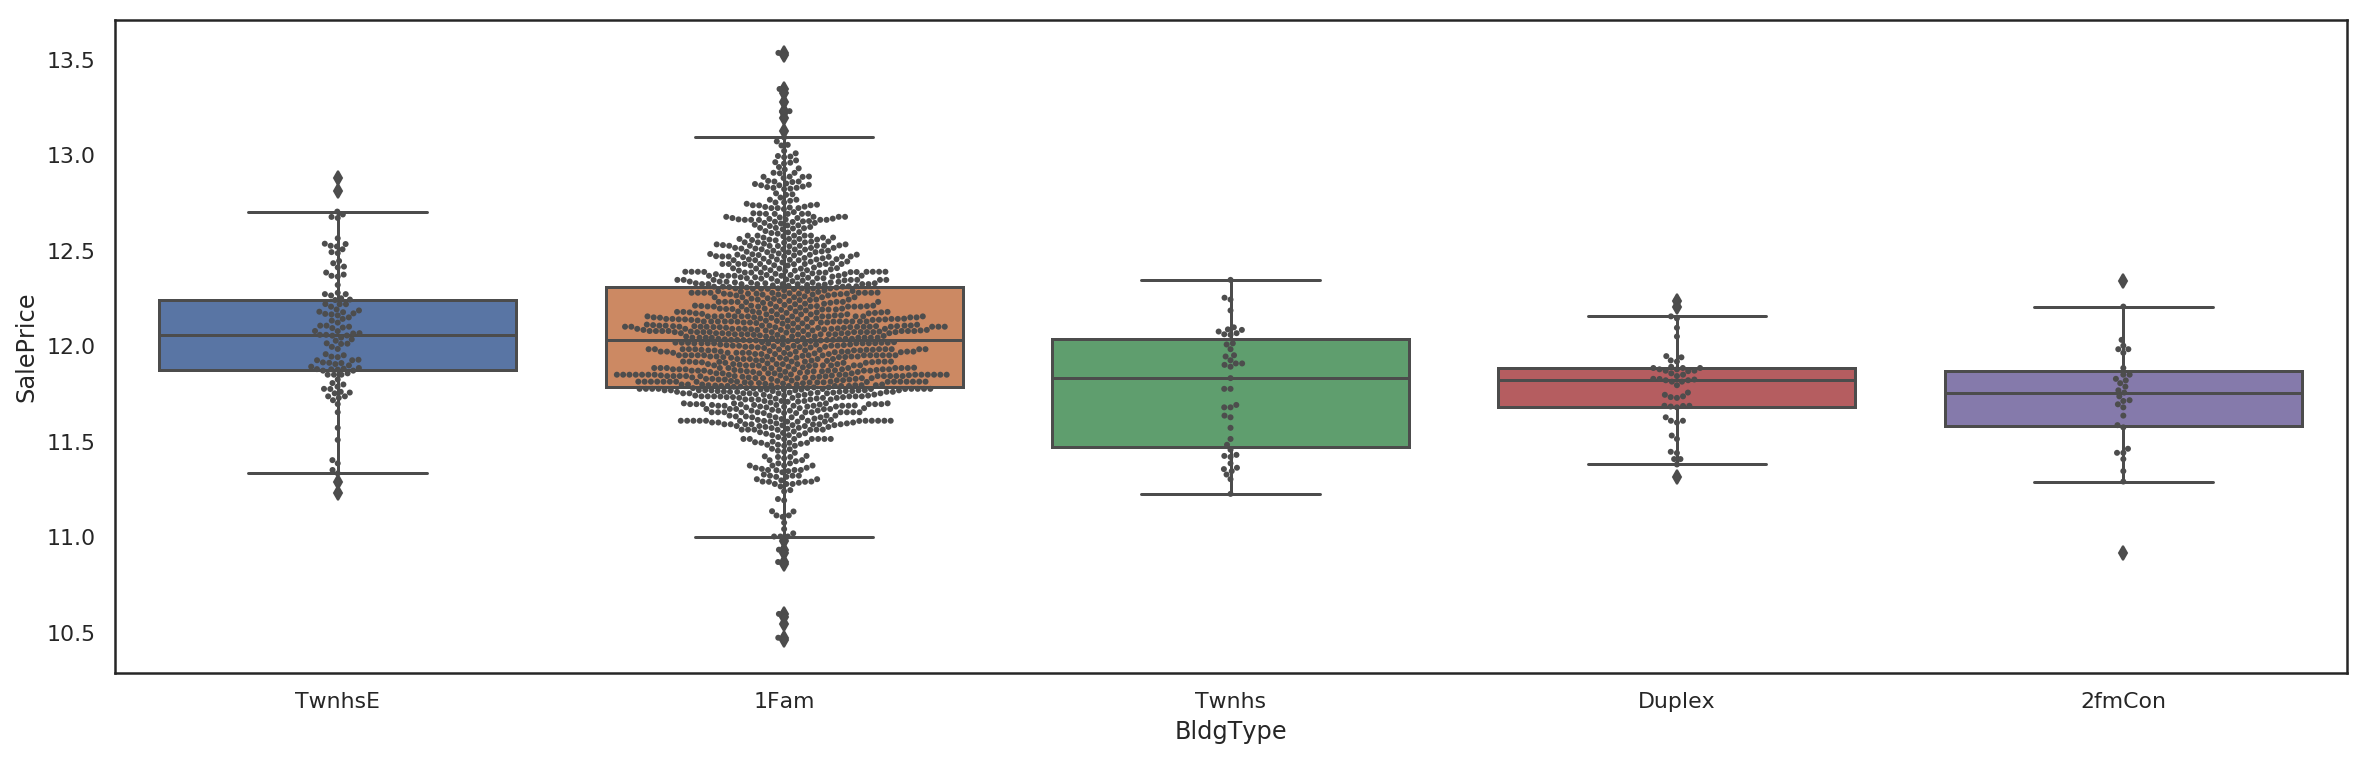

In [37]:
#BldgType vs Sale Price
def lr():    
    var = 'BldgType'
    data = pd.concat([house_final['SalePrice'], house_final[var]], axis=1)
    data = data.iloc[(-data.groupby(var)['SalePrice'].transform('median')).argsort()]
    f, ax = plt.subplots(figsize=(20, 6))
    fig = sns.boxplot(x=var, y="SalePrice", data=data)
    fig = sns.swarmplot(x=var, y="SalePrice", data=data, color='0.3', size = 3)
lr()

**Observation**<Br> 'BldgType' variable is an nominal categorical type variable and it describes relationship with 'SalePrice' variable. Median house prices for LotConfig values are between the range of 11.8-12.1 with majority of values of 1Fam.

In [38]:
#Droping 'BldgType' varibale from the dataset
house_final = house_final.drop(['BldgType'], axis=1)

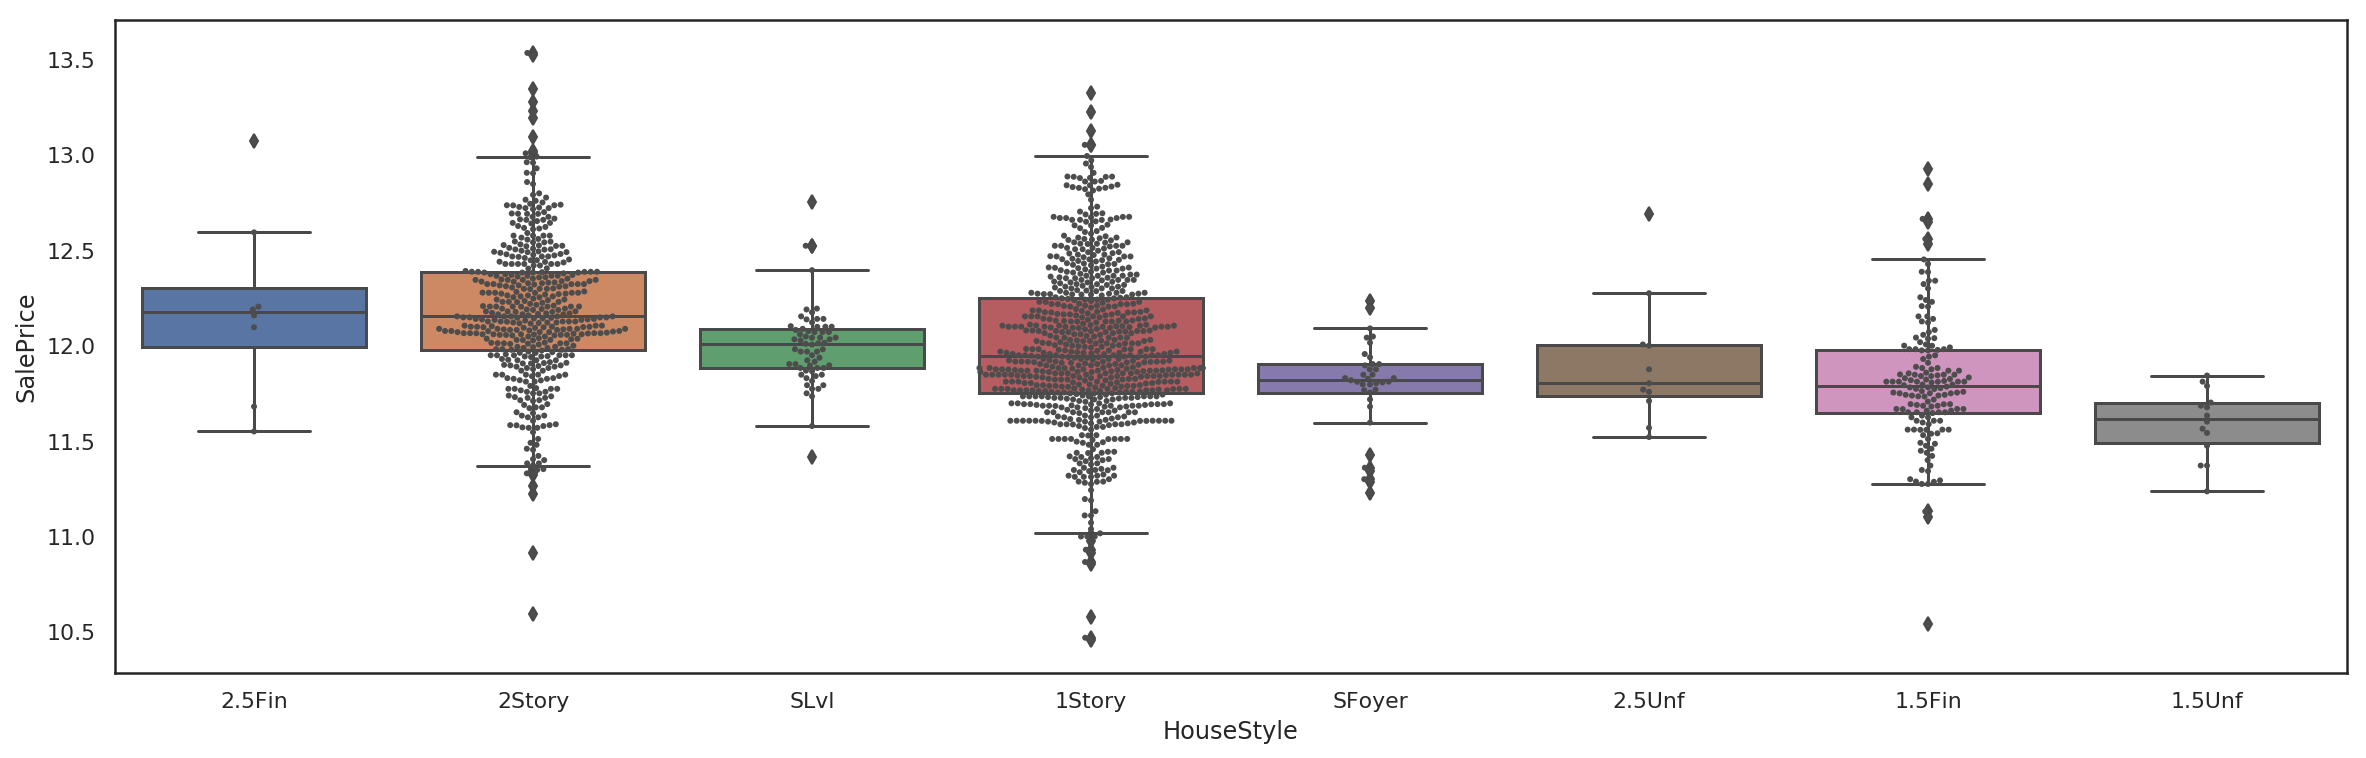

In [39]:
#HouseStyle vs Sale Price
def lr():    
    var = 'HouseStyle'
    data = pd.concat([house_final['SalePrice'], house_final[var]], axis=1)
    data = data.iloc[(-data.groupby(var)['SalePrice'].transform('median')).argsort()]
    f, ax = plt.subplots(figsize=(20, 6))
    fig = sns.boxplot(x=var, y="SalePrice", data=data)
    fig = sns.swarmplot(x=var, y="SalePrice", data=data, color='0.3', size = 3)
lr()

**Observation**<Br> 'HouseStyle' variable is an nominal categorical type variable and it describes relationship with 'SalePrice' variable.

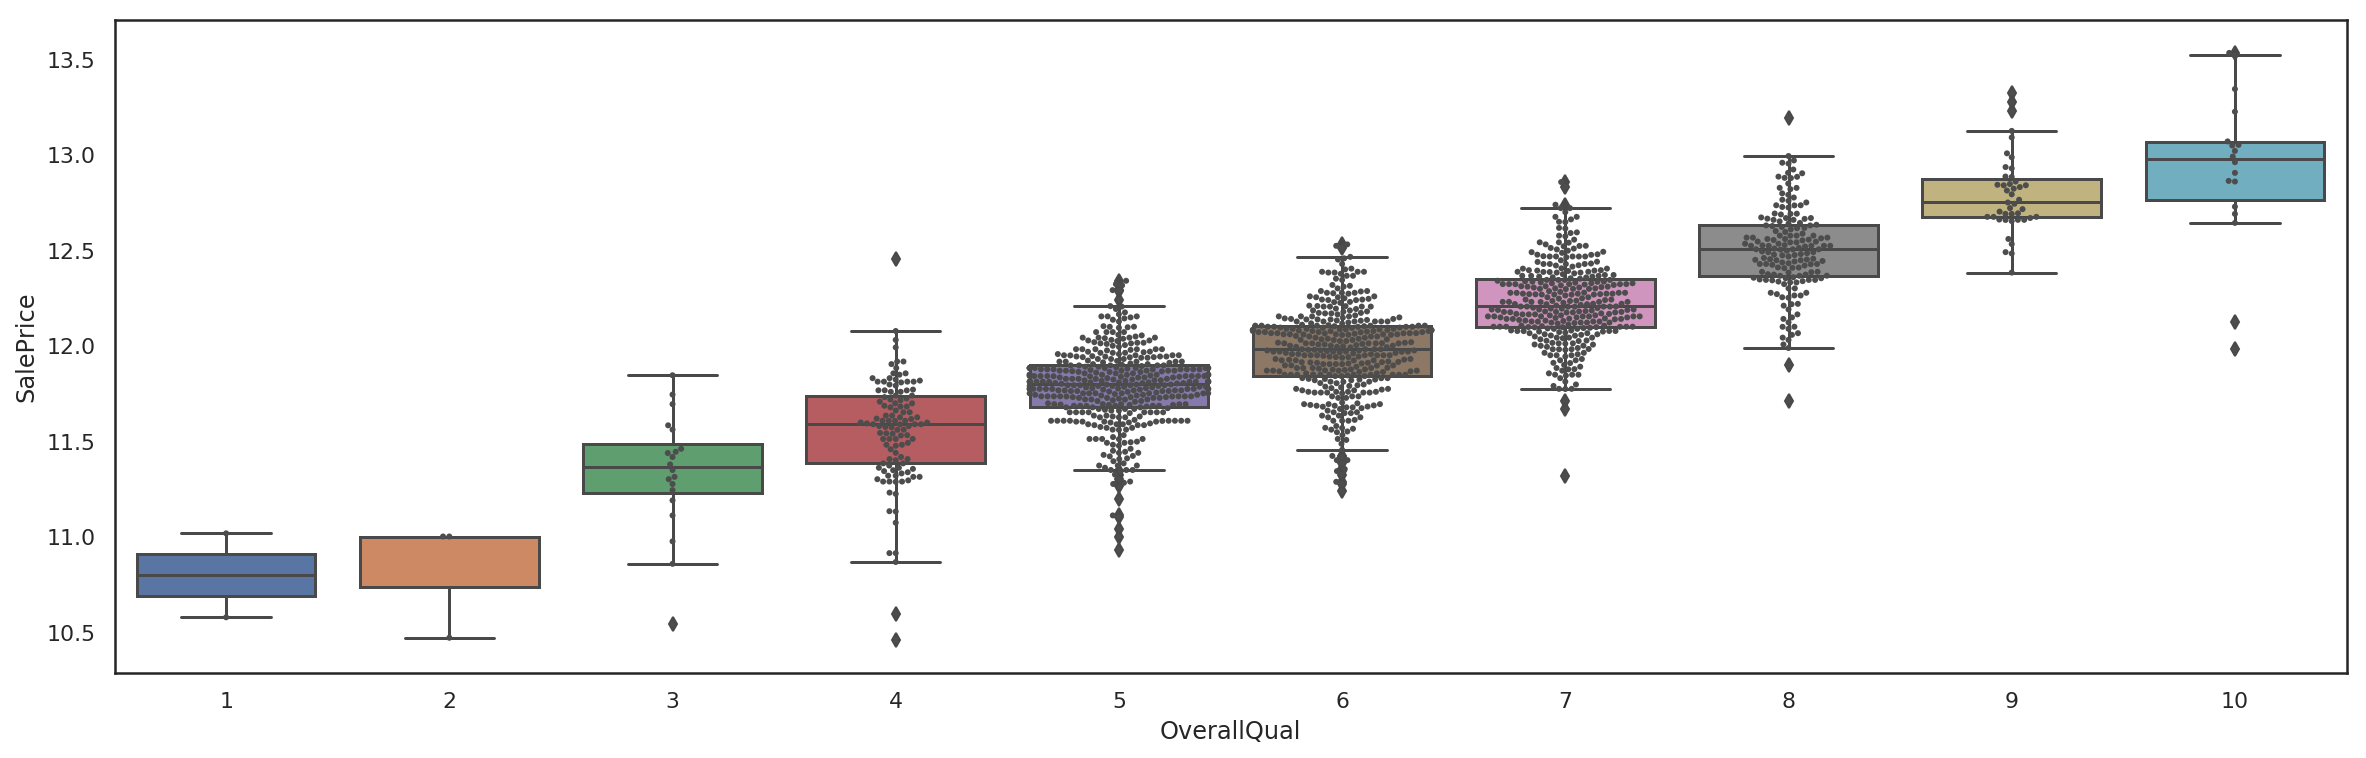

In [40]:
#OverallQual vs Sale Price
def lr():    
    var = 'OverallQual'
    data = pd.concat([house_final['SalePrice'], house_final[var]], axis=1)
    data = data.iloc[(-data.groupby(var)['SalePrice'].transform('median')).argsort()]
    f, ax = plt.subplots(figsize=(20, 6))
    fig = sns.boxplot(x=var, y="SalePrice", data=data)
    fig = sns.swarmplot(x=var, y="SalePrice", data=data, color='0.3', size = 3)
lr()

**Observation**<Br> 'OverallQual' is a numerical varibale but needs to be treated as categorical value as it provides ordinal sequence. This is quite expected that house price goes up with the overall quality of the house

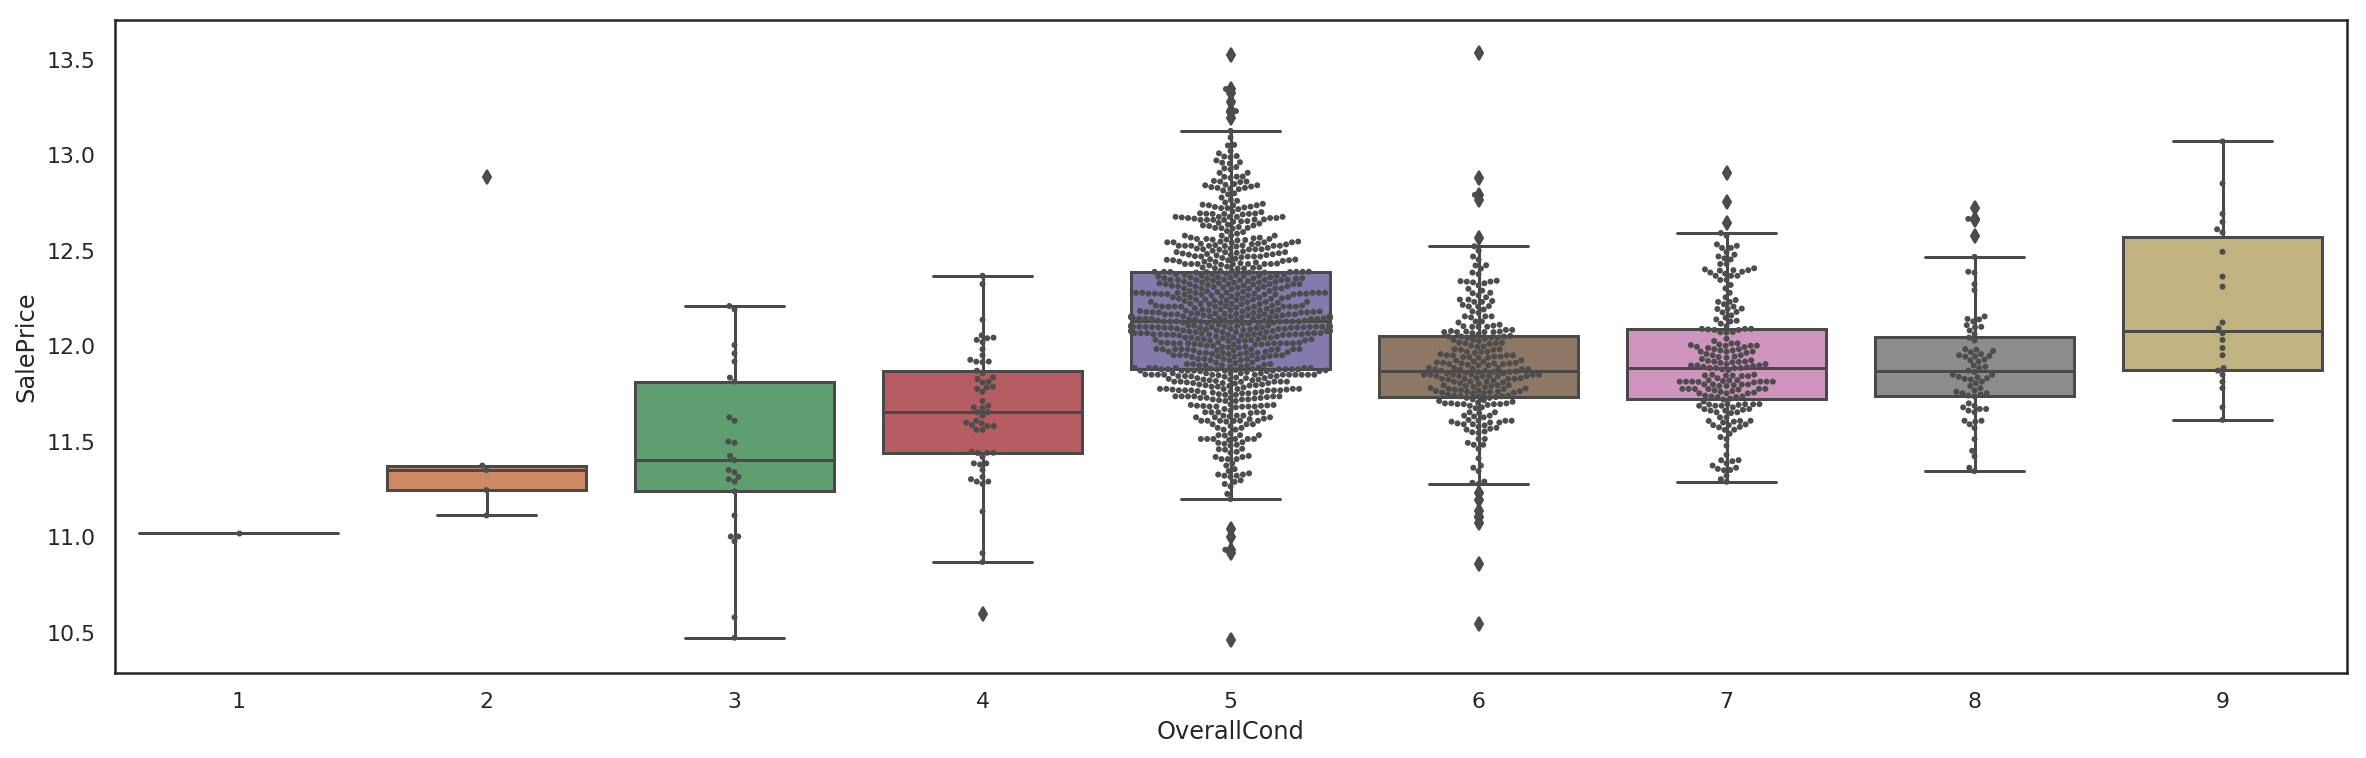

In [41]:
#OverallCond vs Sale Price
def lr():    
    var = 'OverallCond'
    data = pd.concat([house_final['SalePrice'], house_final[var]], axis=1)
    data = data.iloc[(-data.groupby(var)['SalePrice'].transform('median')).argsort()]
    f, ax = plt.subplots(figsize=(20, 6))
    fig = sns.boxplot(x=var, y="SalePrice", data=data)
    fig = sns.swarmplot(x=var, y="SalePrice", data=data, color='0.3', size = 3)
lr()

**Observation**<Br> 'OverallCond' is a numerical varibale but needs to be treated as categorical value as it provides ordinal sequence. This is quite expected that house price goes up with the overall condition of the house.

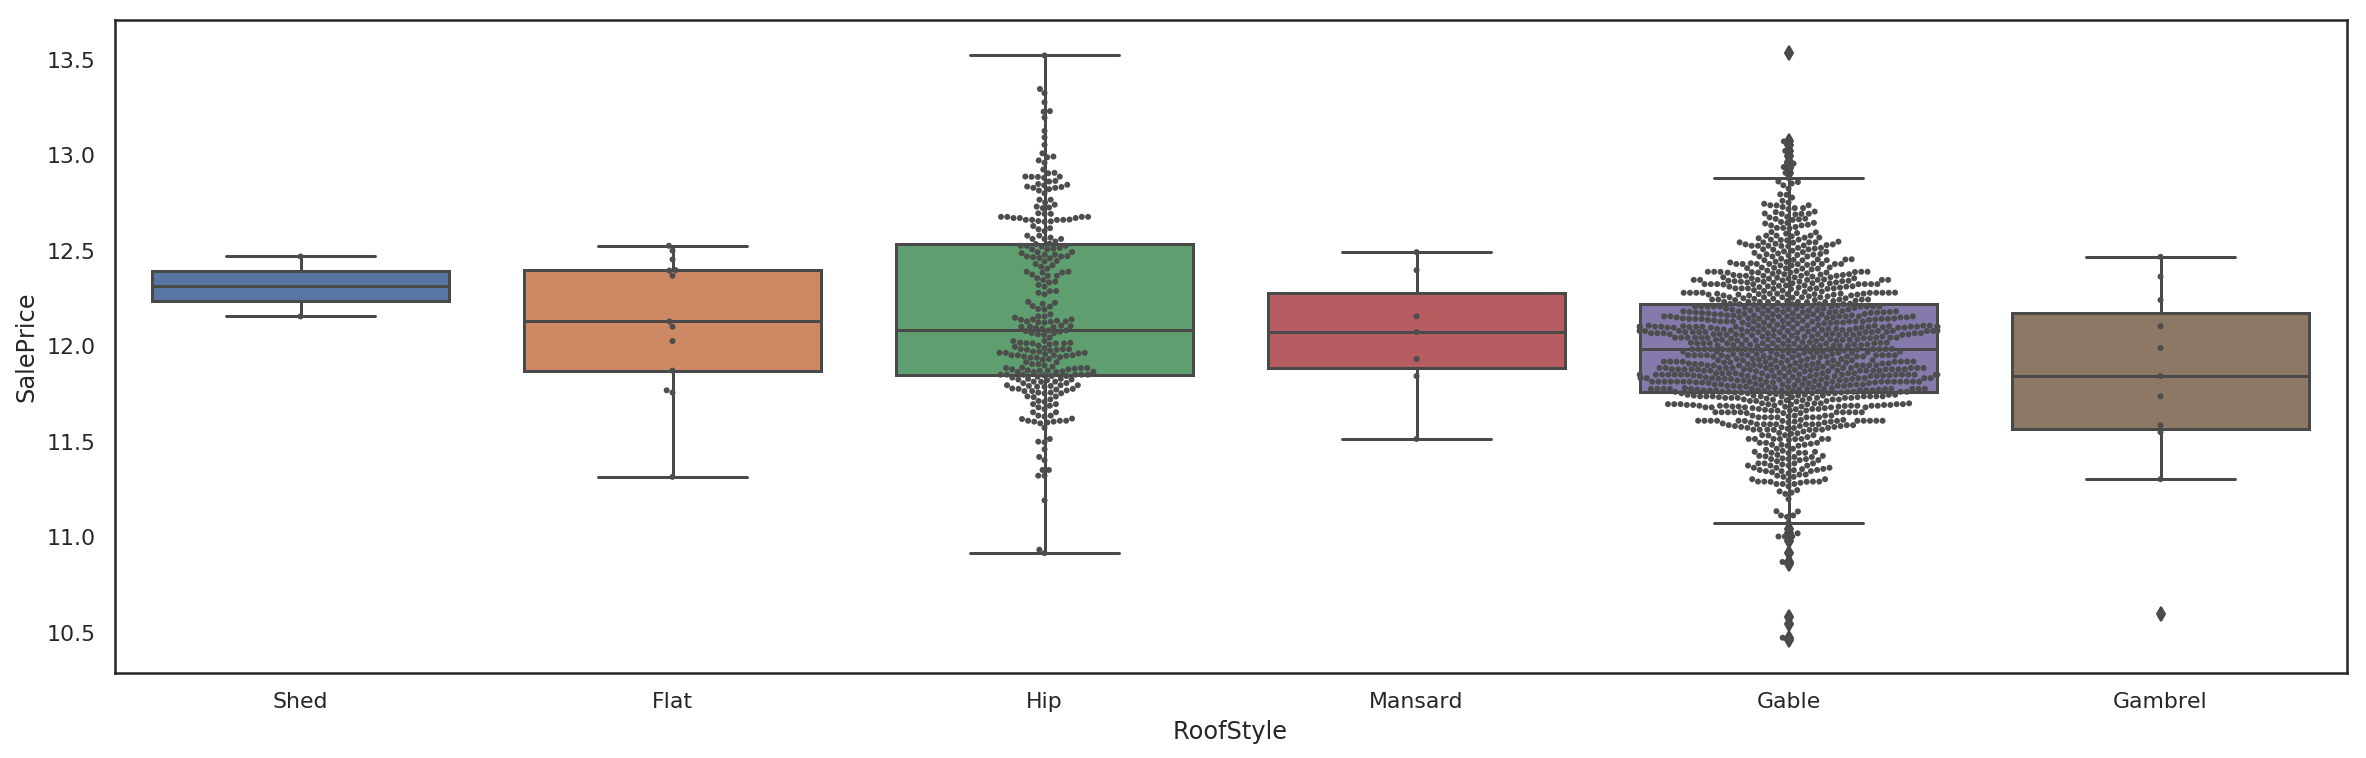

In [42]:
#RoofStyle vs Sale Price
def lr():    
    var = 'RoofStyle'
    data = pd.concat([house_final['SalePrice'], house_final[var]], axis=1)
    data = data.iloc[(-data.groupby(var)['SalePrice'].transform('median')).argsort()]
    f, ax = plt.subplots(figsize=(20, 6))
    fig = sns.boxplot(x=var, y="SalePrice", data=data)
    fig = sns.swarmplot(x=var, y="SalePrice", data=data, color='0.3', size = 3)
lr()

**Observation**<Br> 'RoofStyle' variable is an nominal categorical type variable and it describes relationship with 'SalePrice' variable. Median house prices for RoofStyle values are between the range of 12.1-12.4 with majority of values of Gable Style Roof.

In [43]:
#Droping 'RoofStyle' varibale from the dataset
house_final = house_final.drop(['RoofStyle'], axis=1)

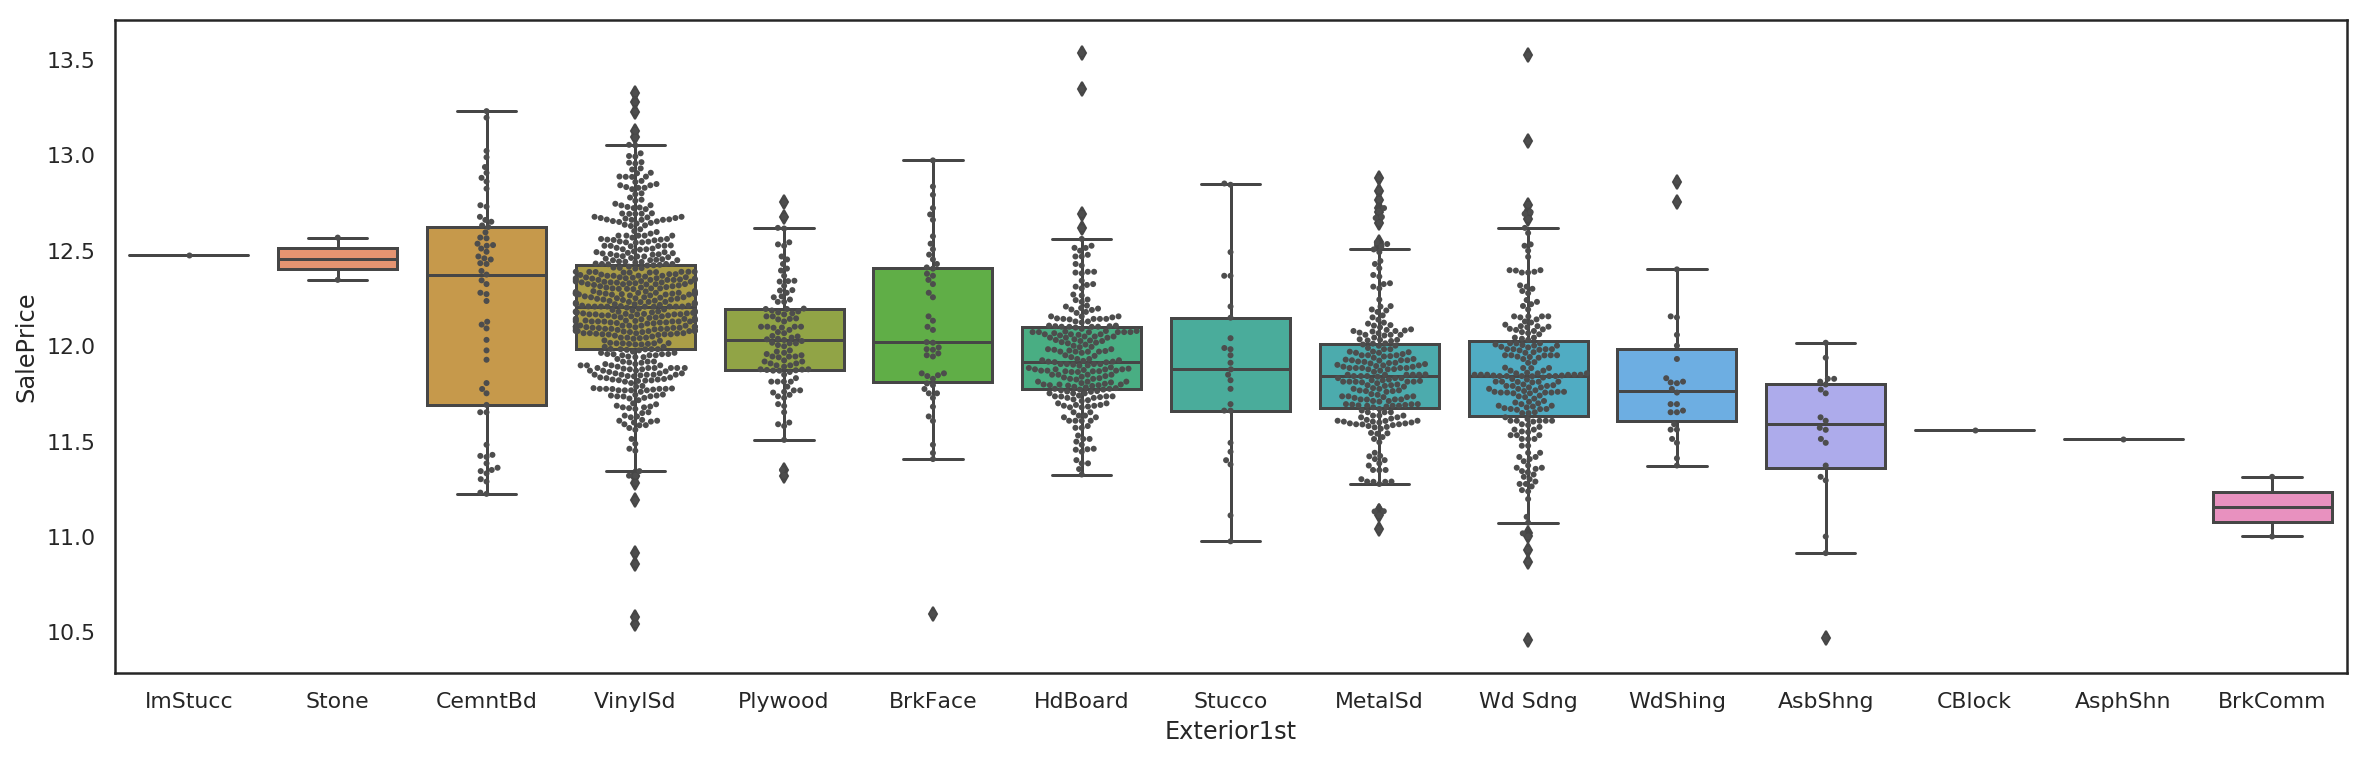

In [44]:
#Exterior1st vs Sale Price
def lr():    
    var = 'Exterior1st'
    data = pd.concat([house_final['SalePrice'], house_final[var]], axis=1)
    data = data.iloc[(-data.groupby(var)['SalePrice'].transform('median')).argsort()]
    f, ax = plt.subplots(figsize=(20, 6))
    fig = sns.boxplot(x=var, y="SalePrice", data=data)
    fig = sns.swarmplot(x=var, y="SalePrice", data=data, color='0.3', size = 3)
lr()

**Observation**<Br> 'Exterior1st' variable is an nominal categorical type variable and it describes relationship with 'SalePrice' variable.

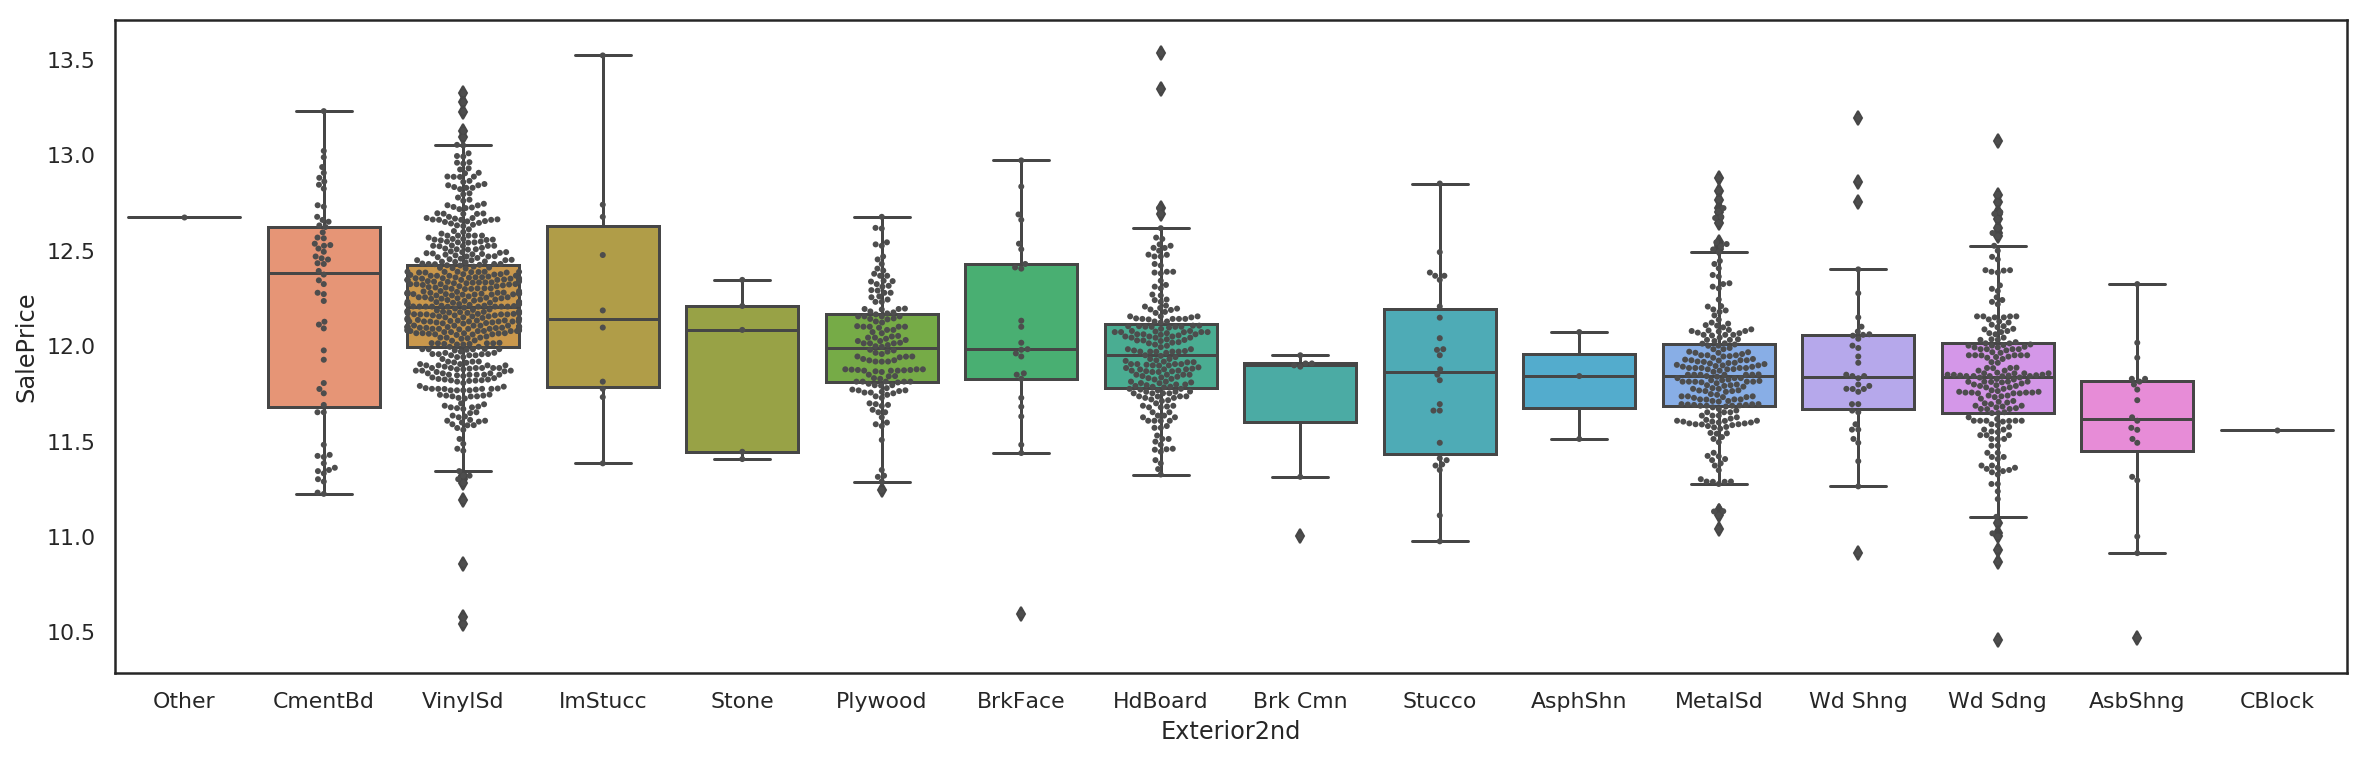

In [45]:
#Exterior2nd vs Sale Price
def lr():    
    var = 'Exterior2nd'
    data = pd.concat([house_final['SalePrice'], house_final[var]], axis=1)
    data = data.iloc[(-data.groupby(var)['SalePrice'].transform('median')).argsort()]
    f, ax = plt.subplots(figsize=(20, 6))
    fig = sns.boxplot(x=var, y="SalePrice", data=data)
    fig = sns.swarmplot(x=var, y="SalePrice", data=data, color='0.3', size = 3)
lr()

**Observation**<Br> 'Exterior2nd' variable is an nominal categorical type variable and it describes relationship with 'SalePrice' variable.

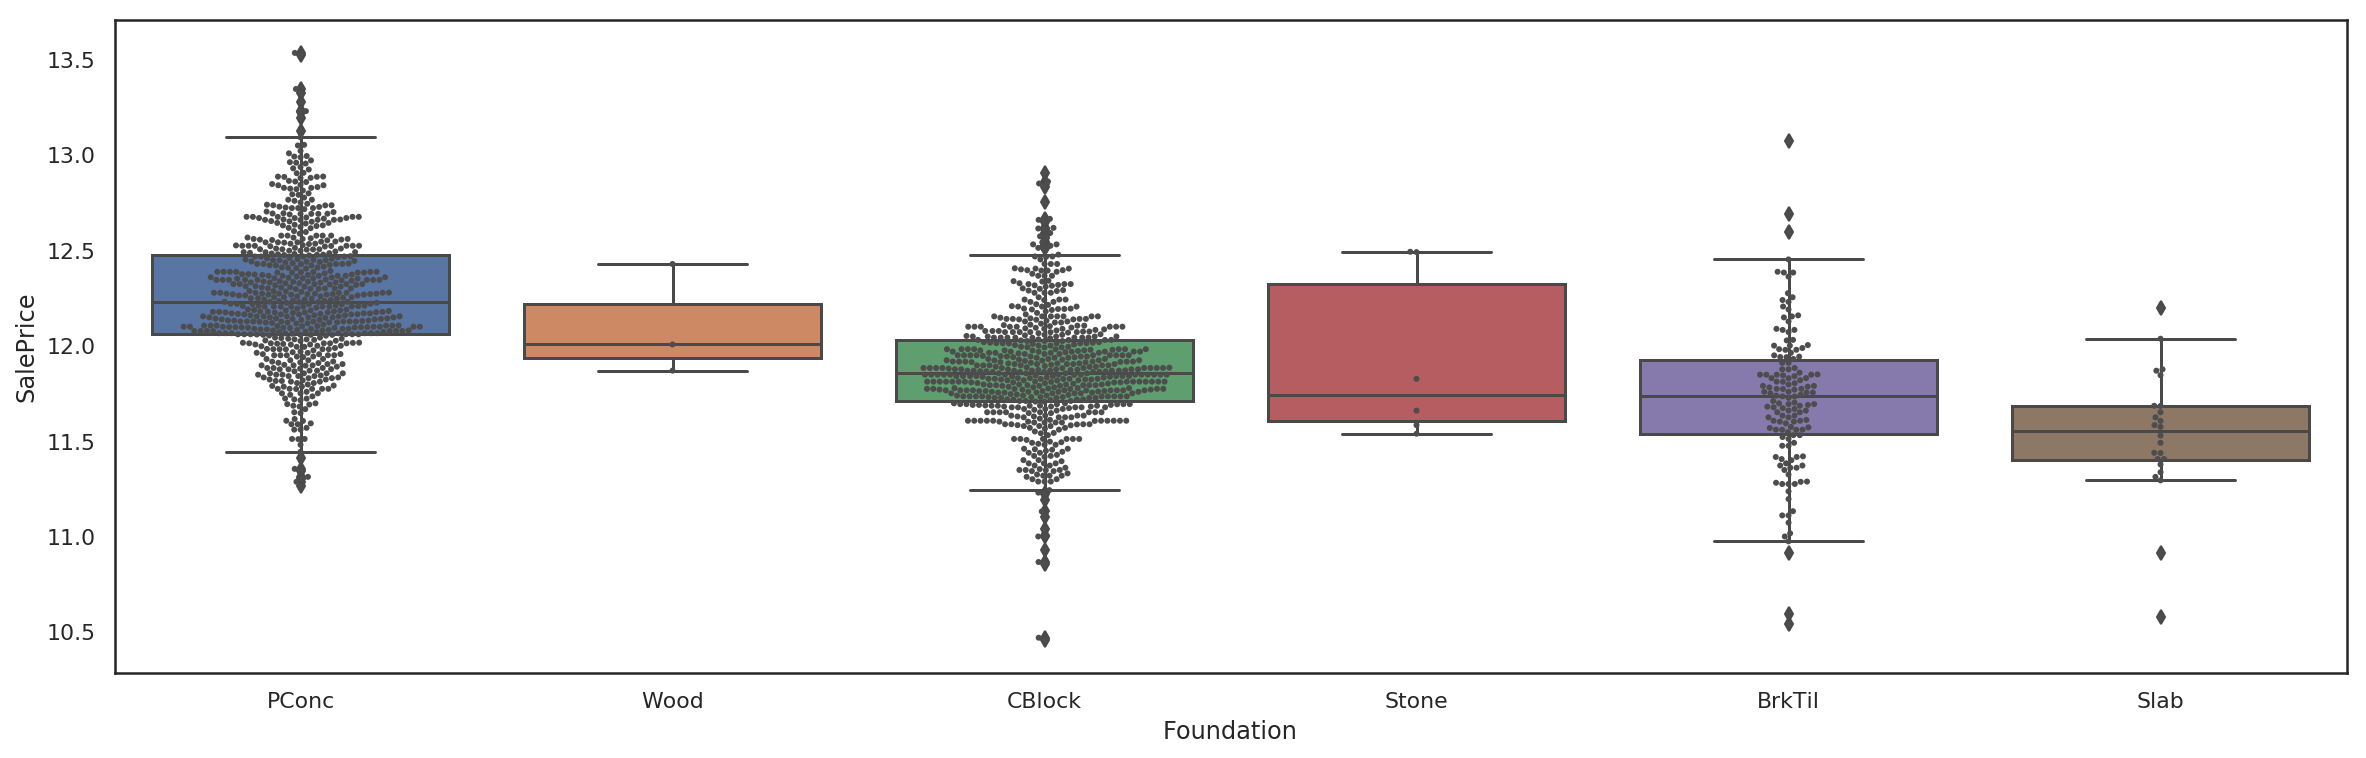

In [46]:
#Foundation vs Sale Price
def lr():    
    var = 'Foundation'
    data = pd.concat([house_final['SalePrice'], house_final[var]], axis=1)
    data = data.iloc[(-data.groupby(var)['SalePrice'].transform('median')).argsort()]
    f, ax = plt.subplots(figsize=(20, 6))
    fig = sns.boxplot(x=var, y="SalePrice", data=data)
    fig = sns.swarmplot(x=var, y="SalePrice", data=data, color='0.3', size = 3)
lr()

**Observation**<Br> 'Foundation' variable is an nominal categorical type variable and it describes relationship with 'SalePrice' variable.

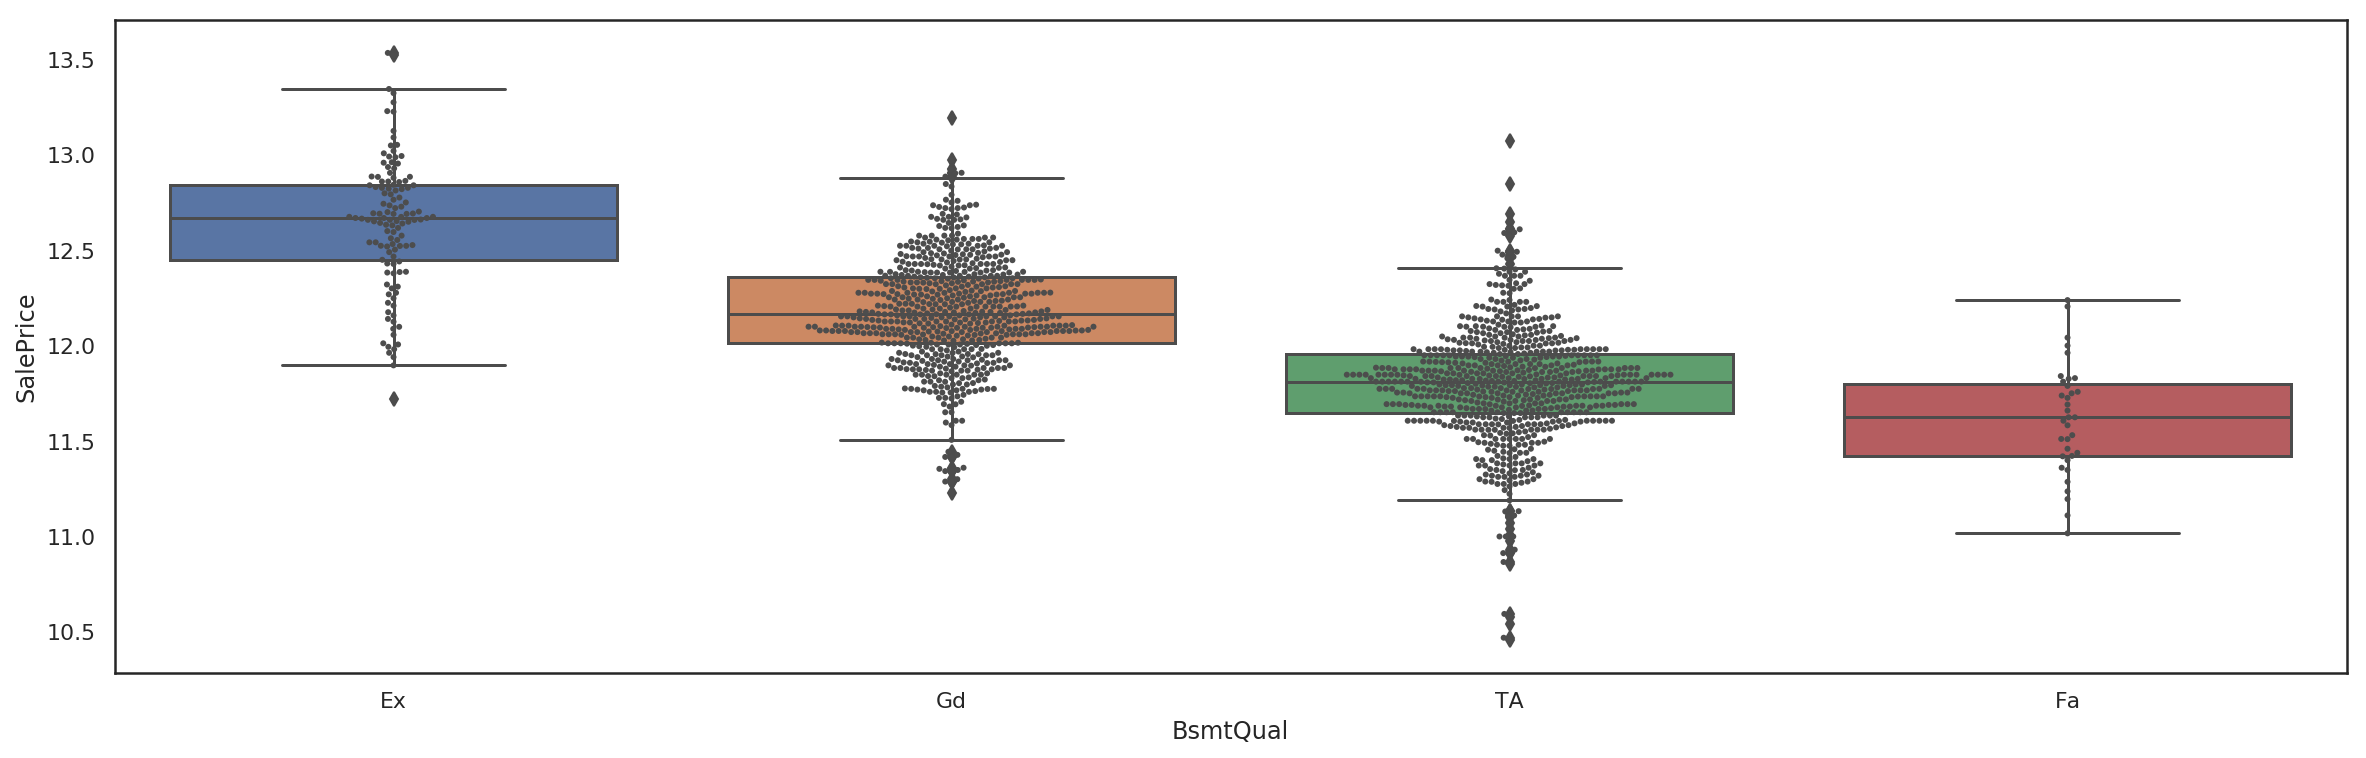

In [47]:
#BsmtQual vs Sale Price
def lr():    
    var = 'BsmtQual'
    data = pd.concat([house_final['SalePrice'], house_final[var]], axis=1)
    data = data.iloc[(-data.groupby(var)['SalePrice'].transform('median')).argsort()]
    f, ax = plt.subplots(figsize=(20, 6))
    fig = sns.boxplot(x=var, y="SalePrice", data=data)
    fig = sns.swarmplot(x=var, y="SalePrice", data=data, color='0.3', size = 3)
lr()

**Observation**<Br> 'BsmtQual' variable is an ordinal categorical type variable and it describes relationship with 'SalePrice' variable. The House Price increases from BsmtQual: FA- fair to BsmtQual: Ex- Excellent (Gd- Good, TA-Typical/Average)

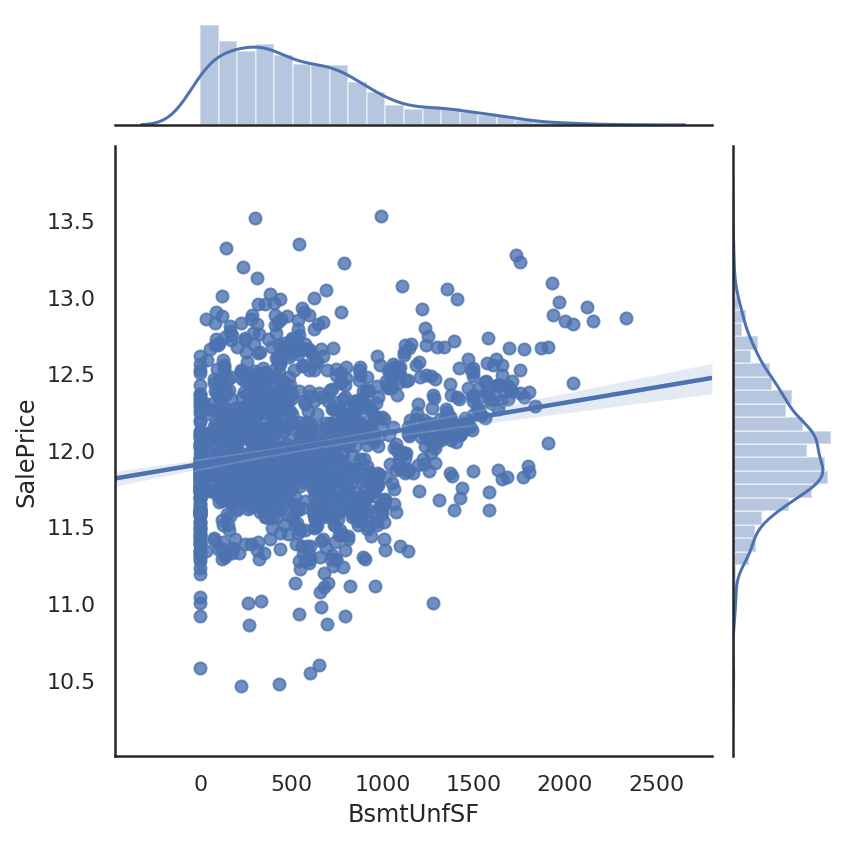

In [48]:
# BsmtUnfSF vs Sale Price
def lr():    
    var = 'BsmtUnfSF'
    data = pd.concat([house_final['SalePrice'], house_final[var]], axis=1)
    sns.jointplot(x=var, y="SalePrice", data=data,kind='reg')
lr()

**Observation**<Br> 'BsmtUnfSF' variable is a numerical type variable and it describes relationship with 'SalePrice' variable. However correlation between 'LotArea and 'SalePrice' is very weak 0.22.

In [49]:
#Droping 'BsmtUnfSF' varibale from the dataset
house_final = house_final.drop(['BsmtUnfSF'], axis=1)

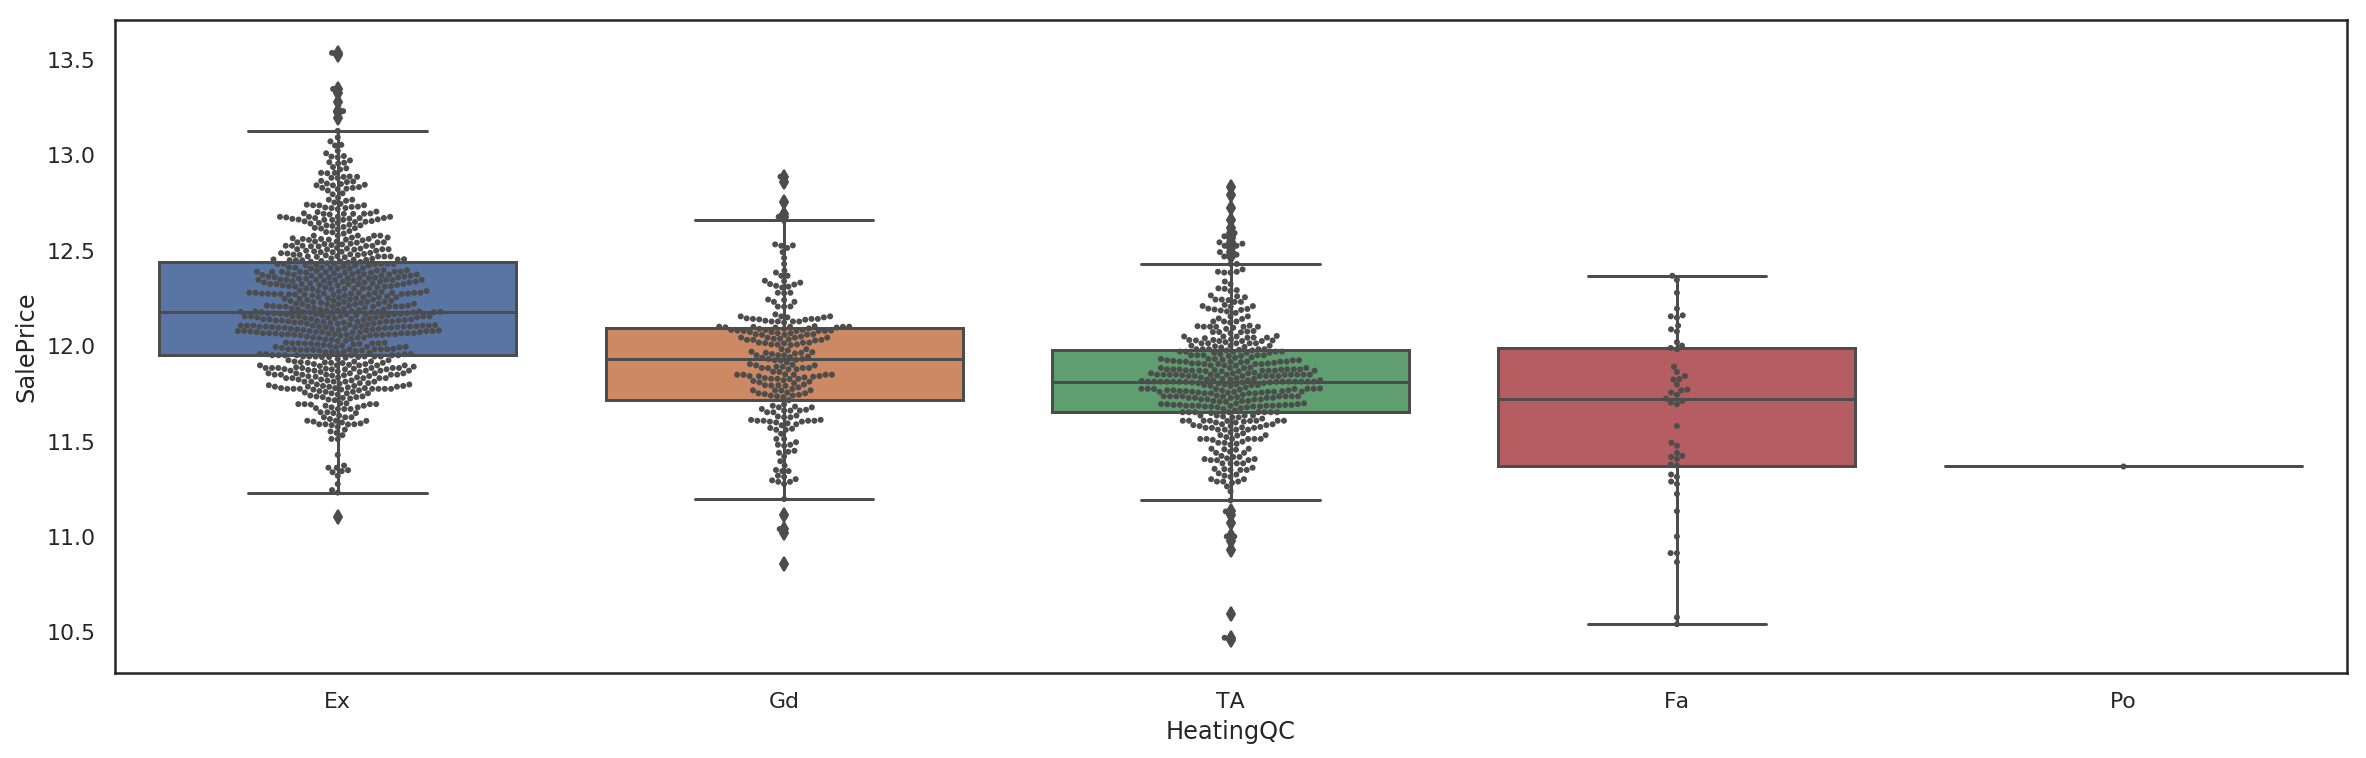

In [50]:
#HeatingQC vs Sale Price
def lr():    
    var = 'HeatingQC'
    data = pd.concat([house_final['SalePrice'], house_final[var]], axis=1)
    data = data.iloc[(-data.groupby(var)['SalePrice'].transform('median')).argsort()]
    f, ax = plt.subplots(figsize=(20, 6))
    fig = sns.boxplot(x=var, y="SalePrice", data=data)
    fig = sns.swarmplot(x=var, y="SalePrice", data=data, color='0.3', size = 3)
lr()

**Observation**<Br> 'HeatingQC' variable is an ordinal categorical type variable and it describes relationship with 'SalePrice' variable. The House Price increases from HeatingQC: Po-Poor to HeatingQC: Ex- Excellent (Gd- Good, TA-Typical/Average,Fa-Fair)

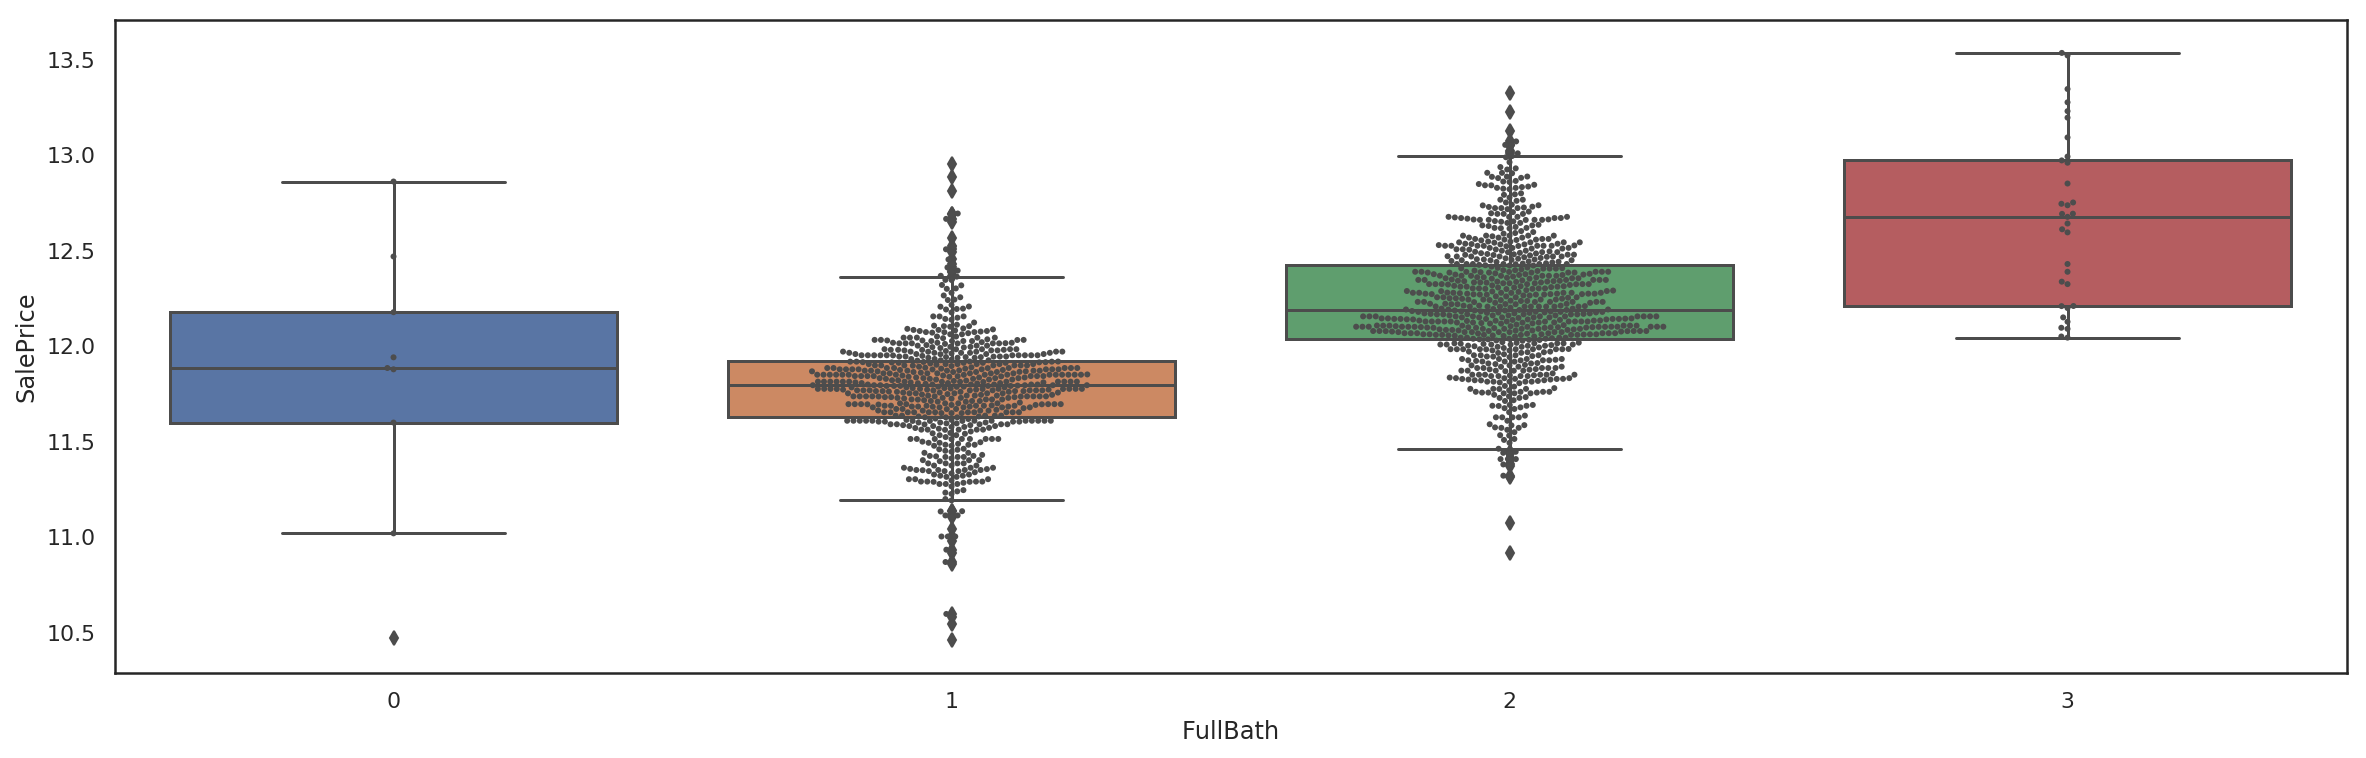

In [51]:
#FullBath vs Sale Price
def lr():    
    var = 'FullBath'
    data = pd.concat([house_final['SalePrice'], house_final[var]], axis=1)
    data = data.iloc[(-data.groupby(var)['SalePrice'].transform('median')).argsort()]
    f, ax = plt.subplots(figsize=(20, 6))
    fig = sns.boxplot(x=var, y="SalePrice", data=data)
    fig = sns.swarmplot(x=var, y="SalePrice", data=data, color='0.3', size = 3)
lr()

**Observation**<Br> 'FullBath' is a numerical varibale but needs to be treated as categorical value as it provides ordinal sequence. This is quite expected that house price goes up with the number of Full Bathrooms in the house.

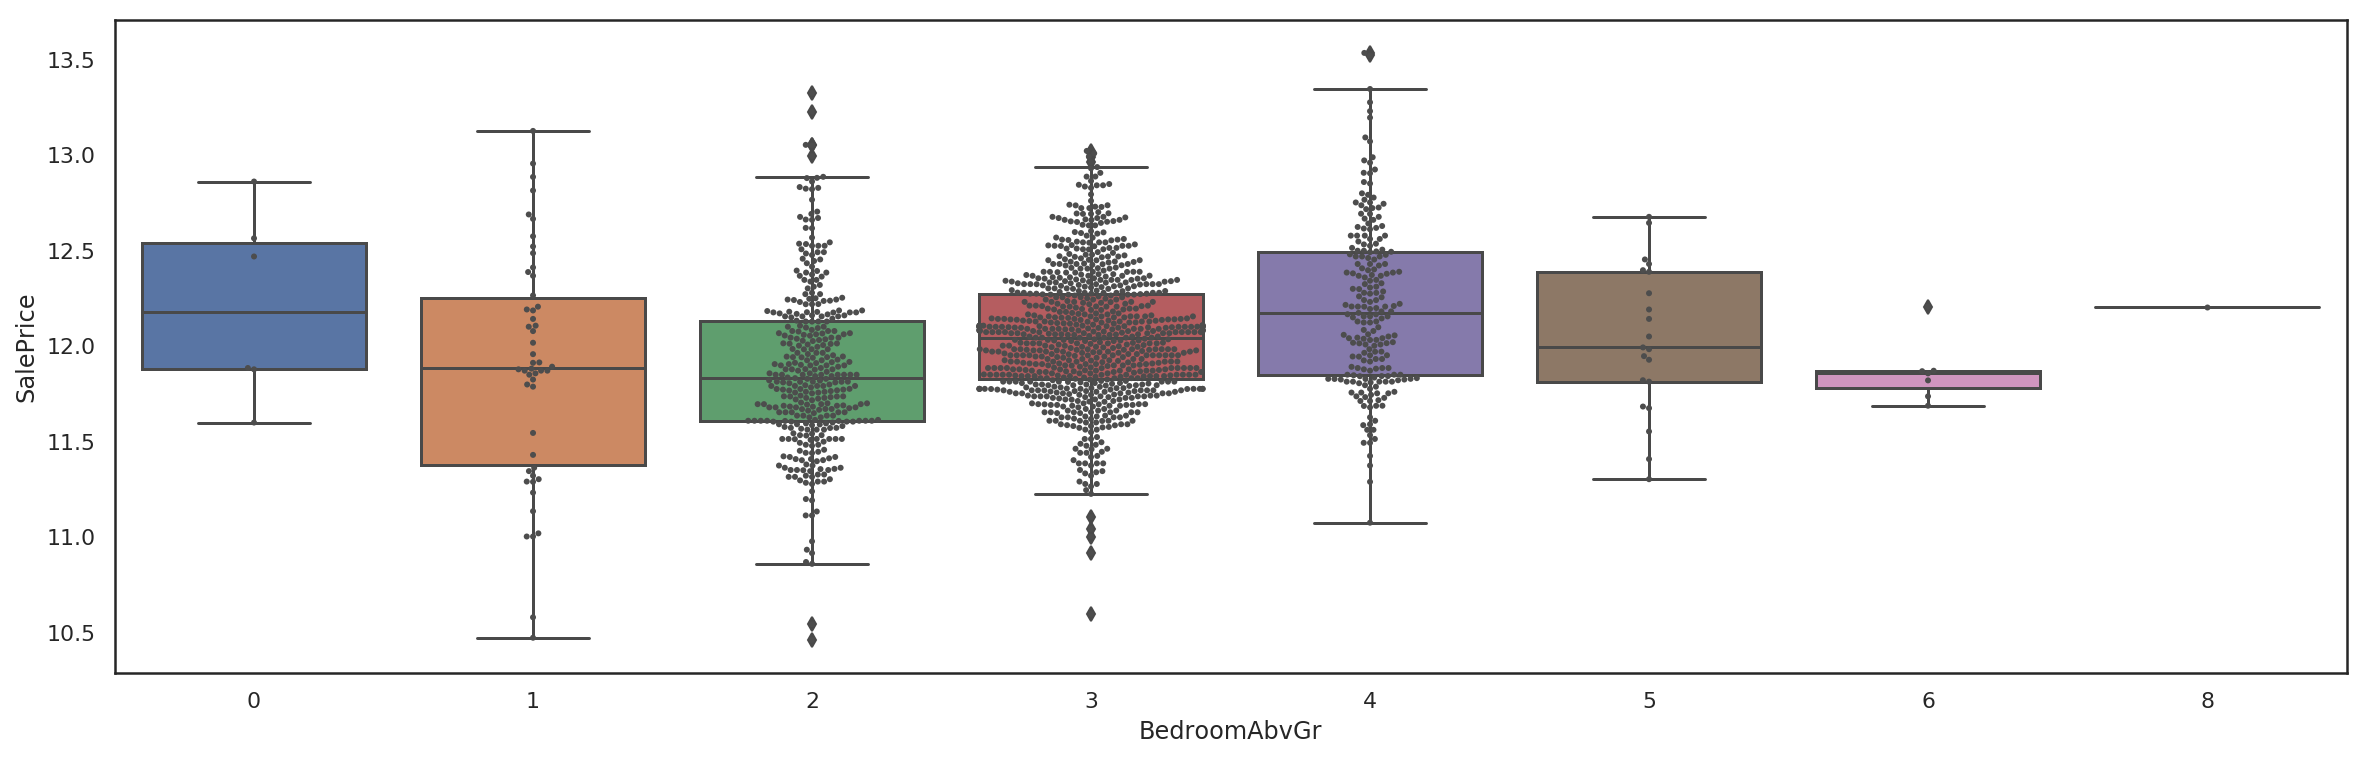

In [52]:
#BedroomAbvGr vs Sale Price
def lr():    
    var = 'BedroomAbvGr'
    data = pd.concat([house_final['SalePrice'], house_final[var]], axis=1)
    data = data.iloc[(-data.groupby(var)['SalePrice'].transform('median')).argsort()]
    f, ax = plt.subplots(figsize=(20, 6))
    fig = sns.boxplot(x=var, y="SalePrice", data=data)
    fig = sns.swarmplot(x=var, y="SalePrice", data=data, color='0.3', size = 3)
lr()

**Observation**<Br> 'BedroomAbvGr' is a numerical varibale but needs to be treated as categorical value as it provides ordinal sequence. This is quite expected that house price goes up with the number of bedrooms in the house. however average house with no bendroom is priced more than aevrage houses with 1,2,3 bedrooms. houses with bedrooms 5,6 have average price lower than houses with 3,4 bedrooms. 

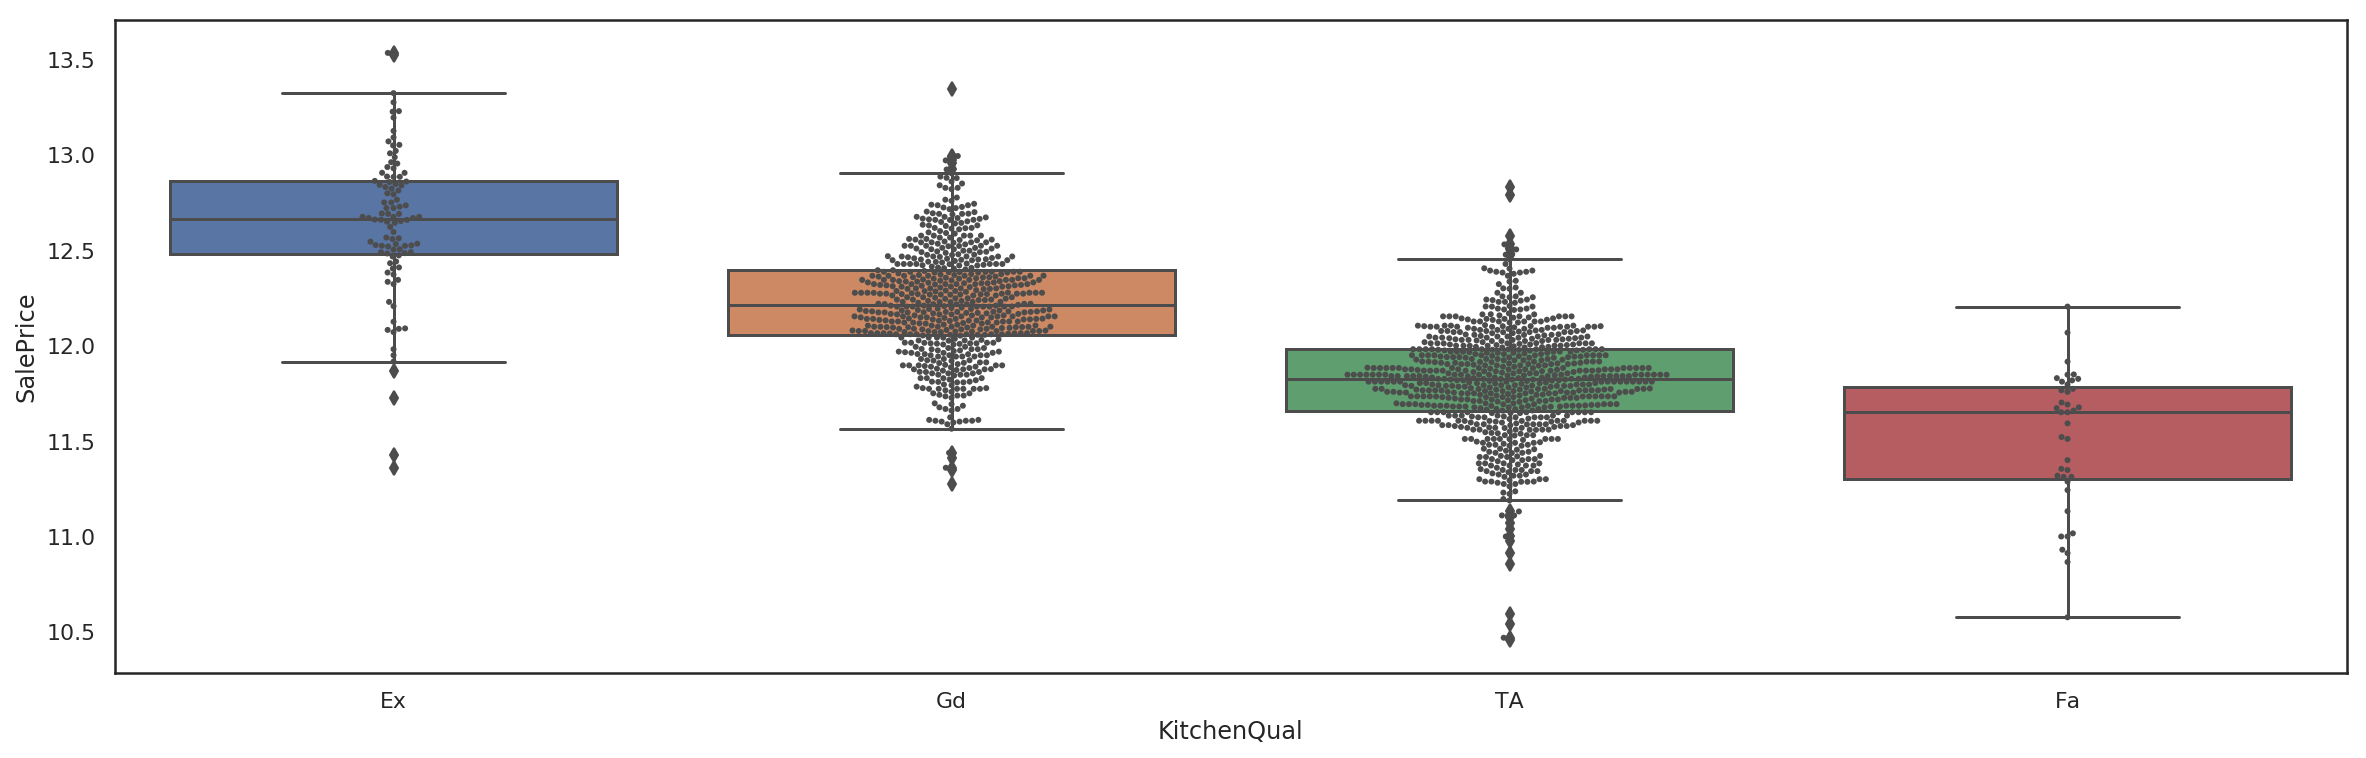

In [53]:
#KitchenQual vs Sale Price
def lr():    
    var = 'KitchenQual'
    data = pd.concat([house_final['SalePrice'], house_final[var]], axis=1)
    data = data.iloc[(-data.groupby(var)['SalePrice'].transform('median')).argsort()]
    f, ax = plt.subplots(figsize=(20, 6))
    fig = sns.boxplot(x=var, y="SalePrice", data=data)
    fig = sns.swarmplot(x=var, y="SalePrice", data=data, color='0.3', size = 3)
lr()

**Observation**<Br> 'KitchenQual' variable is an ordinal categorical type variable and it describes relationship with 'SalePrice' variable. The House Price increases from BsmtQual: FA- fair to BsmtQual: Ex- Excellent (Gd- Good, TA-Typical/Average)

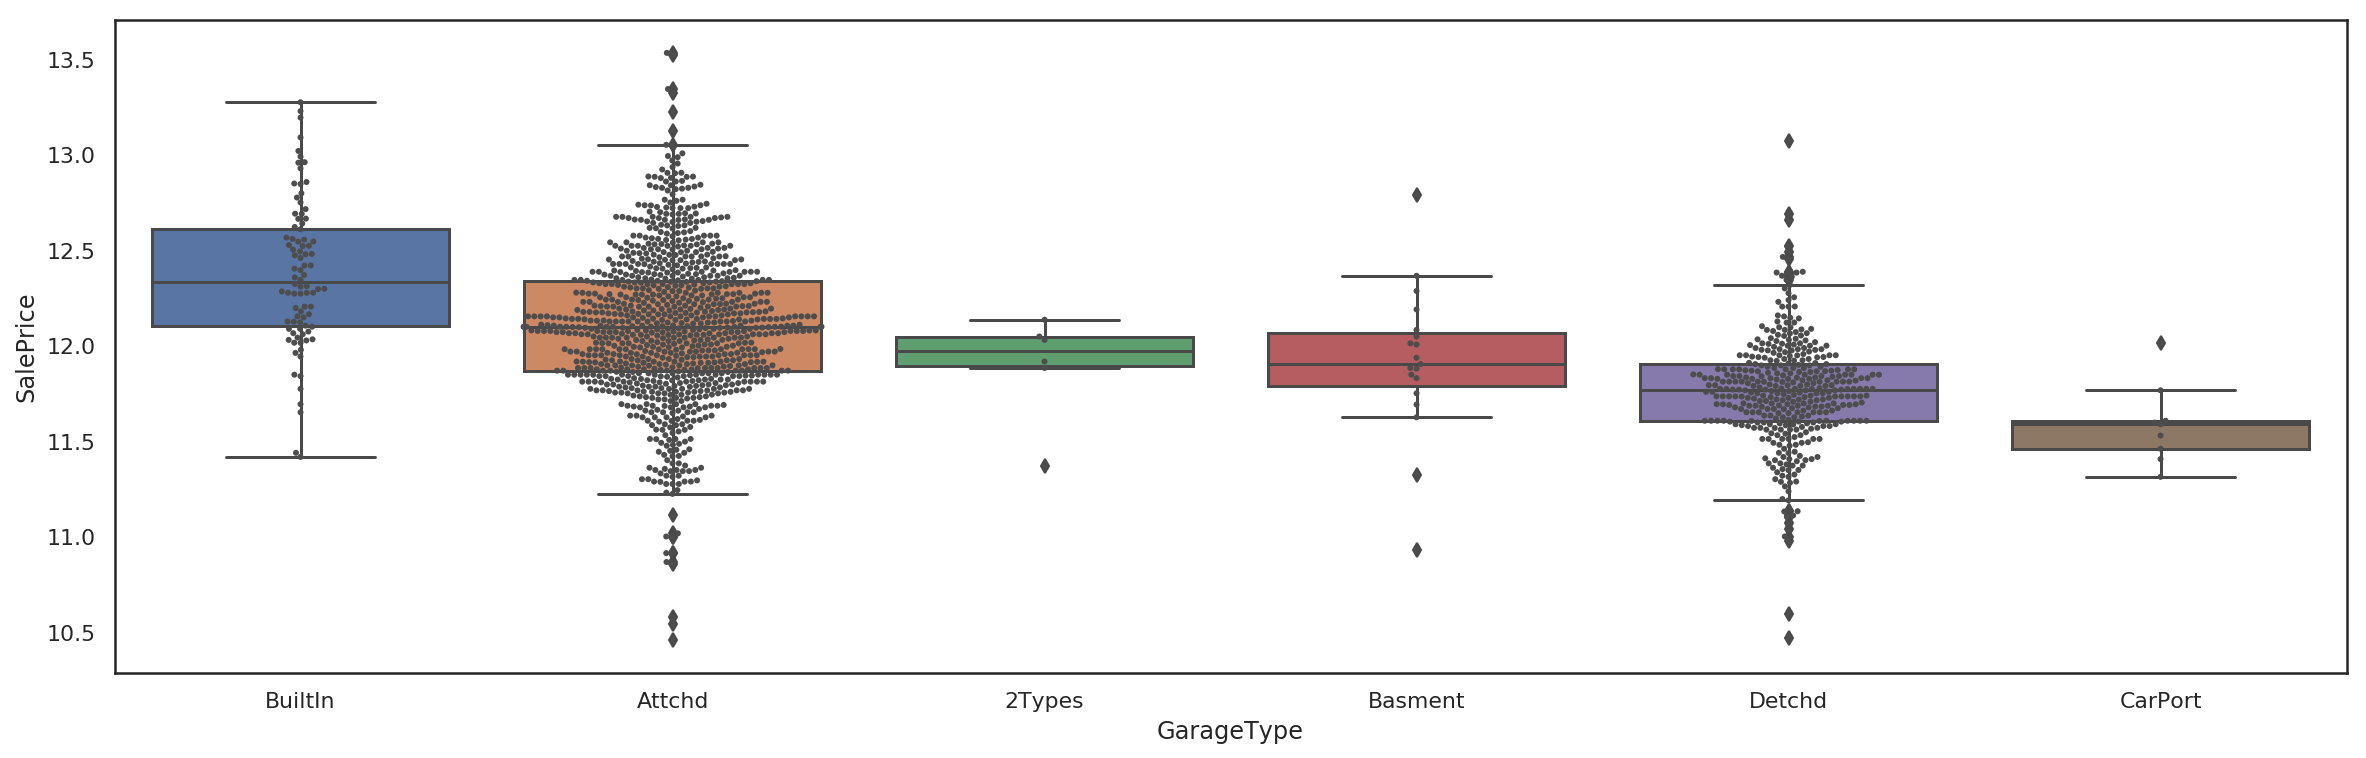

In [54]:
#GarageType vs Sale Price
def lr():    
    var = 'GarageType'
    data = pd.concat([house_final['SalePrice'], house_final[var]], axis=1)
    data = data.iloc[(-data.groupby(var)['SalePrice'].transform('median')).argsort()]
    f, ax = plt.subplots(figsize=(20, 6))
    fig = sns.boxplot(x=var, y="SalePrice", data=data)
    fig = sns.swarmplot(x=var, y="SalePrice", data=data, color='0.3', size = 3)
lr()

**Observation**<br>'GarageType' is a categorical varibale and has a relationshiop with SalePrice variable

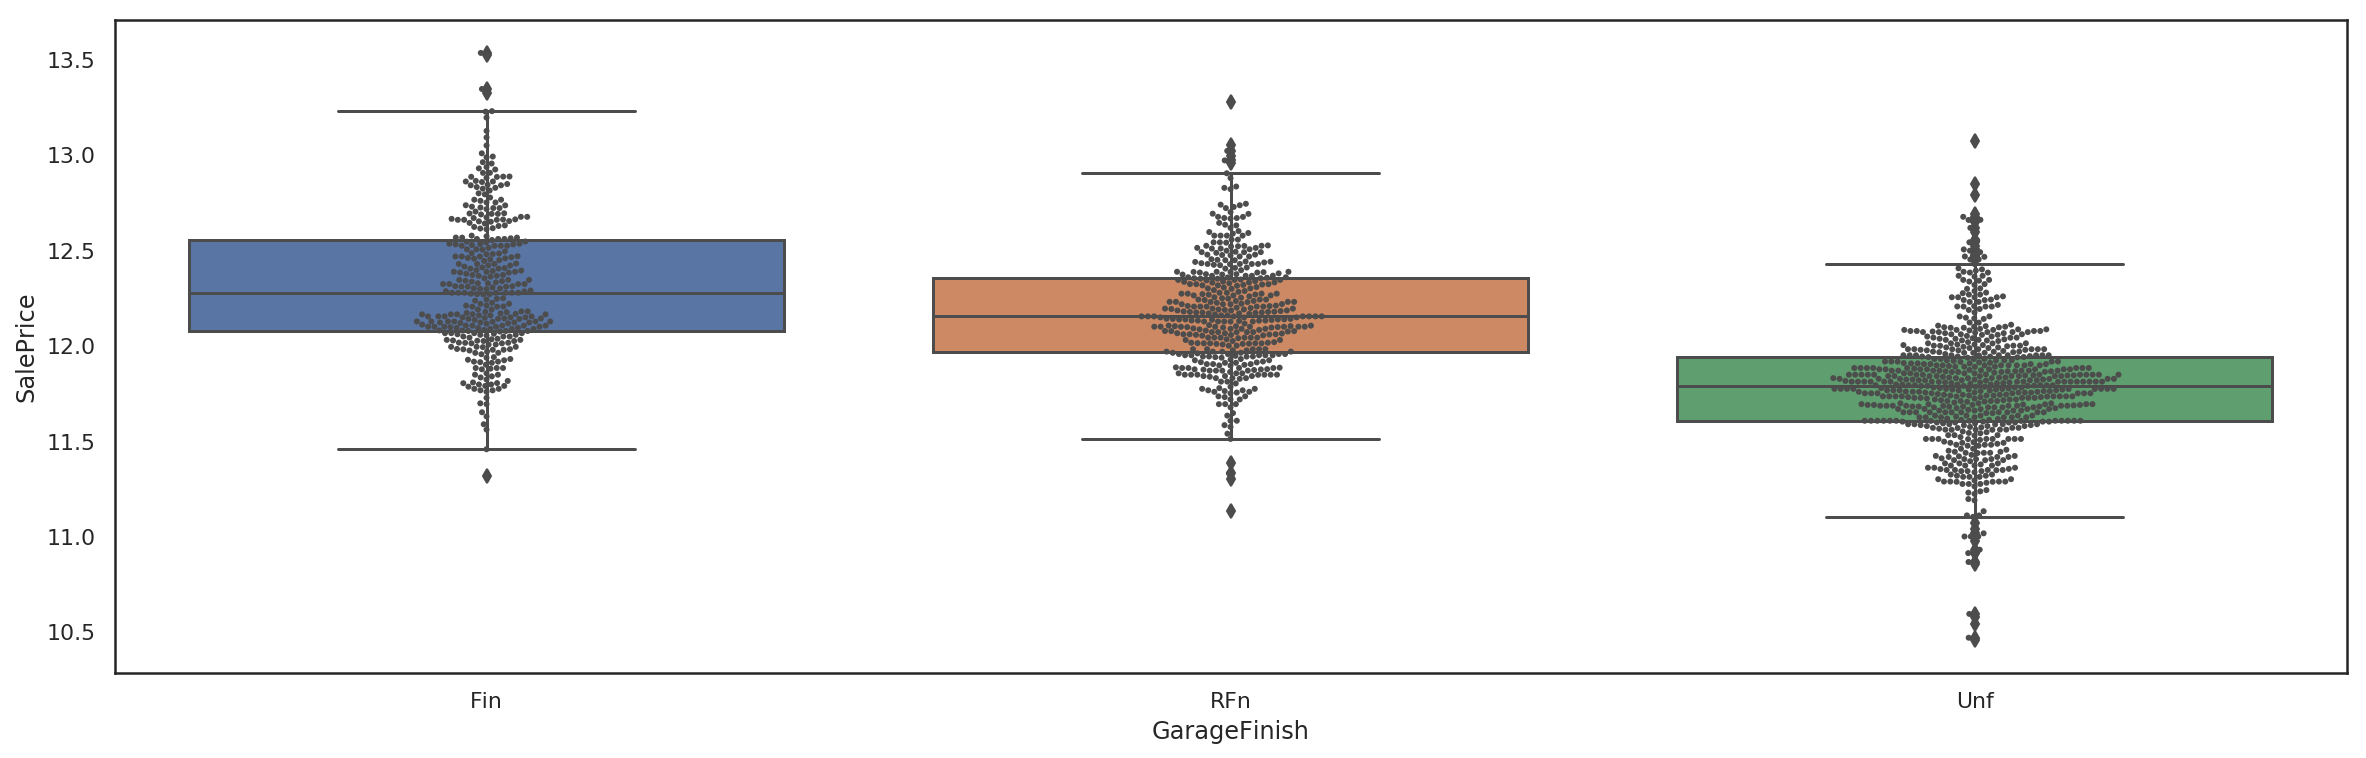

In [55]:
#GarageFinish vs Sale Price
def lr():    
    var = 'GarageFinish'
    data = pd.concat([house_final['SalePrice'], house_final[var]], axis=1)
    data = data.iloc[(-data.groupby(var)['SalePrice'].transform('median')).argsort()]
    f, ax = plt.subplots(figsize=(20, 6))
    fig = sns.boxplot(x=var, y="SalePrice", data=data)
    fig = sns.swarmplot(x=var, y="SalePrice", data=data, color='0.3', size = 3)
lr()

**Observation**<br>'GarageFinish' is a categorical varibale and has a relationshiop with SalePrice variable

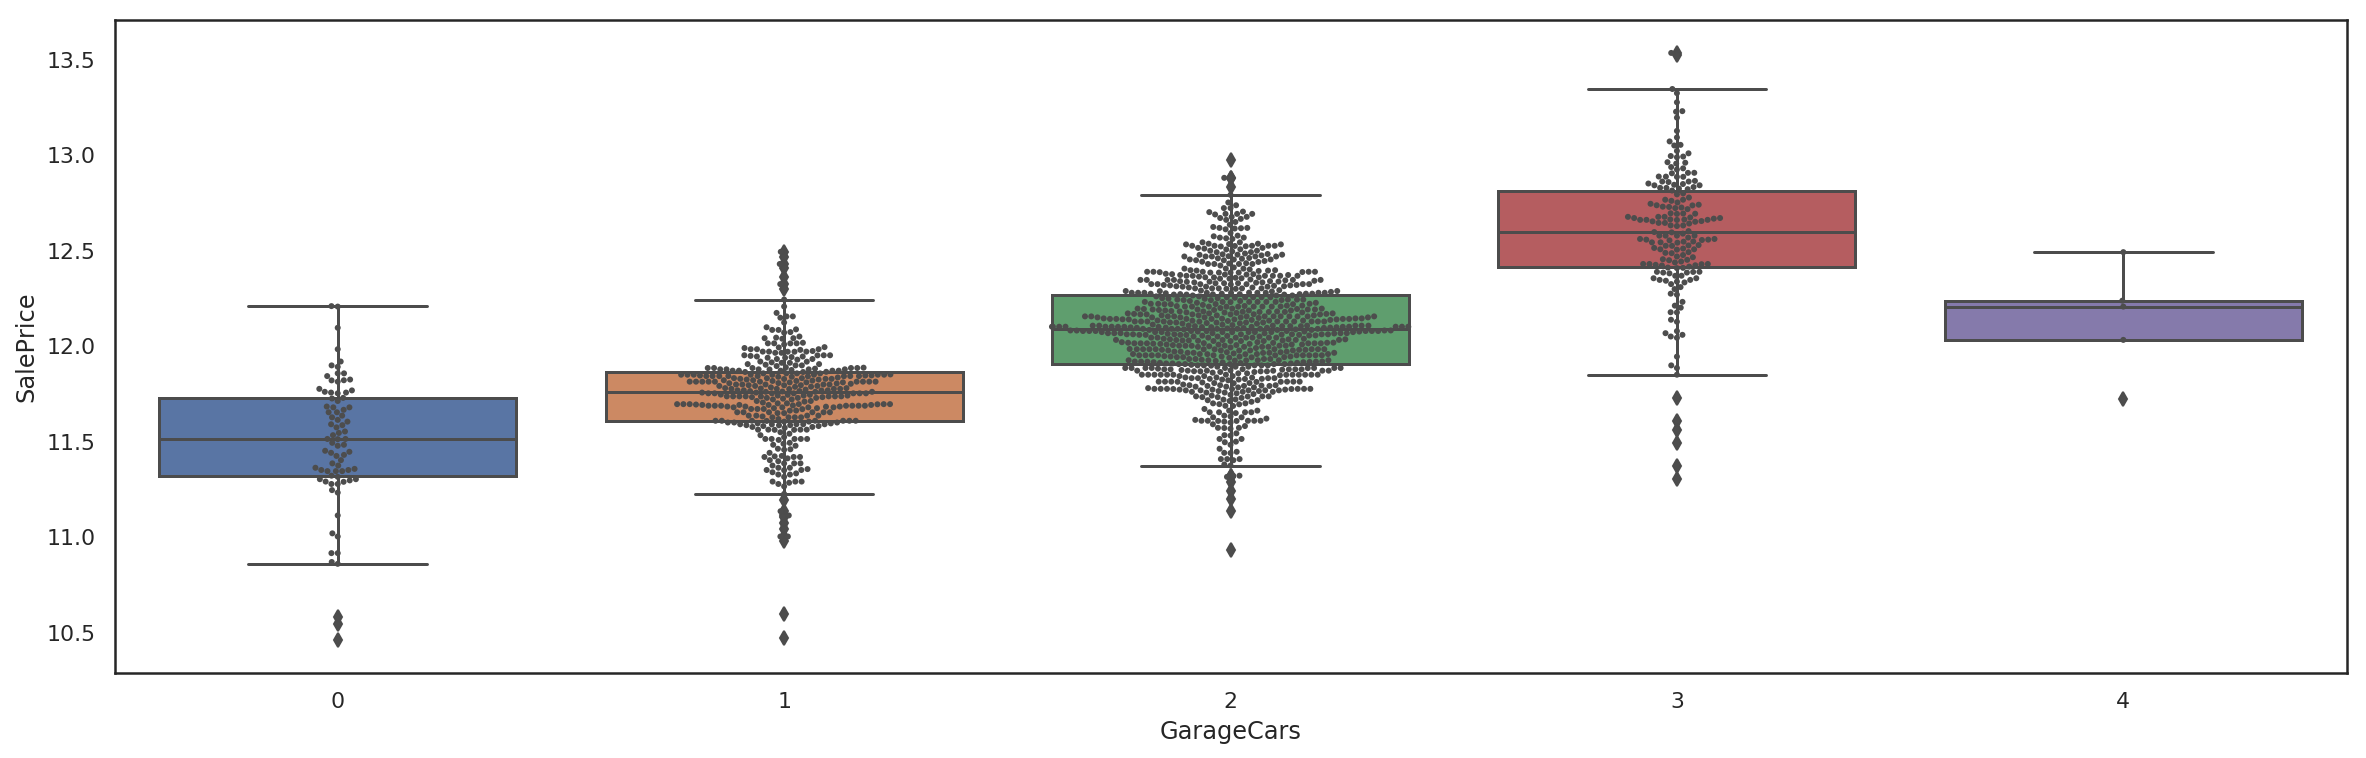

In [56]:
#GarageCars vs Sale Price
def lr():    
    var = 'GarageCars'
    data = pd.concat([house_final['SalePrice'], house_final[var]], axis=1)
    data = data.iloc[(-data.groupby(var)['SalePrice'].transform('median')).argsort()]
    f, ax = plt.subplots(figsize=(20, 6))
    fig = sns.boxplot(x=var, y="SalePrice", data=data)
    fig = sns.swarmplot(x=var, y="SalePrice", data=data, color='0.3', size = 3)
lr()

**Observation**<br>'GarageFinish' is a categorical varibale and has a relationshiop with SalePrice variable. Ideally Houses with 4 car parkings should be of higher SalePrices.

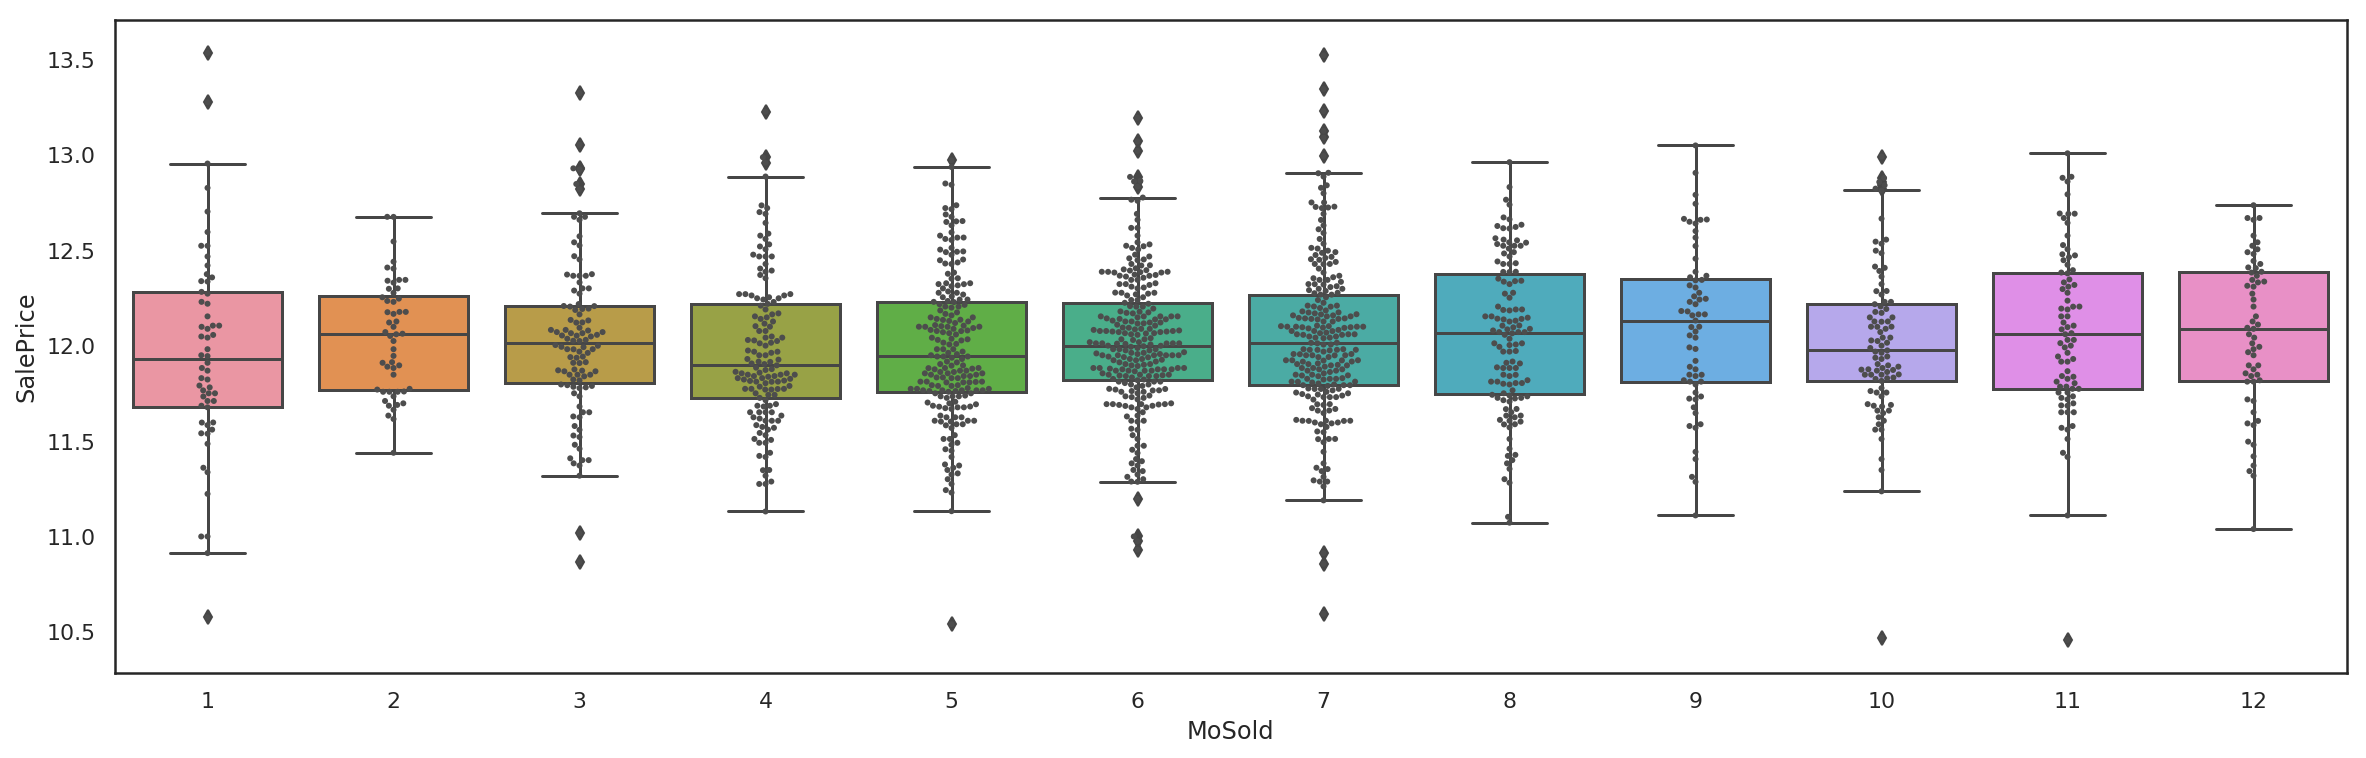

In [57]:
#MoSold vs Sale Price
def lr():    
    var = 'MoSold'
    data = pd.concat([house_final['SalePrice'], house_final[var]], axis=1)
    data = data.iloc[(-data.groupby(var)['SalePrice'].transform('median')).argsort()]
    f, ax = plt.subplots(figsize=(20, 6))
    fig = sns.boxplot(x=var, y="SalePrice", data=data)
    fig = sns.swarmplot(x=var, y="SalePrice", data=data, color='0.3', size = 3)
lr()

**Observation**<br>'MoSold' is an ordinal categorical varibale and has a relationshiop with SalePrice variable. Average house prices are not varying much across different months.

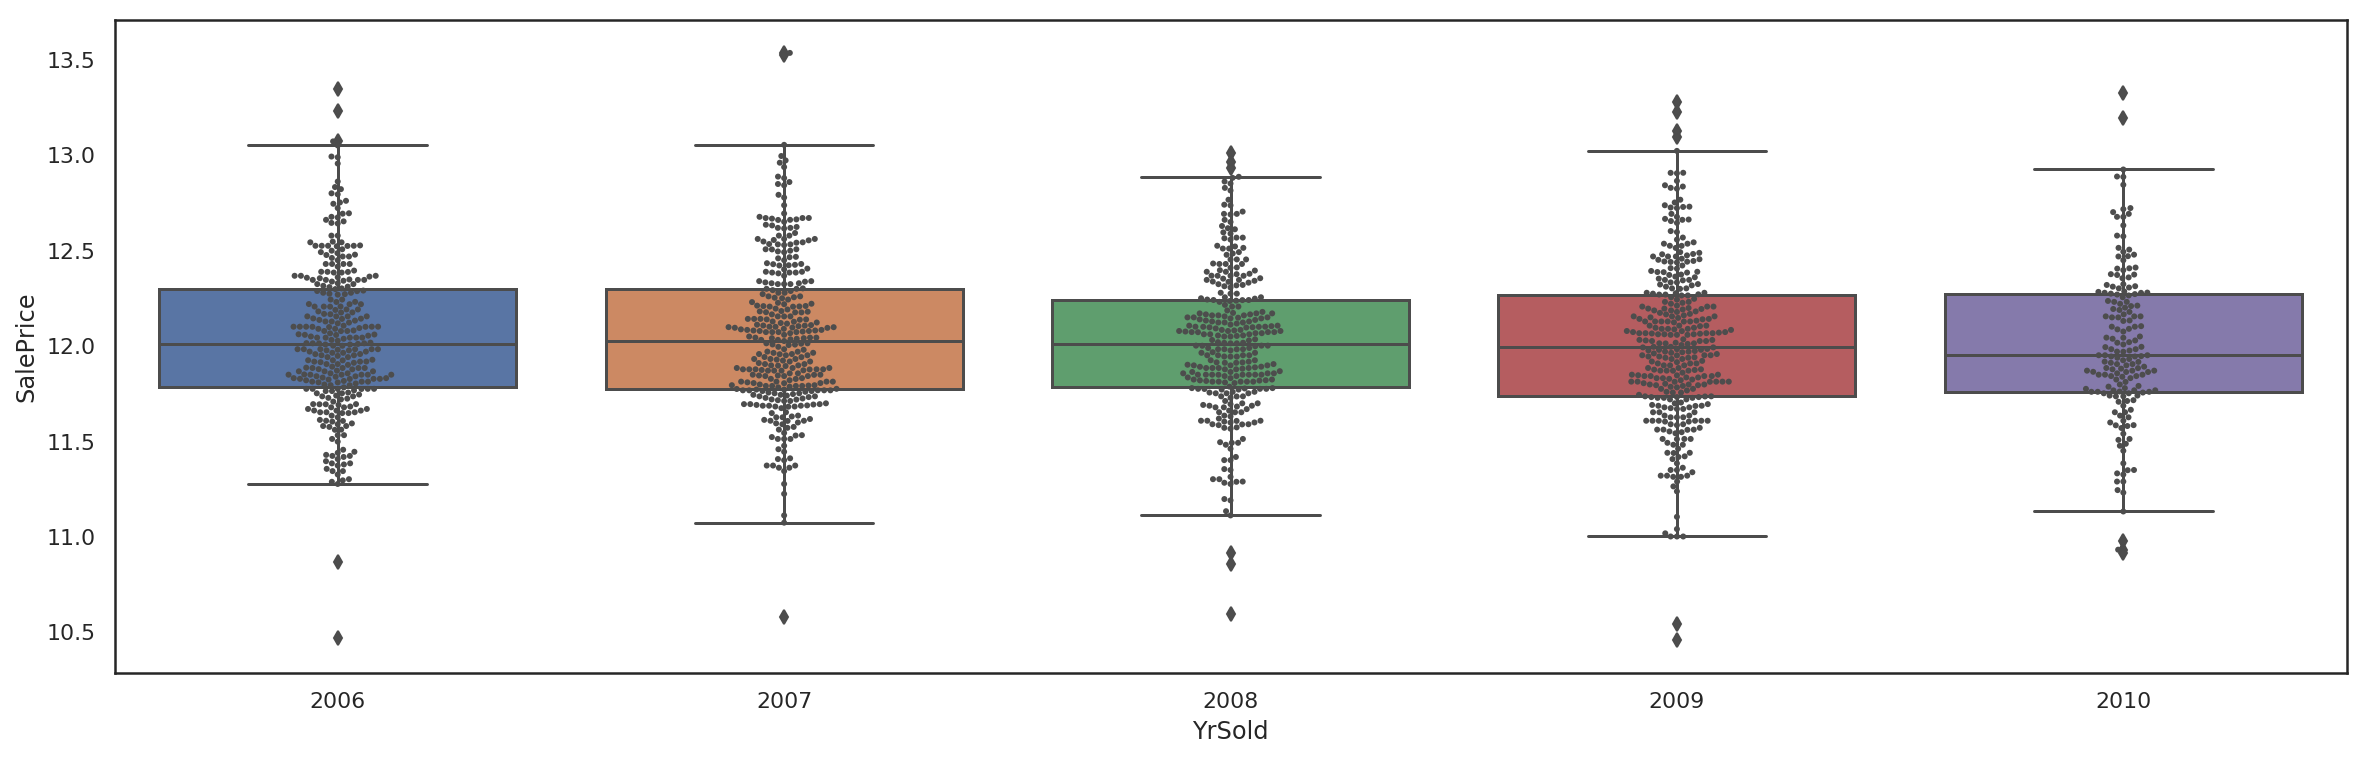

In [58]:
#YrSold vs Sale Price
def lr():    
    var = 'YrSold'
    data = pd.concat([house_final['SalePrice'], house_final[var]], axis=1)
    data = data.iloc[(-data.groupby(var)['SalePrice'].transform('median')).argsort()]
    f, ax = plt.subplots(figsize=(20, 6))
    fig = sns.boxplot(x=var, y="SalePrice", data=data)
    fig = sns.swarmplot(x=var, y="SalePrice", data=data, color='0.3', size = 3)
lr()

**Observation**<br>'YrSold' is an ordinal categorical varibale and has a relationshiop with SalePrice variable. Average house prices are not varying much across different years.

In [59]:
#Droping 'YrSold' varibale from the dataset
house_final = house_final.drop(['YrSold'], axis=1)

**Cleaning outliers**

In [60]:
house_final = house_final.drop(house_final[(house_final['GarageCars']>3)].index).reset_index(drop=True)

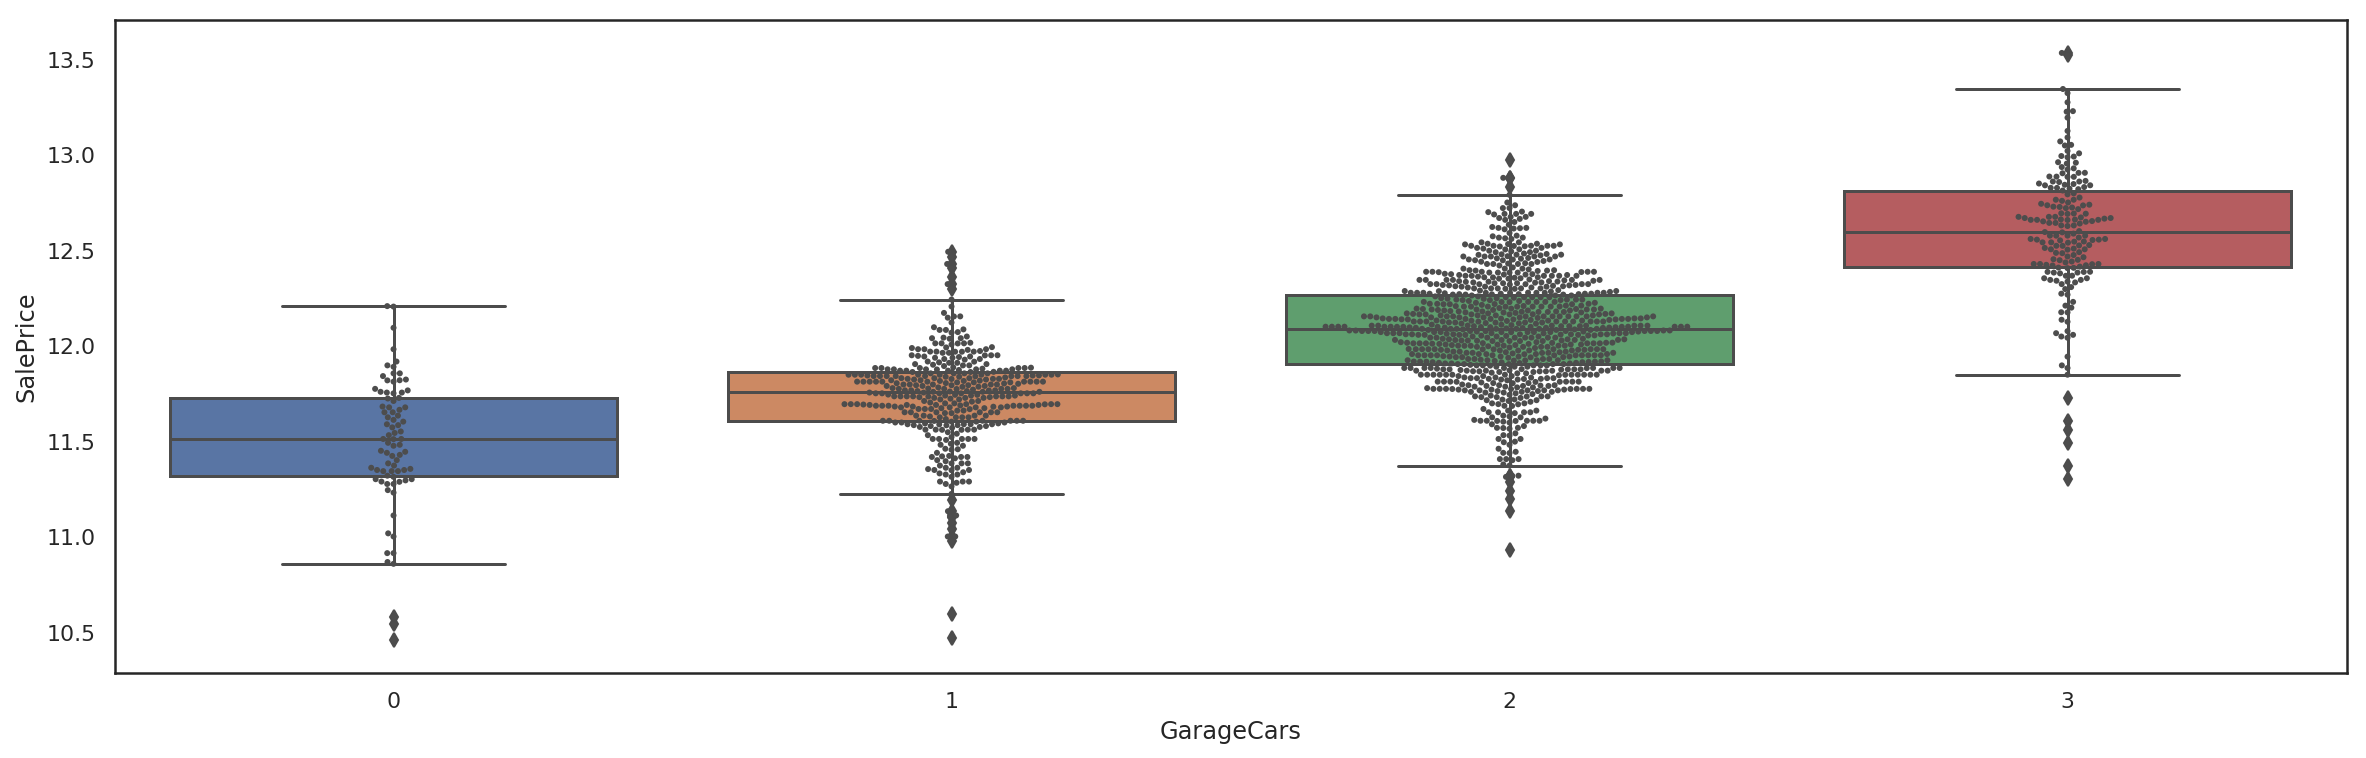

In [61]:
def lr():    
    var = 'GarageCars'
    data = pd.concat([house_final['SalePrice'], house_final[var]], axis=1)
    data = data.iloc[(-data.groupby(var)['SalePrice'].transform('median')).argsort()]
    f, ax = plt.subplots(figsize=(20, 6))
    fig = sns.boxplot(x=var, y="SalePrice", data=data)
    fig = sns.swarmplot(x=var, y="SalePrice", data=data, color='0.3', size = 3)
lr()

In [62]:
house_final = house_final.drop(house_final[(house_final['FullBath']<1)].index).reset_index(drop=True)

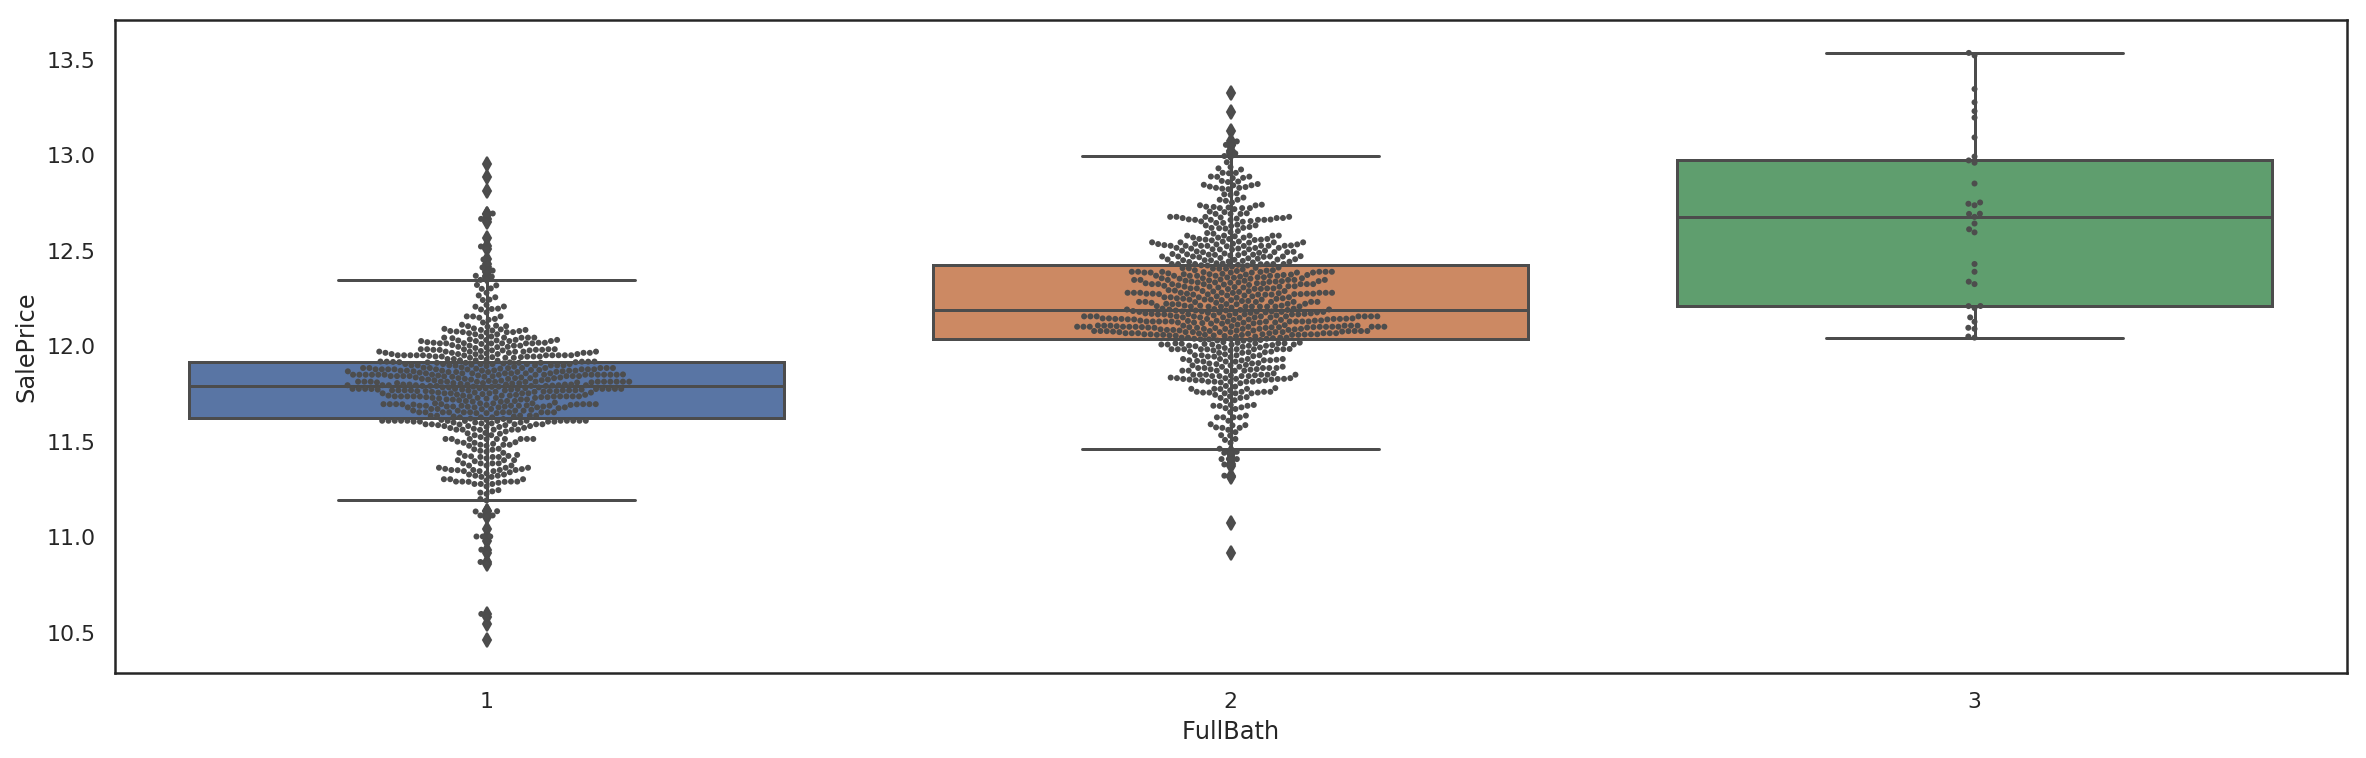

In [63]:
#FullBath vs Sale Price
def lr():    
    var = 'FullBath'
    data = pd.concat([house_final['SalePrice'], house_final[var]], axis=1)
    data = data.iloc[(-data.groupby(var)['SalePrice'].transform('median')).argsort()]
    f, ax = plt.subplots(figsize=(20, 6))
    fig = sns.boxplot(x=var, y="SalePrice", data=data)
    fig = sns.swarmplot(x=var, y="SalePrice", data=data, color='0.3', size = 3)
lr()

In [64]:
house_final.shape

(1446, 19)

In [65]:
house_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1446 entries, 0 to 1445
Data columns (total 19 columns):
MSZoning        1446 non-null object
Neighborhood    1446 non-null object
HouseStyle      1446 non-null object
OverallQual     1446 non-null int64
OverallCond     1446 non-null int64
Exterior1st     1446 non-null object
Exterior2nd     1446 non-null object
Foundation      1446 non-null object
BsmtQual        1446 non-null object
HeatingQC       1446 non-null object
FullBath        1446 non-null int64
BedroomAbvGr    1446 non-null int64
KitchenQual     1446 non-null object
GarageType      1446 non-null object
GarageFinish    1446 non-null object
GarageCars      1446 non-null int64
MoSold          1446 non-null int64
SalePrice       1446 non-null float64
TotalSF         1446 non-null int64
dtypes: float64(1), int64(7), object(11)
memory usage: 214.7+ KB


**Dividing dataset into two, on the basis of categorical and numerical**

In [66]:
house_cont = house_final[['TotalSF','SalePrice']]

In [67]:
house_cat = house_final.drop(house_final[['TotalSF','SalePrice']], axis=1)

**Verify relationship between House Sale Price and continuous explainatory variables**

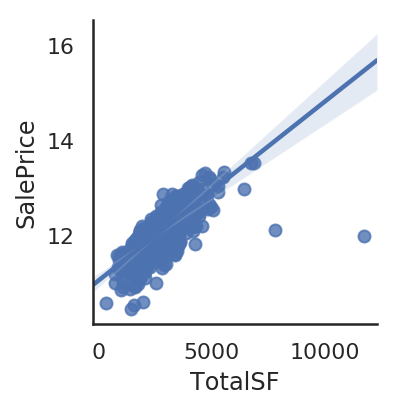

In [68]:
sns.pairplot(house_cont, x_vars='TotalSF',
             y_vars='SalePrice', size=3, aspect=1, kind='reg')

**Label encode the ordinal categorical variables to numerical values from house_cat to use for house_master1 model**

In [69]:
from sklearn.preprocessing import LabelEncoder
def linreg(house_cat):
    return house_cat.apply(LabelEncoder().fit_transform)
house_cat = linreg(house_cat)
house_cat.head()

MSZoning  Neighborhood  HouseStyle  OverallQual  OverallCond  Exterior1st  \
0         3             5           5            6            3           12   
1         3            24           2            5            6            8   
2         3             5           5            6            3           12   
3         3             6           5            6            3           13   
4         3            15           5            7            3           12   

   Exterior2nd  Foundation  BsmtQual  HeatingQC  FullBath  BedroomAbvGr  \
0           13           2         2          0         1             3   
1            8           1         2          0         1             3   
2           13           2         2          0         1             3   
3           15           0         3          2         0             3   
4           13           2         2          0         1             4   

   KitchenQual  GarageType  GarageFinish  GarageCars  MoSold  
0            2           1             1           2       1  
1            3           1             1           2       4  
2            2           1             1           2       8  
3            2           5             2           3       1  
4            2           1             1           3      11

**Combine Categorical label encoded variables and Numberical variables tables together as house_master1 dataset**

In [70]:
house_master1= pd.concat([house_cont, house_cat], axis = 1)
house_master1.head()

TotalSF  SalePrice  MSZoning  Neighborhood  HouseStyle  OverallQual  \
0     2566  12.247699         3             5           5            6   
1     2524  12.109016         3            24           2            5   
2     2706  12.317171         3             5           5            6   
3     2473  11.849405         3             6           5            6   
4     3343  12.429220         3            15           5            7   

   OverallCond  Exterior1st  Exterior2nd  Foundation  BsmtQual  HeatingQC  \
0            3           12           13           2         2          0   
1            6            8            8           1         2          0   
2            3           12           13           2         2          0   
3            3           13           15           0         3          2   
4            3           12           13           2         2          0   

   FullBath  BedroomAbvGr  KitchenQual  GarageType  GarageFinish  GarageCars  \
0         1             3            2           1             1           2   
1         1             3            3           1             1           2   
2         1             3            2           1             1           2   
3         0             3            2           5             2           3   
4         1             4            2           1             1           3   

   MoSold  
0       1  
1       4  
2       8  
3       1  
4      11

<a id='section4'></a>
### 4.0 Preparing X and y using pandas###
**Standardization**<br>
Standardize features by removing the mean and scaling to unit standard deviation.

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(house_master1)
data = scaler.transform(house_master1)

In [72]:
List_1 = list(house_master1.columns)

In [73]:
house_master1=pd.DataFrame(data)
house_master1.columns=List_1

**Extract the independent columns to prepare X**

In [74]:
X = house_master1.loc[:,house_master1.columns!='SalePrice']

**Extract dependent column into a dataframe y for model prediction**

In [75]:
y = house_master1.loc[:,house_master1.columns=='SalePrice']

In [76]:
X.head()

TotalSF  MSZoning  Neighborhood  HouseStyle  OverallQual  OverallCond  \
0 -0.001829 -0.047292     -1.206024    1.032671     0.650441    -0.527495   
1 -0.052982 -0.047292      1.957156   -0.539715    -0.079224     2.193401   
2  0.168684 -0.047292     -1.206024    1.032671     0.650441    -0.527495   
3 -0.115098 -0.047292     -1.039541    1.032671     0.650441    -0.527495   
4  0.944517 -0.047292      0.458807    1.032671     1.380105    -0.527495   

   Exterior1st  Exterior2nd  Foundation  BsmtQual  HeatingQC  FullBath  \
0     0.743143     0.751635    0.837258 -0.326527  -0.880739  0.788552   
1    -0.508557    -0.661345   -0.551131 -0.326527  -0.880739  0.788552   
2     0.743143     0.751635    0.837258 -0.326527  -0.880739  0.788552   
3     1.056068     1.316826   -1.939519  0.833565   0.270752 -1.068526   
4     0.743143     0.751635    0.837258 -0.326527  -0.880739  0.788552   

   BedroomAbvGr  KitchenQual  GarageType  GarageFinish  GarageCars    MoSold  
0      0.156025    -0.405962   -0.684763     -0.281753    0.327207 -1.603779  
1      0.156025     0.796951   -0.684763     -0.281753    0.327207 -0.491873  
2      0.156025    -0.405962   -0.684763     -0.281753    0.327207  0.990668  
3      0.156025    -0.405962    1.594102      0.952836    1.686809 -1.603779  
4      1.423506    -0.405962   -0.684763     -0.281753    1.686809  2.102573

<a id='section5'></a>
### 5.0 Splitting X and y into training and test datasets

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [78]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1084, 18) (362, 18) (1084, 1) (362, 1)


<a id='section6'></a>
### 6.0 Linear Regression

**Instantiate Linear regression model using scikit-learn**


In [79]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

**Fit the linear model on X_train and y_train.**

In [80]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

<a id='section7'></a>
### 7.0 Interpret the Model Coefficients 

In [81]:
print("house_master1")
print('Intercept:',linreg.intercept_)                                            
print('Coefficients:',linreg.coef_)

house_master1
Intercept: [-0.00201186]
Coefficients: [[ 0.31672035 -0.03799388  0.0141484   0.01202767  0.29295818  0.15813784
  -0.03758836  0.04257813  0.07759377 -0.05719634 -0.04119259  0.02651288
   0.04398594 -0.03905035 -0.06628297 -0.07974117  0.20915619  0.0081321 ]]


**Zip the features to pair the feature names with the coefficients.**

In [84]:
# house_master1
def lr():
    List_1.insert(0,'Intercept')
    coef = linreg.coef_.tolist()
    coef.insert(0, linreg.intercept_)
    eq1 = zip(List_1, coef)
    for c1,c2 in eq1:
        print(c1,c2)
lr()

Intercept [-0.00201186]
TotalSF [0.3167203478179469, -0.037993878618761835, 0.014148402788582872, 0.012027671714445479, 0.29295818288003095, 0.15813783703598136, -0.03758836049465047, 0.04257813373127222, 0.07759377418513856, -0.057196342137349435, -0.04119259198272267, 0.026512881727300496, 0.043985942643004226, -0.03905034696356656, -0.0662829704907168, -0.07974117067467147, 0.2091561868495115, 0.008132104650978352]


<a id='section8'></a>
### 8.0 Using the Model for Prediction

**Predict the train value using the built model.**


In [85]:
y_pred_train = linreg.predict(X_train)

In [86]:
y_pred_test = linreg.predict(X_test) 

<a id='section9'></a>
### 9.0 Model evaluation

**Model Evaluation using metrics.**

1. Mean Absolute Error

In [87]:
MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)

In [88]:
print('MAE for hosue_master1 train set with label encoded variables is {}'.format(MAE_train))
print('MAE for hosue_master1 test set with label encoded variables is {}'.format(MAE_test))

MAE for hosue_master1 train set with label encoded variables is 0.28284846872334196
MAE for hosue_master1 test set with label encoded variables is 0.27026831415378066


2. Mean Squared Error

In [89]:
MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
MSE_test = metrics.mean_squared_error(y_test, y_pred_test)

In [90]:
print('MSE for hosue_master1 train set with label encoded variables is {}'.format(MSE_train))
print('MSE for hosue_master1 test set with label encoded variables is {}'.format(MSE_test))

MSE for hosue_master1 train set with label encoded variables is 0.1796201000237519
MSE for hosue_master1 test set with label encoded variables is 0.12569121255983381


3. Root Mean Squared Error

In [91]:
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

In [92]:
print('RMSE for hosue_master1 train set with label encoded variables is {}'.format(RMSE_train))
print('RMSE for hosue_master1 test set with label encoded variables is {}'.format(RMSE_test))

RMSE for hosue_master1 train set with label encoded variables is 0.4238161158141015
RMSE for hosue_master1 test set with label encoded variables is 0.35452956514208206


4. Rsquared value

In [93]:
from sklearn.metrics import r2_score

R2_train = r2_score(y_train, y_pred_train) 
R2_test = r2_score(y_test, y_pred_test) 
print('R2 for training set is {}'.format(R2_train))
print('R2 for test set is {}'.format(R2_test))


R2 for training set is 0.8226137456789434
R2 for test set is 0.8693747012625423


5. Adjusted Rsquared value

In [94]:
adjusted_r_squared_train = 1 - (1-R2_train)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
adjusted_r_squared_test  = 1 - (1-R2_test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print('Adjusted R2 for training set is {}'.format(adjusted_r_squared_train))
print('Adjusted R2 for test set is {}'.format(adjusted_r_squared_test))

Adjusted R2 for training set is 0.8196156681411227
Adjusted R2 for test set is 0.8625197293171364


<a id='section10'></a>
### 10. Conclusion

Comparing model evaluation metrics:

|Sr|Metric|Train Value|Test Value|
|:--|:----|:------------------|:---------------------------------------------------------------------------------|
|1|MAE|0.17962010002375187|0.12569121255983384|
|2|MSE|0.17962010002375187|0.3545295651420821|
|3|RMSE|0.42381611581410145|0.3545295651420821|
|4|R2|0.8226137456789434|0.8693747012625423|
|5|Adjusted R2|0.8196156681411227|0.8625197293171364|

Following is the linear equation to predict house sale price:<br>

SalePrice (y)= **-0.00201186** + **0.316720347817947** x [TotalSF] **-0.037993878618761655** x [MSZoning] + **0.014148402788582853** x [Neighborhood] + **0.012027671714445345** x [HouseStyle] + **0.29295818288003106** x [OverallQual] + **0.1581378370359812** x [OverallCond] **-0.03758836049465052** x [Exterior1st] + **0.04257813373127223** x [Exterior2nd] + **0.07759377418513914** x [Foundation] **-0.05719634213734916** x [BsmtQual] **-0.04119259198272256** x [HeatingQC] + **0.02651288172730054** x [FullBath] + **0.04398594264300439** x [BedroomAbvGr] **-0.039050346963566615** x [KitchenQual] **-0.06628297049071677** x [GarageType] **-0.07974117067467143** x [GarageFinish] + **0.20915618684951137** x [GarageCars] + **0.008132104650978321** x [MoSold]